<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [ ]:
ser = pd.Series(data=[100, 200, 300, 400, 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])

In [ ]:
ser

<P>following line give same result pandas now how to reslove  those two array</p>


In [ ]:
ser = pd.Series([100, 200, 300, 400, 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [ ]:
ser

In [ ]:
ser.index

In [ ]:
ser['nancy']

In [ ]:
ser.loc['nancy']

In [ ]:
ser.iloc[[4, 3, 1]]#iloc stands for index location

In [ ]:
ser[[4, 3, 1]]

In [ ]:
'bob' in ser

In [ ]:
ser

In [ ]:
ser * 2

In [ ]:
ser ** 2

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [ ]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [ ]:
df = pd.DataFrame(d)
print(df)

In [ ]:
df = pd.DataFrame(d)
df

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

In [ ]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [ ]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [ ]:
pd.DataFrame(data)

In [ ]:
pd.DataFrame(data, index=['orange', 'red'])

In [ ]:
pd.DataFrame(data, columns=['joe', 'dora','alice',])

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [ ]:
df

In [ ]:
df['one']

In [ ]:
df["apple"]

In [ ]:
df['three'] = df['one'] * df['two']
df

In [ ]:
df['flag'] = df['one'] > 250
df

In [ ]:
three = df.pop('three')

In [ ]:
three

In [ ]:
df

In [ ]:
del df['two']

In [ ]:
df

In [ ]:
df.insert(2, 'copy_of_one', df['one'])
df

In [ ]:
 df['one_upper_half'] = df['one'][:4]
df

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

### Please note that **you will need to download the dataset**. 

Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-25m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called **movielens** in your **Week-4-pandas** folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [2]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

movie.csv.zip
movie1
rating.csv
rating.csv.zip
rating1
tag.csv.zip
tag1


In [3]:
#pip install modin


In [4]:

!cat ./movielens/movie1/movie.csv

"movieId","title","genres"
1,"Toy Story (1995)","Adventure|Animation|Children|Comedy|Fantasy"
2,"Jumanji (1995)","Adventure|Children|Fantasy"
3,"Grumpier Old Men (1995)","Comedy|Romance"
4,"Waiting to Exhale (1995)","Comedy|Drama|Romance"
5,"Father of the Bride Part II (1995)","Comedy"
6,"Heat (1995)","Action|Crime|Thriller"
7,"Sabrina (1995)","Comedy|Romance"
8,"Tom and Huck (1995)","Adventure|Children"
9,"Sudden Death (1995)","Action"
10,"GoldenEye (1995)","Action|Adventure|Thriller"
11,"American President, The (1995)","Comedy|Drama|Romance"
12,"Dracula: Dead and Loving It (1995)","Comedy|Horror"
13,"Balto (1995)","Adventure|Animation|Children"
14,"Nixon (1995)","Drama"
15,"Cutthroat Island (1995)","Action|Adventure|Romance"
16,"Casino (1995)","Crime|Drama"
17,"Sense and Sensibility (1995)","Drama|Romance"
18,"Four Rooms (1995)","Comedy"
19,"Ace Ventura: When Nature Calls (1995)","Comedy"
20,"Money Train (1995)","Action|Comedy|Crime|Drama|Thriller"
21,"Get Shorty (1995)","Comedy|Crim

<p>By wc-1 cammmand we can check how many movies(rows) in data</p>

In [5]:
!cat ./movielens/movie1/movie.csv | wc -l  


212,"Bushwhacked (1995)","Adventure|Comedy|Crime|Mystery"
213,"Burnt by the Sun (Utomlyonnye solntsem) (1994)","Drama"
214,"Before the Rain (Pred dozhdot) (1994)","Drama|War"
215,"Before Sunrise (1995)","Drama|Romance"
216,"Billy Madison (1995)","Comedy"
217,"Babysitter, The (1995)","Drama|Thriller"
218,"Boys on the Side (1995)","Comedy|Drama"
219,"Cure, The (1995)","Drama"
220,"Castle Freak (1995)","Horror"
222,"Circle of Friends (1995)","Drama|Romance"
223,"Clerks (1994)","Comedy"
224,"Don Juan DeMarco (1995)","Comedy|Drama|Romance"
225,"Disclosure (1994)","Drama|Thriller"
226,"Dream Man (1995)","Thriller"
227,"Drop Zone (1994)","Action|Thriller"
228,"Destiny Turns on the Radio (1995)","Comedy"
229,"Death and the Maiden (1994)","Drama|Thriller"
230,"Dolores Claiborne (1995)","Drama|Thriller"
231,"Dumb & Dumber (Dumb and Dumber) (1994)","Adventure|Comedy"
232,"Eat Drink Man Woman (Yin shi nan nu) (1994)","Comedy|Drama|Romance"
233,"Exotica (1994)","Drama"
234,"Exit to Eden (1994)","C

1902,"Dream for an Insomniac (1996)","Drama|Romance"
1903,"Hav Plenty (1997)","Comedy"
1904,"Henry Fool (1997)","Comedy|Drama"
1905,"Marie from the Bay of Angels (Marie Baie Des Anges) (1997)","Drama"
1906,"Mr. Jealousy (1997)","Comedy|Romance"
1907,"Mulan (1998)","Adventure|Animation|Children|Comedy|Drama|Musical|Romance"
1908,"Resurrection Man (1998)","Drama|Thriller"
1909,"X-Files: Fight the Future, The (1998)","Action|Crime|Mystery|Sci-Fi|Thriller"
1910,"I Went Down (1997)","Comedy|Crime|Drama"
1911,"Dr. Dolittle (1998)","Comedy"
1912,"Out of Sight (1998)","Comedy|Crime|Drama|Romance|Thriller"
1913,"Picnic at Hanging Rock (1975)","Drama|Mystery"
1914,"Smoke Signals (1998)","Comedy|Drama"
1915,"Voyage to the Beginning of the World (Viagem ao PrincÃ­pio do Mundo) (1997)","Drama"
1916,"Buffalo '66 (a.k.a. Buffalo 66) (1998)","Drama|Romance"
1917,"Armageddon (1998)","Action|Romance|Sci-Fi|Thriller"
1918,"Lethal Weapon 4 (1998)","Action|Comedy|Crime|Thriller"
1919,"Madeline (1998)","Chi

2082,"Mighty Ducks, The (1992)","Children|Comedy"
2083,"Muppet Christmas Carol, The (1992)","Children|Comedy|Musical"
2084,"Newsies (1992)","Children|Musical"
2085,"101 Dalmatians (One Hundred and One Dalmatians) (1961)","Adventure|Animation|Children"
2086,"One Magic Christmas (1985)","Drama|Fantasy"
2087,"Peter Pan (1953)","Animation|Children|Fantasy|Musical"
2088,"Popeye (1980)","Adventure|Comedy|Musical"
2089,"Rescuers Down Under, The (1990)","Adventure|Animation|Children"
2090,"Rescuers, The (1977)","Adventure|Animation|Children|Crime|Drama"
2091,"Return from Witch Mountain (1978)","Children|Sci-Fi"
2092,"Return of Jafar, The (1994)","Adventure|Animation|Children|Fantasy|Musical|Romance"
2093,"Return to Oz (1985)","Adventure|Children|Fantasy"
2094,"Rocketeer, The (1991)","Action|Adventure|Sci-Fi"
2095,"Shaggy D.A., The (1976)","Children|Comedy"
2096,"Sleeping Beauty (1959)","Animation|Children|Musical"
2097,"Something Wicked This Way Comes (1983)","Children|Drama|Fantasy|Mystery|Th

2582,"Twin Dragons (Shuang long hui) (1992)","Action|Comedy"
2583,"Cookie's Fortune (1999)","Comedy|Drama"
2584,"Foolish (1999)","Comedy"
2585,"Lovers of the Arctic Circle, The (Los Amantes del CÃ­rculo Polar) (1998)","Drama|Romance"
2586,"Goodbye Lover (1999)","Comedy|Crime|Thriller"
2587,"Life (1999)","Comedy|Crime|Drama"
2588,"Cloudland (1998)","Animation"
2589,"Friends & Lovers (1999)","Comedy|Drama|Romance"
2590,"Hideous Kinky (1998)","Drama"
2591,"Jeanne and the Perfect Guy (Jeanne et le garÃ§on formidable) (1998)","Comedy|Drama|Romance"
2592,"Joyriders, The (1999)","Drama"
2593,"Monster, The (Mostro, Il) (1994)","Comedy"
2594,"Open Your Eyes (Abre los ojos) (1997)","Drama|Romance|Sci-Fi|Thriller"
2595,"Photographer (Fotoamator) (1998)","Documentary"
2596,"SLC Punk! (1998)","Comedy|Drama"
2597,"Lost & Found (1999)","Comedy|Romance"
2598,"Pushing Tin (1999)","Comedy"
2599,"Election (1999)","Comedy"
2600,"eXistenZ (1999)","Action|Sci-Fi|Thriller"
2601,"Little Bit of Soul, A (1998)"

3452,"Romeo Must Die (2000)","Action|Crime|Romance|Thriller"
3453,"Here on Earth (2000)","Drama|Romance"
3454,"Whatever It Takes (2000)","Comedy|Romance"
3455,"Buddy Boy (1999)","Drama|Thriller"
3456,"Color of Paradise, The (Rang-e khoda) (1999)","Drama"
3457,"Waking the Dead (2000)","Drama|Thriller"
3458,"Blood and Sand (Sangre y Arena) (1989)","Drama|Romance"
3459,"Gothic (1986)","Drama|Horror"
3460,"Hillbillys in a Haunted House (1967)","Comedy"
3461,"Lord of the Flies (1963)","Adventure|Drama|Thriller"
3462,"Modern Times (1936)","Comedy|Drama|Romance"
3463,"Last Resort (National Lampoon's Last Resort) (1994)","Comedy"
3464,"Solar Crisis (1990)","Sci-Fi|Thriller"
3465,"That's Life! (1986)","Drama"
3466,"Heart and Souls (1993)","Comedy|Fantasy"
3467,"Hud (1963)","Drama|Western"
3468,"Hustler, The (1961)","Drama"
3469,"Inherit the Wind (1960)","Drama"
3470,"Dersu Uzala (1975)","Adventure|Drama"
3471,"Close Encounters of the Third Kind (1977)","Adventure|Drama|Sci-Fi"
3472,"Horror Hote

3884,"Crew, The (2000)","Comedy"
3885,"Love & Sex (2000)","Comedy|Drama|Romance"
3886,"Steal This Movie! (2000)","Drama"
3887,"Went to Coney Island on a Mission From God... Be Back by Five (1998)","Drama"
3888,"Skipped Parts (2000)","Drama|Romance"
3889,"Highlander: Endgame (Highlander IV) (2000)","Action|Adventure|Fantasy"
3890,"Back Stage (2000)","Documentary"
3891,"Turn It Up (2000)","Crime|Drama"
3892,"Anatomy (Anatomie) (2000)","Horror"
3893,"Nurse Betty (2000)","Comedy|Crime|Drama|Romance|Thriller"
3894,"Solas (1999)","Drama"
3895,"Watcher, The (2000)","Crime|Thriller"
3896,"Way of the Gun, The (2000)","Crime|Thriller"
3897,"Almost Famous (2000)","Drama"
3898,"Bait (2000)","Action|Comedy"
3899,"Circus (2000)","Crime|Drama|Thriller"
3900,"Crime and Punishment in Suburbia (2000)","Comedy|Drama"
3901,"Duets (2000)","Comedy|Drama"
3902,"Goya in Bordeaux (Goya en Burdeos) (1999)","Drama"
3903,"Urbania (2000)","Drama"
3904,"Uninvited Guest (1999)","Drama"
3905,"Specials, The (2000)","C

4967,"No Man's Land (2001)","Drama|War"
4968,"PiÃ±ero (2001)","Drama"
4969,"And Then There Were None (1945)","Crime|Mystery"
4970,"Blue Angel, The (Blaue Engel, Der) (1930)","Drama"
4971,"Moscow on the Hudson (1984)","Comedy|Drama"
4972,"Owl and the Pussycat, The (1970)","Comedy"
4973,"Amelie (Fabuleux destin d'AmÃ©lie Poulain, Le) (2001)","Comedy|Romance"
4974,"Not Another Teen Movie (2001)","Comedy"
4975,"Vanilla Sky (2001)","Mystery|Romance|Sci-Fi|Thriller"
4976,"Iris (2001)","Drama"
4977,"Kandahar (Safar e Ghandehar) (2001)","Drama"
4978,"Lantana (2001)","Drama|Mystery|Thriller"
4979,"Royal Tenenbaums, The (2001)","Comedy|Drama"
4980,"Bill & Ted's Bogus Journey (1991)","Adventure|Comedy|Fantasy|Sci-Fi"
4981,"Clockwise (1986)","Comedy"
4982,"Crawling Eye, The (a.k.a. Trollenberg Terror, The) (1958)","Horror|Sci-Fi"
4983,"Holcroft Covenant, The (1985)","Drama|Thriller"
4984,"Morgan! (1966)","Comedy|Drama|Fantasy"
4985,"Sheena (1984)","Action|Adventure|Fantasy"
4986,"Silent Rage (1982

5625,"Moonlight Mile (2002)","Drama|Romance"
5626,"Shanghai Ghetto (2002)","Documentary"
5627,"Skins (2002)","Crime|Drama"
5628,"Wasabi (2001)","Action|Comedy|Crime|Drama|Thriller"
5629,"Jonah: A VeggieTales Movie (2002)","Animation|Children|Musical"
5630,"Red Dragon (2002)","Crime|Mystery|Thriller"
5631,"Between Strangers (2002)","Drama"
5632,"Bloody Sunday (2002)","Drama"
5633,"Heaven (2002)","Drama"
5634,"Pipe Dream (2002)","Drama"
5635,"Man from Elysian Fields, The (2001)","Drama"
5636,"Welcome to Collinwood (2002)","Comedy|Crime"
5637,"Flirting (1991)","Drama"
5638,"Godzilla vs. Mothra (Mosura tai Gojira) (1964)","Action|Adventure|Fantasy|Sci-Fi"
5639,"Godzilla's Revenge (Gojira-Minira-Gabara: Oru KaijÃ» Daishingeki) (All Monsters Attack) (1969)","Children"
5640,"Godzilla, King of the Monsters! (KaijÃ»-Ã´ Gojira) (1956)","Horror|Sci-Fi"
5641,"Moderns, The (1988)","Drama"
5642,"Onion Field, The (1979)","Drama"
5643,"Powaqqatsi (1988)","Documentary"
5644,"Pride of the Yankees, The (

6422,"Shenandoah (1965)","Drama|War|Western"
6423,"Straight Talk (1992)","Comedy"
6424,"Oscar (1991)","Comedy|Crime|Mystery|Romance"
6425,"6th Man, The (Sixth Man, The) (1997)","Comedy"
6426,"Far Country, The (1954)","Western"
6427,"Railway Children, The (1970)","Children|Drama"
6428,"Two Mules for Sister Sara (1970)","Comedy|War|Western"
6429,"Winchester '73 (1950)","Western"
6430,"Ziggy Stardust and the Spiders from Mars (1973)","Documentary|Musical"
6431,"Battle Cry (1955)","Drama|War"
6432,"Courtship of Eddie's Father, The (1963)","Comedy"
6433,"Man with the Movie Camera, The (Chelovek s kino-apparatom) (1929)","Documentary"
6434,"Objective, Burma! (1945)","War"
6435,"Operation Pacific (1951)","Drama|War"
6436,"This Boy's Life (1993)","Drama"
6437,"13 Rue Madeleine (1947)","Thriller|War"
6438,"633 Squadron (1964)","Drama|War"
6439,"Attack! (1956)","Drama|War"
6440,"Barton Fink (1991)","Drama|Thriller"
6441,"Battle of Britain (1969)","War"
6442,"Belle Ã©poque (1992)","Comedy|Romance

6988,"Broken Blossoms or The Yellow Man and the Girl (1919)","Drama|Romance"
6989,"Gorky Park (1983)","Crime|Drama|Thriller"
6990,"Great Train Robbery, The (a.k.a. First Great Train Robbery, The) (1979)","Action|Adventure|Comedy|Crime|Drama"
6991,"Greystoke: The Legend of Tarzan, Lord of the Apes (1984)","Adventure|Drama|Romance"
6992,"Guarding Tess (1994)","Comedy|Drama"
6993,"Hannah and Her Sisters (1986)","Comedy|Drama|Romance"
6994,"Hard Way, The (1991)","Action|Comedy"
6995,"Hercules in New York (1970)","Action|Comedy|Fantasy"
6996,"Highlander II: The Quickening (1991)","Action|Sci-Fi"
6997,"Hoffa (1992)","Crime|Drama"
6998,"House of Cards (1993)","Drama"
6999,"Housesitter (1992)","Comedy|Romance"
7000,"Hudson Hawk (1991)","Action|Adventure|Comedy"
7001,"Invasion of the Body Snatchers (1978)","Horror|Mystery|Sci-Fi|Thriller"
7002,"Mindwalk (1990)","Drama"
7003,"Kafka (1991)","Comedy|Drama|Mystery|Sci-Fi|Thriller"
7004,"Kindergarten Cop (1990)","Action|Comedy|Crime|Thriller"
7005,"

8612,"Lassie Come Home (1943)","Adventure|Children|Drama"
8613,"Time of Your Life, The (1948)","Comedy|Drama"
8614,"Overboard (1987)","Comedy|Romance"
8615,"Mask of Fu Manchu, The (1932)","Adventure|Horror|Sci-Fi"
8616,"By the Light of the Silvery Moon (1953)","Children|Musical|Romance"
8617,"Butterfield 8 (1960)","Drama"
8618,"Johnny Guitar (1954)","Drama|Western"
8619,"Sister My Sister (1994)","Drama"
8620,"Exterminating Angel, The (Ã�ngel exterminador, El) (1962)","Comedy|Drama|Fantasy|Mystery"
8621,"Ivans xtc. (2000)","Drama"
8622,"Fahrenheit 9/11 (2004)","Documentary"
8623,"Roxanne (1987)","Comedy|Romance"
8624,"Freedom Downtime (2001)","Adventure|Crime|Documentary"
8625,"Same River Twice, The (2003)","Documentary"
8626,"Dr. Terror's House of Horrors (1965)","Horror|Sci-Fi"
8627,"Confessions of a Burning Man (2003)","Documentary"
8628,"Search and Destroy (1995)","Comedy|Drama"
8629,"Book of Life, The (1998)","Comedy|Fantasy"
8630,"Such a Long Journey (1998)","Drama|War"
8631,"Hard

25934,"3 Godfathers (1948)","Drama|Western"
25935,"B.F.'s Daughter (1948)","Drama|Romance"
25936,"Babe Ruth Story, The (1948) ","Drama"
25937,"Easter Parade (1948)","Musical|Romance"
25938,"Fort Apache (1948)","Western"
25940,"Lady from Shanghai, The (1947)","Drama|Film-Noir|Mystery"
25941,"Letter from an Unknown Woman (1948)","Drama|Romance"
25942,"Louisiana Story (1948)","Drama"
25943,"Naked City, The (1948)","Crime|Drama|Film-Noir|Mystery"
25944,"Pirate, The (1948)","Adventure|Comedy|Musical|Romance"
25945,"They Live by Night (1949)","Crime|Film-Noir|Romance"
25946,"Three Musketeers, The (1948)","Action|Adventure|Drama|Romance"
25947,"Unfaithfully Yours (1948)","Comedy"
25948,"Yellow Sky (1948)","Crime|Western"
25950,"Barkleys of Broadway, The (1949)","Comedy|Musical"
25951,"In the Good Old Summertime (1949)","Musical"
25952,"Letter to Three Wives, A (1949)","Comedy|Drama"
25954,"Orpheus (OrphÃ©e) (1950)","Drama|Fantasy|Romance"
25956,"Secret Garden, The (1949)","Children|Drama"
259

26699,"Close-Up (Nema-ye Nazdik) (1990)","Drama"
26700,"Nuns on the Run (1990)","Comedy|Crime"
26701,"Patlabor: The Movie (KidÃ´ keisatsu patorebÃ¢: The Movie) (1989)","Action|Animation|Crime|Drama|Film-Noir|Mystery|Sci-Fi|Thriller"
26702,"Reflecting Skin, The (1990)","Drama|Horror|Thriller"
26703,"Riff-Raff (1991)","Comedy|Drama"
26704,"State of Grace (1990)","Crime|Drama|Thriller"
26707,"Tatie Danielle (1990)","Comedy|Drama"
26708,"Time to Kill (Tempo di uccidere) (1989)","Drama|War"
26710,"Welcome Home, Roxy Carmichael (1990)","Comedy|Drama"
26712,"35 Up (1991)","Documentary"
26713,"Days of Being Wild (A Fei jingjyuhn) (1990)","Drama|Romance"
26714,"Across the Tracks (1991)","Drama"
26717,"Begotten (1990)","Drama|Horror"
26718,"Life On A String (Bian chang Bian Zou) (1991)","Adventure|Drama|Fantasy|Musical"
26719,"Cadence (1990)","Drama"
26720,"Closet Land (1991)","Drama|Thriller"
26723,"Delusion (1991)","Crime|Drama|Thriller"
26724,"Dollman (1991)","Action|Comedy|Crime"
26726,"Dutc

27360,"Quickie, The (2001)","Crime|Drama"
27362,"Sometimes Happiness, Sometimes Sorrow (Kabhi Khushi Kabhie Gham) (2001)","Drama|Musical|Romance"
27365,"River, The (Joki) (2001)","Drama"
27366,"Werckmeister Harmonies (Werckmeister harmÃ³niÃ¡k) (2000)","Drama"
27368,"Asterix & Obelix: Mission Cleopatra (AstÃ©rix & ObÃ©lix: Mission ClÃ©opÃ¢tre) (2002)","Adventure|Comedy|Fantasy"
27369,"Daria: Is It Fall Yet? (2000)","Animation|Comedy"
27370,"Late Night Shopping (2001)","Comedy"
27372,"Uprising (2001)","Drama"
27373,"61* (2001)","Drama"
27376,"Tunnel, The (Tunnel, Der) (2001)","Action|Drama|Thriller"
27378,"Long Time Dead (2002)","Horror|Thriller"
27382,"Idle Mist (Vana Espuma) (1998)","Crime|Horror|Mystery|Sci-Fi"
27391,"Laramie Project, The (2002)","Crime|Drama"
27392,"Run Ronnie Run (2002)","Comedy"
27395,"Gojoe: Spirit War Chronicle (Gojo reisenki: Gojoe) (2000)","Drama"
27396,"Gentleman's Game, A (2002)","Drama"
27397,"Joint Security Area (Gongdong gyeongbi guyeok JSA) (2000)","Crime

31201,"Pippi on the Run (PÃ¥ rymmen med Pippi LÃ¥ngstrump) (1970)","Children"
31203,"Puddle Cruiser (1996)","Comedy"
31205,"Stickup, The (2002)","Action|Crime|Mystery"
31221,"Elektra (2005)","Action|Adventure|Crime|Drama"
31223,"Racing Stripes (2005)","Children|Comedy"
31225,"Coach Carter (2005)","Drama"
31247,"Fighting Sullivans, The (Sullivans, The) (1944)","Drama"
31251,"Iceman (1984)","Drama|Sci-Fi"
31255,"Ice Station Zebra (1968)","Action|Thriller"
31258,"Common Places (a.k.a. Common Ground) (Lugares comunes) (2002)","Drama"
31260,"Boys Town (1938)","Drama"
31263,"Torremolinos 73 (2003)","Comedy|Drama"
31267,"Zhou Yu's Train (Zhou Yu de huo che) (2002)","Drama|Romance"
31270,"Shivers (They Came from Within) (1975)","Drama|Horror|Sci-Fi"
31284,"Star Is Born, A (1976)","Drama|Musical|Romance"
31290,"Beastmaster 2: Through the Portal of Time (1991)","Action|Adventure|Fantasy|Sci-Fi"
31297,"Gold Diggers of 1935 (1935)","Comedy|Musical"
31309,"Rocco and His Brothers (Rocco e i suoi fra

33974,"For Pete's Sake (1974)","Comedy"
33988,"Twenty Bucks (1993)","Comedy"
33994,"Silent Witness (Do Not Disturb) (1999)","Action|Comedy|Thriller"
33998,"Deceived (1991)","Thriller"
34002,"Room Service (1938)","Comedy"
34004,"Desert Saints (2002)","Action|Thriller"
34008,"Caterina in the Big City (Caterina va in cittÃ ) (2003)","Drama|Romance"
34016,"My Friends (Amici miei) (1975)","Comedy"
34018,"At the Circus (1939)","Comedy|Musical"
34026,"Outfit, The (1973)","Crime|Drama|Thriller"
34032,"Modigliani (2004)","Drama"
34039,"Broadway Melody of 1940 (1940)","Musical"
34045,"I Inside, The (2004)","Fantasy|Mystery|Sci-Fi"
34048,"War of the Worlds (2005)","Action|Adventure|Sci-Fi|Thriller"
34051,"My Brilliant Career (1979)","Drama|Romance"
34057,"Godzilla vs. Hedorah (Gojira tai HedorÃ¢) (Godzilla vs. The Smog Monster) (1971)","Horror|Sci-Fi"
34063,"Gambit (1966)","Comedy|Crime"
34065,"Billion Dollar Brain (1967)","Drama|Thriller"
34072,"March of the Penguins (Marche de l'empereur, La) (

38992,"Two for the Money (2005)","Drama"
38994,"Separate Lies (2005)","Drama|Romance|Thriller"
39048,"Fjorton suger (2004)","Drama|Romance"
39052,"Star Wreck: In the Pirkinning (2005)","Action|Comedy|Sci-Fi"
39075,"Evelyn Prentice (1934)","Drama|Mystery|Romance"
39183,"Brokeback Mountain (2005)","Drama|Romance"
39191,"Blue Vinyl (2002)","Documentary"
39231,"Elizabethtown (2005)","Comedy|Drama|Romance"
39234,"North Country (2005)","Drama"
39244,"Leila (1996)","Drama|Romance"
39292,"Good Night, and Good Luck. (2005)","Crime|Drama"
39305,"Li'l Abner (1959)","Comedy|Musical"
39307,"Dreamer: Inspired by a True Story (2005)","Children|Drama"
39364,"Profession of Arms, The (Il mestiere delle armi) (2001)","Adventure|Drama|War"
39369,"Detective Story (1951)","Crime|Drama|Film-Noir"
39381,"Proposition, The (2005)","Crime|Drama|Western"
39390,"Gospel, The (2005)","Drama"
39394,"Dandelion (2004)","Drama"
39398,"C.S.A.: The Confederate States of America (2004)","Comedy|Drama"
39400,"Fog, The (2005

41762,"Beyond the Forest (1949)","Drama|Film-Noir|Thriller"
41767,"Phffft (1954)","Comedy|Romance"
41769,"Mozart and the Whale (2005)","Comedy|Drama|Romance"
41792,"Organization, The (1971)","Crime|Drama|Thriller"
41810,"Cinderella Liberty (1973)","Drama|Romance"
41812,"Knute Rockne All American (1940)","Drama"
41815,"Scene at the Sea, A (Ano natsu, ichiban shizukana umi) (1991)","Comedy|Romance"
41820,"Birdcage Inn (Paran daemun) (1998)","Drama"
41822,"Real Fiction (Shilje sanghwang) (2000)","Crime|Drama"
41824,"Address Unknown (Suchwiin bulmyeong) (2001)","Drama|War"
41828,"Don't Look Now: We're Being Shot At (La grande vadrouille) (1966)","Comedy|War"
41831,"They Died with Their Boots On (1941)","Drama|Romance|War|Western"
41863,"Three Burials of Melquiades Estrada, The (2006)","Adventure|Crime|Drama"
41880,"House of Strangers (1949)","Drama|Film-Noir"
41889,"Lili (1953)","Drama|Musical|Romance"
41912,"Slim Susie (Smala Sussie) (2003)","Comedy|Crime|Mystery"
41914,"Executive Protect

47248,"Johnny Was (2006)","Action|Crime|Drama|Thriller"
47250,"Played (2006)","Crime|Thriller"
47254,"Chaos (2005)","Action|Crime|Drama|Thriller"
47261,"Night Listener, The (2006)","Fantasy|Mystery|Thriller"
47264,"Barnyard: The Original Party Animals (2006)","Animation|Children|Comedy"
47274,"Murmur of the Heart (Le souffle au coeur) (1971)","Drama"
47277,"They Won't Believe Me (1947)","Drama|Film-Noir"
47285,"Left Hand of God, The (1955)","Drama"
47287,"Compulsion (1959)","Crime|Drama|Thriller"
47306,"Canterbury Tale, A (1944)","Drama|Mystery|War"
47330,"Dirty Mary Crazy Larry (1974)","Action|Crime|Drama|Romance"
47342,"Angels Over Broadway (1940)","Adventure|Comedy|Crime|Drama"
47356,"Fortress (1985)","Action|Thriller"
47382,"Step Up (2006)","Drama|Romance"
47384,"Zoom (2006)","Adventure|Comedy|Drama|Fantasy"
47394,"Bon Cop, Bad Cop (2006)","Action|Comedy|Crime|Thriller"
47397,"Tom, Dick and Harry (1941)","Comedy|Fantasy|Romance"
47404,"Mind Game (2004)","Adventure|Animation|Comedy|

49955,"Wild Side (2004)","Drama"
49957,"History Boys, The (2006)","Comedy|Drama"
49961,"Notes on a Scandal (2006)","Drama"
49973,"Children Shouldn't Play with Dead Things (1973)","Horror"
49979,"Desert Heat (Inferno) (1999)","Action"
49985,"The Face Behind the Mask (1941)","Crime|Drama|Film-Noir|Romance"
49994,"Life of Jesus, The (La vie de JÃ©sus) (1997)","Drama"
50003,"DOA: Dead or Alive (2006)","Action|Adventure"
50005,"Curse of the Golden Flower (Man cheng jin dai huang jin jia) (2006)","Action|Drama"
50011,"Bothersome Man, The (Brysomme mannen, Den) (2006)","Comedy|Drama|Fantasy|Mystery"
50059,"Don't Drink the Water (1994)","Comedy"
50064,"Good German, The (2006)","Drama|Mystery|Thriller"
50066,"Sweet Land (2005)","Drama|Romance"
50068,"Letters from Iwo Jima (2006)","Drama|War"
50076,"Presenting Lily Mars (1943)","Comedy|Musical|Romance"
50147,"Black Christmas (2006)","Action|Horror|Thriller"
50149,"Happily N'Ever After (2007)","Animation|Children|Comedy"
50151,"Home of the Brave 

56515,"Devil Came on Horseback, The (2007)","Documentary"
56548,"All Passion Spent (1986)","Drama"
56551,"Treatment, The (2006)","Comedy|Drama|Romance"
56561,"10 Questions for the Dalai Lama (2006)","Documentary"
56563,"Helvetica (2007)","Documentary"
56570,"Mary (2005)","Drama|Thriller"
56574,"Journey from the Fall (2006)","Drama"
56580,"War on Democracy, The (2007)","Documentary"
56587,"Bucket List, The (2007)","Comedy|Drama"
56599,"Fall From Grace (2007)","Documentary"
56602,"Between Two Worlds (1944)","Action|Adventure|Drama|Fantasy|Mystery"
56607,"Kite Runner, The (2007)","Drama"
56612,"Sex and Fury (FuryÃ´ anego den: Inoshika OchÃ´) (1973)","Action|Crime|Thriller"
56614,"Regular Lovers (Amants rÃ©guliers, Les) (2005)","Drama"
56616,"Allegro (2005)","Drama|Fantasy|Mystery|Romance|Sci-Fi"
56620,"Deaths of Ian Stone, The (2007)","Horror|Thriller"
56624,"Commune (2005)","Documentary"
56626,"Robin Hood (1922)","Adventure|Romance"
56631,"Densha otoko (Train Man) (2005)","Comedy|Romance

58315,"Love Guru, The (2008)","Comedy"
58324,"Pirates Who Don't Do Anything: A VeggieTales Movie, The (2008)","Adventure|Animation|Children|Comedy"
58332,"Diary of the Dead (2007)","Horror|Sci-Fi"
58334,"Hallam Foe (Mister Foe) (2007)","Drama|Romance"
58347,"Penelope (2006)","Comedy|Fantasy|Romance"
58351,"City of Men (Cidade dos Homens) (2007)","Drama"
58365,"Chicago 10 (2007)","Animation|Documentary"
58367,"Romulus, My Father (2007)","Drama"
58373,"Woman in White, The (1948)","Mystery|Thriller"
58376,"Zeitgeist: The Movie (2007)","Documentary|War"
58379,"Terkel in Trouble (Terkel i knibe) (2004)","Animation|Comedy|Drama|Musical"
58381,"Jellyfish (Meduzot) (2007)","Drama"
58404,"Justice League: The New Frontier (2008)","Action|Adventure|Animation|Fantasy|Sci-Fi"
58409,"District, The (NyÃ³cker!) (2004)","Animation|Comedy"
58411,"Hottest State, The (2006)","Drama"
58418,"Then She Found Me (2007)","Comedy|Drama|Romance"
58422,"Island, The (a.k.a. Naked Island) (Hadaka no shima) (1960)","

!head -5 cammand give as top five rows

In [6]:
!head -10 ./movielens/movie1/movie.csv

58437,"Prince of Pennsylvania, The (1988)","Comedy|Drama"
58439,"Downhill Racer (1969)","Drama"
58452,"Saving Sarah Cain (2007)","Drama"
58485,"Return of the Living Dead 3 (1993)","Horror|Romance|Sci-Fi"
58490,"Miss Pettigrew Lives for a Day (2008)","Comedy|Romance"
58492,"Snow Angels (2007)","Drama"
58494,"Married Life (2007)","Crime|Drama|Romance"
58509,"Sun Valley Serenade (1941)","Comedy|Musical|Romance"
58520,"Mala Noche (1985)","Drama"
58530,"On the Outs (2004)","Drama"
58534,"Stupid Boy (GarÃ§on stupide) (2004)","Drama"
58554,"Class, The (Klass) (2007)","Drama"
58559,"Dark Knight, The (2008)","Action|Crime|Drama|IMAX"
58564,"Doctor Bull (1933)","Comedy|Drama"
58576,"Made in U.S.A. (1966)","Crime|Mystery"
58578,"Restless Natives (1985)","Adventure|Comedy|Drama"
58595,"Quiet City (2007)","Drama"
58598,"Phar Lap (1983)","Children|Drama"
58610,"51 Birch Street (2005)","Documentary"
58617,"Black Dawn (2005)","Action"
58622,"Hammer, The (2007)","Comedy"
58627,"Never Back Down (2008)",

61707,"LadrÃ³n que roba a ladrÃ³n (2007)","Action|Adventure|Comedy|Crime"
61724,"Shadows in Paradise (Varjoja paratiisissa) (1986)","Comedy|Romance"
61729,"Ghost Town (2008)","Comedy|Fantasy|Romance"
61742,"Maradona by Kusturica (2008)","Documentary"
61768,"Accused (Anklaget) (2005)","Drama"
61816,"Import/Export (2007)","Drama"
61818,"Crow, The: Wicked Prayer (2005)","Action|Adventure|Fantasy|Thriller"
61862,"In Bed (En la cama) (2005)","Drama"
61868,"Jam (2006)","Drama"
61913,"Africa addio (1966)","Documentary"
61931,"Private Parts (1972)","Horror|Thriller"
61934,"Freebie and the Bean (1974)","Action|Comedy"
61937,"Sawdust and Tinsel (Gycklarnas afton) (1953)","Drama"
61941,"Humboldt County (2008)","Comedy|Drama"
61948,"100 Feet (2008)","Horror|Thriller"
61950,"Boot Camp (2007)","Thriller"
61961,"On the Beach (2000)","Drama|Sci-Fi"
61967,"Autumn Afternoon, An (Sanma no aji) (1962)","Drama"
61970,"Moonbase (1998)","Sci-Fi"
61986,"Appaloosa (2008)","Western"
61991,"Miracle at St. Anna (

64511,"Dean Spanley (2008)","Comedy|Drama"
64517,"I Am the Law (1938)","Crime|Drama"
64519,"Boomerang (1947)","Crime|Drama|Film-Noir"
64522,"Patterns (1956)","Drama"
64524,"Nothing Like the Holidays (2008)","Comedy|Drama|Romance"
64548,"Climax, The (1944)","Horror|Musical"
64550,"Strange Door, The (1951)","Horror"
64552,"Pandora's Box (Pandora'nin kutusu) (2008)","Drama"
64575,"Doubt (2008)","Drama|Mystery"
64577,"Cyborg Girl (Boku no kanojo wa saibÃ´gu) (2008)","Action|Comedy|Romance|Sci-Fi"
64611,"Forgotten One, The (1990)","Thriller"
64614,"Gran Torino (2008)","Crime|Drama"
64620,"Frost/Nixon (2008)","Drama"
64622,"Reader, The (2008)","Drama|Romance"
64645,"Wrecking Crew, The (1969)","Action|Adventure|Comedy|Drama"
64650,"Marriage Made in Heaven, A (Rab Ne Bana Di Jodi) (2008)","Comedy|Drama|Musical|Romance"
64652,"Delgo (2008)","Adventure|Animation|Comedy|Fantasy|Romance"
64658,"Chamber of Death (Chambre des morts, La) (2007)","Crime|Mystery|Thriller"
64660,"Waiter (Ober) (2006)","

69233,"Blind Husbands (1919)","Drama|Romance"
69241,"Berlin Alexanderplatz (1980)","Drama"
69243,"Before the Rains (2007)","Drama|Romance|Thriller"
69251,"Special (2006)","Drama|Fantasy"
69253,"New in Town (2009)","Comedy|Romance"
69255,"The Merry Widow (2007)","Comedy|Drama"
69269,"Salaam Namaste (2005)","Comedy|Musical|Romance"
69275,"Dead Snow (DÃ¸d snÃ¸) (2009)","Action|Adventure|Comedy|Horror"
69278,"Land of the Lost (2009)","Action|Adventure|Comedy|Sci-Fi"
69280,"Clique, The (2008)","Comedy"
69284,"Fatso (2008)","Comedy"
69299,"Free Soul, A (1931)","Drama"
69302,"Momma's Man (2008)","Drama"
69304,"Imagine That (2009)","Comedy|Drama|Fantasy"
69306,"Taking of Pelham 1 2 3, The (2009)","Crime|Drama|Thriller"
69310,"Hana and Alice (Hana to Arisu) (2004)","Comedy|Drama"
69324,"Flame and Citron (Flammen & Citronen) (2008)","Action|Drama|War"
69332,"Fade to Black (2006)","Mystery|Thriller"
69336,"In Therapy (DivÃ£) (2009)","Comedy|Drama|Romance"
69339,"Chain Reaction (2006)","Horror"
69

70146,"Rage at Dawn (1955)","Western"
70148,"Paradise Canyon (1935)","Crime|Western"
70152,"Perfect Fake, A (2005)","Documentary"
70155,"Seven Years Bad Luck (1921)","Comedy"
70157,"Gang's All Here, The (1943)","Comedy|Musical|Romance"
70159,"Orphan (2009)","Drama|Horror|Mystery|Thriller"
70173,"Afterburn (1992)","Drama"
70175,"Winged Creatures (Fragments) (2008)","Crime|Drama"
70181,"Rainbow Valley (1935)","Action|Romance|Western"
70183,"Ugly Truth, The (2009)","Comedy|Drama|Romance"
70186,"Heimat - A Chronicle of Germany (Heimat - Eine deutsche Chronik) (1984)","Drama"
70188,"Wild River (1960)","Drama|Romance"
70197,"My First War (2008)","Documentary"
70201,"High Hopes (1988)","Comedy"
70204,"Tulsa (1949)","Action|Drama|Romance"
70206,"Collector, The (2009)","Crime|Horror|Thriller"
70208,"Perfect Getaway, A (2009)","Horror|Thriller"
70223,"Fanfan la Tulipe (Fan-Fan the Tulip) (1952)","Action|Adventure|Comedy|Romance|War"
70227,"Dark Ride (2006)","Horror|Thriller"
70229,"House (2008)"

72583,"Brightness (Yeelen) (1987)","Fantasy"
72585,"Carnival in Flanders (La kermesse hÃ©roÃ¯que) (1935)","Comedy|Romance"
72587,"Pure One (Pakeezah) (1972)","Drama|Musical|Romance"
72589,"Princess Yang Kwei Fei (YÃ´kihi) (1955)","Drama|Romance"
72591,"Patriot, The (1998)","Action|Thriller"
72593,"Ticker (2001)","Action|Crime|Thriller"
72601,"Teenage Mutant Ninja Turtles: Turtles Forever (2009)","Action|Adventure|Animation|Comedy|Thriller"
72603,"Merry Madagascar (2009)","Animation"
72605,"Brothers (2009)","Drama|Thriller|War"
72607,"Portraits of Women (Naisenkuvia) (1970)","Comedy|Drama"
72609,"Nine Ways to Approach Helsinki (YhdeksÃ¤n tapaa lÃ¤hestyÃ¤ HelsinkiÃ¤) (1982)","Documentary"
72612,"Fly, The (LÃ©gy, A) (1980)","Animation|Comedy"
72618,"Summer of the Monkeys (1998)","Children|Drama"
72621,"Man with No Shadow, The (Homme sans ombre, L') (2004)","Animation|Drama"
72624,"Garage (2007)","Drama"
72626,"Billy Blazes, Esq. (1919)","Comedy|Western"
72628,"Home Movie (2008)","Horror|T

75440,"Will Ferrell: You're Welcome America - A Final Night with George W Bush (2009)","Comedy"
75443,"Invisible Stripes (1939)","Crime|Drama"
75446,"Little Ashes (2008)","Drama"
75803,"Our Family Wedding (2010)","Comedy"
75805,"Bounty Hunter, The (2010)","Action|Comedy|Romance"
75808,"Dead Man Running (2009)","Action|Crime|Drama|Thriller"
75813,"Leaves of Grass (2009)","Comedy|Crime|Drama|Thriller"
75816,"Women in Trouble (2009)","Comedy"
75818,"Afghan Star (2009)","Documentary"
75820,"I Was A Communist for the FBI (1951)","Drama|Film-Noir|Thriller"
75823,"Combat Shock (1986)","Drama|Horror|War"
75825,"Card Player, The (Il cartaio) (2004)","Crime|Horror|Mystery|Thriller"
75831,"Hollywood Revue of 1929, The (1929)","Musical"
75927,"Haunted Echoes (2008)","Thriller"
75929,"Possession (2009)","Drama|Horror|Mystery|Romance|Thriller"
75938,"Deadly Prey (1987)","Action|Adventure|War"
75940,"Seventh Veil, The (1945)","Drama"
75947,"Mondo Cane (1962)","Documentary"
75950,"Egyptian, The (1954)

78366,"No Time for Comedy (1940)","Comedy|Drama|Romance"
78370,"How to Be (2008)","Comedy|Drama"
78376,"Wheel, The (La Roue) (1923)","Drama"
78379,"Dialogues with Solzhenitsyn (Uzel) (1999)","Documentary"
78381,"Blood Wedding (Bodas de sangre) (1981)","Drama|Musical|Romance"
78405,"It Happened Tomorrow (1944)","Comedy|Fantasy"
78408,"Salaam-E-Ishq (2007)","Comedy|Drama|Musical|Romance"
78410,"Chance Pe Dance (2010)","Comedy|Drama|Romance"
78413,"Bless the Beasts & Children (1971)","Drama"
78416,"Whoopee! (1930)","Comedy|Musical"
78418,"Dr. Ehrlich's Magic Bullet (1940)","Drama"
78420,"House on Telegraph Hill, The (1951)","Drama|Film-Noir|Mystery|Thriller"
78422,"How About You... (2007)","Comedy|Drama"
78438,"Edge of the City (1957)","Drama|Film-Noir"
78442,"No Greater Love (2009)","Drama|Romance"
78445,"Woman In Berlin, A (Anonyma - Eine Frau in Berlin) (2008)","Drama|War"
78459,"Talhotblond: (2009)","Documentary|Thriller"
78461,"Godspeed (2009)","Drama|Horror|Thriller"
78463,"Tortilla

79663,"Triage (2009)","Drama|War"
79667,"Call Me Madam (1953)","Comedy|Musical|Romance"
79677,"Two Escobars, The (2010)","Crime|Documentary"
79681,"Invisible Agent (1942)","Adventure|Comedy|Sci-Fi|Thriller|War"
79684,"Paper Man (2009)","Comedy|Drama"
79686,"All Tomorrow's Parties (2009)","Documentary|Musical"
79688,"Invisible Target (Naam yi boon sik) (2007)","Action|Crime"
79692,"BjarnfreÃ°arson (2009)","Comedy|Drama"
79695,"Expendables, The (2010)","Action|Adventure|Thriller"
79702,"Scott Pilgrim vs. the World (2010)","Action|Comedy|Fantasy|Musical|Romance"
79709,"Spanish Main, The (1945)","Adventure|Drama|Romance"
79711,"Svengali (1931)","Drama|Horror"
79718,"Sheep Eaters (LampaansyÃ¶jÃ¤t) (1972)","Comedy|Drama"
79720,"Animal Kingdom (2010)","Crime|Drama"
79723,"Exploding Girl, The (2009)","Drama"
79725,"Prodigal Sons (2008)","Documentary"
79731,"Seven Angry Men (1955)","Drama|Western"
79736,"May 6th (06/05) (2004)","Drama|Thriller"
79739,"Thorn in the Heart, The (2009)","Documentar

81979,"Monk and the Fish, The (Le moine et le poisson) (1994)","Animation|Musical"
81981,"Toy, The (Le jouet) (1976)","Comedy"
81983,"Bread and Alley (Nan va Koutcheh) (1970)","Drama"
81985,"My Ain Folk (1973)","Drama"
81987,"From the Clouds to the Resistance (Dalla nube alla resistenza) (1979)","Drama"
81989,"Devil, The (Diabel) (1972)","Drama|Horror"
81991,"Islander (2006)","Drama"
81993,"Red: Werewolf Hunter (2010)","Action|Fantasy|Horror"
82003,"Rendez-vous d'Anna, Les (Meetings of Anna, The) (1978)","Drama"
82005,"Extra Man, The (2010)","Comedy"
82007,"Ingeborg Holm (1913)","Drama"
82009,"Crazy on the Outside (2010)","Comedy|Crime"
82011,"Bad Family (Paha Perhe) (2010)","Comedy|Drama"
82013,"Adrift (Choi Voi) (2009)","Drama"
82015,"M (1951)","Crime|Drama|Film-Noir|Thriller"
82017,"Viking, The (1928)","Action|Adventure|Drama"
82022,"Reef, The (2010)","Drama|Horror|Thriller"
82026,"Mendy: A Question of Faith (2003)","Drama"
82030,"Lesson in Love, A (En lektion i kÃ¤rlek) (1954)","Co

83295,"Paternity (1981)","Comedy|Romance"
83300,"Christmas at Pee Wee's Playhouse (a.k.a. Pee-Wee's Playhouse Christmas Special) (1988)","Children|Comedy|Musical"
83302,"Last Night (2010)","Drama|Romance"
83308,"Asphalt (1929)","Drama"
83310,"Harlan: In the Shadow of Jew Suess (Harlan - Im Schatten von Jud SÃ¼ss) (2006)","Documentary"
83316,"Bingo Long Traveling All-Stars & Motor Kings, The (1976)","Comedy"
83318,"Goat, The (1921)","Comedy"
83320,"Skidoo (1968)","Comedy"
83322,"Boat, The (1921)","Comedy"
83324,"Cirque du Soleil: Dralion (2001)","Fantasy|Musical|Mystery"
83326,"Cirque du Soleil: Varekai (2003)","Comedy|Fantasy|Musical|Mystery"
83330,"Rasputin (1996)","Drama"
83332,"Who Is Harry Nilsson (And Why Is Everybody Talkin' About Him?) (2010)","Documentary"
83334,"Train  (2008)","Horror|Thriller"
83337,"Mujhse Dosti Karoge! (2002)","Drama|Romance"
83339,"Main Prem Ki Diwani Hoon (2003)","Comedy|Drama|Romance"
83343,"Mister 880 (1950)","Comedy"
83345,"Bread, Love and Dreams (Pane

84829,"Three Crowns of the Sailor (Les trois couronnes du matelot) (1983)","Drama|Fantasy"
84832,"Don Quixote (Don Quijote de Orson Welles) (1992)","Drama"
84834,"Three Kingdoms: Resurrection of the Dragon (Saam gwok dzi gin lung se gap) (2008)","Action|Drama|War"
84836,"Spiders, Part 2: The Diamond Ship, The (Die Spinnen, 2. Teil - Das Brillantenschiff) (1920)","Action|Adventure|Drama"
84838,"Harakiri (1919)","Drama"
84844,"Brother 2 (Brat 2) (2000)","Crime|Drama"
84847,"Emma (2009)","Comedy|Drama|Romance"
84852,"Judith of Bethulia (1914)","Adventure|Drama|Romance"
84855,"Desert Flower (2009)","Drama"
84857,"Adrift in Tokyo (Tenten) (2007)","Comedy|Drama"
84859,"Cold Light of Day, The (1996)","Drama|Thriller"
84861,"Jimmy Rosenberg: The Father, the Son & the Talent (2006)","Documentary"
84863,"Spider Lilies (Ci qing) (2007)","Drama|Romance"
84866,"On Earth as It Is in Heaven (AsÃ­ en el cielo como en la tierra) (1995)","Comedy"
84869,"In the Midst of Life (Au coeur de la vie) (1963)",

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [7]:
import pandas as pd

86002,"Necessities of Life, The (Ce qu'il faut pour vivre) (2008)","Drama"
86014,"Diary of a Wimpy Kid: Rodrick Rules (2011)","Comedy"
86023,"Female Vampire (Les avaleuses) (Erotic Kill) (1973)","Horror"
86028,"Henry's Crime (2010)","Comedy|Crime"
86033,"Flodder in Amerika! (1992)","Comedy"
86055,"Foster Brothers, The (SÃ¼t kardesler) (1976)","Comedy"


In [8]:
%%time
movies = pd.read_csv('./movielens/movie1/movie.csv', sep=',')
print(type(movies))
movies.head()

86057,"Outrageous Class (Hababam sinifi) (1975)","Comedy|Drama"
86059,"Hop (2011)","Animation|Children|Comedy"
86061,"Question of Silence, A (De stilte rond Christine M.) (1982)","Drama"
86064,"Delta (2008)","Drama"
86066,"Playing the Victim (Izobrazhaya zhertvu) (2006)","Comedy"
86068,"Films to Keep You Awake: The Christmas Tale (PelÃ­culas para no dormir: Cuento de navidad) (2005)","Horror|Thriller"
86070,"And Along Come Tourists (Am Ende kommen Touristen) (2007)","Drama"
86077,"Film ist. (2000)","Documentary"
86079,"Conflagration (EnjÃ´) (1958)","Drama"
86081,"Ana and the Others (Ana y los otros) (2003)","Drama"
86083,"Crazy Class Wakes Up, The (Hababam sinifi uyaniyor) (1977)","Comedy"
86085,"Berta's Motives (Los motivos de Berta: FantasÃ­a de Pubertad) (1985)","Drama"
86087,"Dunce Class on Vacation, The (Hababam sinifi tatilde) (1978)","Comedy"
86089,"Girl with the Red Scarf, The (Selvi boylum, al yazmalim) (1978)","Drama|Romance"
86091,"Nutcracker, The (1993)","Children|Fantasy|M

87360,"It Felt Like a Kiss (2009)","Documentary"
87364,"Interkosmos (2006)","Drama"
87366,"After the Reconciliation (AprÃ¨s la rÃ©conciliation) (2000)","Drama"
87368,"MatinÃ©e (1977)","Adventure|Comedy|Crime|Thriller"
87370,"Year of Living Vicariously, The (2005)","Documentary"
87378,"Sixth of the World, A (Shestaya chast mira) (1926)","Documentary"
87383,"Curly Top (1935)","Children|Musical|Romance"
87385,"Envy (Kiskanmak) (2009)","Drama"
87387,"Private (2004)","Drama|War"
87390,"Very British Gangster, A (2007)","Crime|Documentary"
87392,"Working Class Goes to Heaven, The (a.k.a. Lulu the Tool) (La classe operaia va in paradiso) (1971)","Drama"
87403,"48 Shades (2006)","Comedy|Drama"
87405,"Daydream Nation (2010)","Drama|Romance"
87408,"TÃ¤Ã¤ltÃ¤ tullaan, elÃ¤mÃ¤! (1980)","Drama|Romance"
87410,"Chosen One, The (2010)","Comedy|Drama"
87413,"Bernie (1996)","Comedy|Drama"
87415,"Lucky Star (1929)","Drama|Romance"
87417,"Araya (1959)","Documentary"
87420,"Danube Exodus, The (1998)","Docum

88059,"Bikini Summer (1991)","Comedy"
88061,"Transistor Love Story (Monrak Transistor) (2001)","Comedy|Drama|Musical|Romance"
88063,"Bugmaster (Mushishi) (2006)","Fantasy"
88065,"Double Dhamaal (2011)","Comedy|Crime|Drama"
88067,"Happiness Is a Warm Blanket, Charlie Brown (2011)","Animation|Comedy"
88069,"Delhi Belly (2011)","Comedy|Crime"
88071,"Ballerina (La mort du cygne) (1937)","Children|Drama|Romance"
88073,"Heir to an Execution (2004)","Documentary"
88075,"And Then Came Lola (2009)","Comedy|Drama|Romance"
88078,"Snowblind (2010)","Western"
88087,"Welcome Farewell-Gutmann (Bienvenido a Farewell-Gutmann) (2008)","Comedy|Drama"
88089,"Clint Eastwood: Out of the Shadows (2000)","Documentary"
88092,"Education for Death (1943)","Animation|Comedy"
88094,"Upside Down: The Creation Records Story (2010)","Documentary"
88099,"Streets of Laredo (1995)","Drama|Western"
88106,"Mahler (1974)","Drama"
88108,"Monte Carlo (2011)","Adventure|Comedy|Romance"
88110,"Monogamy (2010)","Drama|Romance"


88672,"Our Idiot Brother (2011)","Comedy"
88674,"Edison Kinetoscopic Record of a Sneeze (1894)","Documentary"
88676,"Divine Horsemen: The Living Gods of Haiti (1985)","Documentary"
88678,"Almanya - Welcome to Germany (Almanya - Willkommen in Deutschland) (2011)","Comedy|Drama"
88680,"Sweet Mud (Adama Meshuga'at) (2006)","Drama"
88682,"Letter to Elia, A (2010)","Documentary"
88688,"Drive-In Horrorshow (2009)","Horror"
88690,"Twixt (2011)","Horror|Thriller"
88692,"Princess Ka'iulani (2009)","Drama|Romance"
88694,"Anima Mundi (1992)","Documentary"
88697,"SUBWAYStories: Tales from the Underground (1997)","Drama"
88699,"Death Race 2 (2010)","Action|Sci-Fi|Thriller"
88701,"Debt, The (2007)","Thriller"
88704,"Air Guitar Nation (2006)","Comedy|Documentary|Musical"
88706,"Cyberbully (2011)","Drama"
88724,"Beats Rhymes & Life: The Travels of a Tribe Called Quest (2011)","Documentary"
88726,"Petits ruisseaux, Les (2010)","Drama"
88734,"West Is West (2010)","Comedy|Drama"
88740,"Above Suspicion (1

92852,"Ricky Rapper and the Bicycle Thief (Risto RÃ¤ppÃ¤Ã¤jÃ¤ ja polkupyÃ¶rÃ¤varas) (2009)","Children|Comedy|Musical"
92867,"Truth About Love, The (2005)","Comedy|Romance"
92872,"Plans for Tomorrow (Planes para maÃ±ana) (2010)","Drama"
92874,"Born to Be Bad (1934)","Drama|Romance"
92881,"Such Is Life (AsÃ­ es la vida...) (2000)","Drama|Romance"
92883,"Mysterious X, The (Sealed Orders) (Det hemmelighedsfulde X) (1914)","Drama|War"
92885,"SeptiÃ¨me jurÃ©, Le (2008)","Crime|Drama"
92887,"Year and a Half in the Life of Metallica, A (1992)","Documentary|Musical"
92894,"Balkan Spy (Balkanski spijun) (1984)","Comedy|Drama"
92904,"We Were Here (2011)","Documentary"
92906,"Girls on the Road (a.k.a. Hot Summer Week) (1973)","Comedy|Drama|Thriller"
92910,"Happy End (1967)","Comedy"
92918,"New York in the 50's (2000)","Documentary"
92920,"Hunter, The (2011)","Drama"
92923,"Dead, The (2010)","Horror"
92925,"Love Trap, The (1929)","Comedy|Romance"
92935,"Kaleidoscope (1966)","Comedy|Crime"
92938,"Gh

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


95720,"Watch, The (2012)","Comedy|Sci-Fi"
95732,"Vampires (2010)","Comedy|Fantasy|Horror"
95735,"Drive, He Said (1971)","Comedy|Drama"
95738,"Adventures of Mary-Kate and Ashley, The: The Case of the Christmas Caper (1995)","Children|Musical|Mystery"
95740,"Adventures of Mary-Kate and Ashley, The: The Case of the United States Navy Adventure (1997)","Children|Musical|Mystery"
95742,"Someday This Pain Will Be Useful to You (2011)","Drama"
95744,"2 Days in New York (2012)","Comedy"
95746,"Radio On (1980)","Drama"
95748,"2010: Moby Dick (2010)","Action|Adventure|Thriller"
95750,"Promise of the Flesh (Yukcheui yaksok) (1975)","(no genres listed)"
95752,"Terminal USA (1993)","Comedy"
95754,"From Beginning to End (Do ComeÃ§o ao Fim) (2009)","Drama|Romance"
95756,"Cat in the Hat, The (1971)","Animation|Children"
95758,"Ultramarathon Man: 50 Marathons, 50 States, 50 Days (2008)","Documentary"
95761,"Killer Joe (2011)","Crime|Thriller"
95765,"Yertle the Turtle and Other Stories (1992)","Animatio

96411,"6 Days to Air: The Making of South Park (2011)","Documentary"
96413,"Funeral Parade of Roses (Bara no sÃ´retsu) (1969)","Drama"
96415,"Doomsday Book (2012)","Comedy|Drama|Horror|Sci-Fi"
96417,"Premium Rush (2012)","Action|Thriller"
96419,"Letter Never Sent (Neotpravlennoye pismo) (1960)","Drama|Romance"
96421,"Lonesome (1928)","Comedy|Drama|Romance"
96423,"Evil Toons (1992)","Comedy|Horror"
96428,"From the Life of the Marionettes (Aus dem Leben der Marionetten) (1980)","Drama"
96430,"Odd Life of Timothy Green, The (2012)","Comedy|Drama|Fantasy"
96432,"Lawless (2012)","Crime|Drama"
96435,"Chameleon (KamÃ©leon) (2008)","Comedy|Drama|Thriller"
96448,"Piranha 3DD (a.k.a. Piranha DD) (2012)","Comedy|Horror"
96451,"Man Is Not a Bird (Covek nije tica) (1965)","Drama|Romance"
96456,"ATM (2012)","Horror|Thriller"
96460,"Wave, The (1981)","Drama"
96467,"Sleepwalk with Me (2012)","Comedy|Drama"
96469,"Dara Ã“ Briain Talks Funny: Live in London (2008)","Comedy"
96471,"Prime Suspect 3 (1993)

In [9]:
movies.head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller



96616,"That's My Boy (2012)","Comedy"
96621,"Arthur and the Revenge of Maltazard (Arthur et la vengeance de Maltazard) (2009)","Animation|Children|Fantasy"
96629,"Deathstalker (1983)","Action|Adventure|Fantasy"
96631,"Deathstalker II (1987)","Action|Adventure|Comedy|Fantasy"
96634,"Emergo (Apartment 143) (2011)","Horror"
96638,"Klitschko (2011)","Documentary"
96640,"Kinyarwanda (2011)","Drama|Romance"
96642,"Nobody's Children (I figli di nessuno) (1952)","Drama|Romance"
96644,"Patriotism (YÃ»koku) (1966)","Drama"
96651,"Les hautes solitudes (1974)","(no genres listed)"
96653,"Vampir (Cuadecuc, vampir) (1971)","Documentary|Horror"
96655,"Robot & Frank (2012)","Comedy|Drama|Sci-Fi"
96662,"Punk Syndrome, The (Kovasikajuttu) (2012)","Documentary"
96664,"Where Do We Go Now? (2011)","Comedy|Drama"
96667,"Ai Weiwei: Never Sorry (2012)","Documentary"
96669,"Stag Night (2008)","Horror|Thriller"
96671,"Hollywood Sex Wars (2011)","Comedy"
96679,"Love Hina Again (2002)","Animation|Comedy|Drama"
9

In [10]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tag1/tag.csv', sep=',')
tags.head()

97801,"Mann tut was Mann kann (2012)","Comedy"
97806,"Stockholm East (Stockholm Ã–stra) (2011)","Drama"
97808,"Woman That Dreamed About a Man, The (Kvinden der drÃ¸mte om en mand) (2010)","Drama"
97815,"Beware the Moon: Remembering 'An American Werewolf in London' (2009)","Documentary"
97817,"Pumping Iron II: The Women (1985)","Documentary"
97819,"Witness to Murder (1954)","Crime|Drama|Film-Noir|Thriller"
97821,"Busher, The (1919)","Comedy|Drama"
97823,"Piano in a Factory, The (Gang de qin) (2010)","Comedy|Drama|Musical"
97826,"Patience Stone, The (2012)","Drama|War"
97828,"Hamoun (1990)","Drama"
97832,"Chasing Mavericks (2012)","Drama"
97834,"Craigslist Joe (2012)","Adventure|Documentary"
97836,"Here Comes the Boom (2012)","Action|Comedy"
97845,"Men Who Made the Movies: Samuel Fuller, The (2002)","Documentary"
97847,"Search for the Beast (1997)","Horror"
97849,"Victor SjÃ¶strÃ¶m: Ett portrÃ¤tt (1981)","Documentary"
97853,"Night of the Running Man (1995)","Action|Crime|Thriller"
97855,

99089,"Poor Little Rich Girl (1936)","Adventure|Musical|Romance"
99101,"Negative Happy Chainsaw Edge (Negatibu happÃ® chÃªnsÃ´ ejji) (2007)","Comedy|Horror"
99103,"Stevie Nicks: Live at Red Rocks (1987)","Documentary|Musical"
99106,"Guilt Trip, The (2012)","Comedy"
99108,"Girl on a Motorcycle, The (1968)","Drama|Romance"
99110,"Save the Date (2012)","Comedy|Romance"
99112,"Jack Reacher (2012)","Action|Crime|Thriller"
99114,"Django Unchained (2012)","Action|Drama|Western"
99117,"This Is 40 (2012)","Drama"
99119,"Mahakaal (The Monster) (1993)","Horror"
99122,"I Bought a Vampire Motorcycle (1990)","Comedy|Horror"
99124,"Willard (1971)","Horror"
99126,"Public Woman, The (Femme publique, La) (1984)","Drama"
99128,"Female Demon Ohyaku (YÃ´en dokufuden hannya no ohyaku) (1968)","Action"
99130,"Ice Cream Man (1995)","Comedy|Horror"
99143,"Cirque du Soleil: Worlds Away (2012)","Fantasy|IMAX"
99145,"Impossible, The (Imposible, Lo) (2012)","Drama|Thriller"
99147,"Carol for Another Christmas (1964

100081,"Bad Luck (Zezowate szczescie) (1960)","Comedy"
100083,"Movie 43 (2013)","Comedy"
100085,"Iceman Tapes: Conversations with a Killer, The (1992)","Crime|Documentary"
100087,"Night of the Demons 2 (1994)","Horror"
100089,"Star Wars Uncut: Director's Cut (2012)","Action|Animation|Comedy|Sci-Fi|Western"
100091,"Hitler's Madman (1943)","Drama|War"
100093,"Death Race 3: Inferno (2012)","Action|Sci-Fi|Thriller"
100096,"Black White + Gray: A Portrait of Sam Wagstaff and Robert Mapplethorpe (2007)","Documentary"
100099,"Pictures of the Old World (Obrazy starÃ©ho sveta) (1972)","Documentary"
100101,"Jean Gentil (2010)","Drama"
100103,"Day and Night (Le jour et la nuit) (1997)","Drama"
100106,"Pervert's Guide to Ideology, The (2012)","Documentary"
100108,"Parker (2013)","Crime|Thriller"
100131,"We the Party (2012)","Comedy"
100138,"Simple Life, A (Tao jie) (2011)","Drama"
100141,"Treacle Jr. (2010)","Drama"
100143,"End of Love, The (2012)","Drama"
100145,"Palms (Ladoni) (1994)","Documentar

100562,"Goddess of 1967, The (2000)","Comedy|Drama|Romance"
100564,"Ã…sa-Nisse - WÃ¤lkom to Knohult (2011)","Comedy"
100567,"PressPausePlay (2011)","Documentary"
100570,"U.S. Seals (2000)","Action|Thriller"
100574,"Raid on Rommel (1971)","War"
100577,"Angel Levine, The (1970)","Comedy|Drama"
100579,"Universal Soldier: Day of Reckoning (2012)","Action|Sci-Fi|Thriller"
100581,"Room 237 (2012)","Documentary"
100583,"Arnulf Rainer (1960)","Documentary"
100585,"Above the Street, Below the Water (Over gaden under vandet) (2009)","Drama"
100588,"Amazing Johnathan: Wrong on Every Level (2006)","Comedy"
100591,"Mind Reader, The (1933)","Drama|Romance"
100593,"Benji (2012)","Documentary"
100595,"To.get.her (2011)","Drama|Mystery|Thriller"
100611,"Escape from Planet Earth (2013)","Adventure|Animation|Comedy|Sci-Fi"
100613,"Saving Lincoln (2013)","Drama"
100617,"Patton Oswalt: No Reason to Complain (2004)","Comedy"
100620,"Bruna Surfistinha (2011)","Drama"
100629,"Death of a Salesman (1966)","Dram

101627,"Confidential Agent (1945)","Drama|Thriller"
101629,"King - Jari Litmanen, The (Kuningas Litmanen) (2012)","Documentary"
101632,"18 Fingers of Death! (2006)","Action|Comedy"
101634,"Get2Gether, A (2005)","Comedy"
101636,"Man Called Gannon, A (1968)","Western"
101640,"Don (2006)","Action|Crime|Musical"
101642,"Bunch Of Amateurs, A (2008)","Comedy"
101646,"Night Across the Street (La noche de enfrente) (2012)","Drama"
101648,"Flat, The (2011)","Documentary"
101650,"Patience (After Sebald) (2012)","Documentary"
101653,"Magadheera (2009)","Action|Adventure|Fantasy|Romance"
101662,"Three Way (2004)","Crime|Drama|Thriller"
101664,"Hey Ram (2000)","Drama"
101666,"Night in Heaven, A (1983)","Drama|Romance"
101670,"'Twas the Night Before Christmas (1974)","Animation|Children|Fantasy"
101672,"Dr. Dolittle 3 (2006)","Children|Comedy|Fantasy"
101674,"Horror of the Zombies (1974)","Horror"
101678,"Marvin Gaye: What's Going On (2005)","Documentary"
101680,"Copper Mountain (1983)","Comedy|Musi

102208,"Aces 'N' Eights (2008)","Action|Adventure|Drama|Romance|Western"
102213,"Tenth Man, The (1988)","Drama|War"
102217,"Bill Hicks: Revelations (1993)","Comedy"
102219,"Perils of the Sentimental Swordsman (1982)","Action|Adventure|Fantasy"
102221,"War of the Shaolin Temple (Shao Lin shi san gun seng) (1980)","Action|Adventure|War"
102224,"Majesteit (2010)","Drama"
102231,"Dragon (Wu Xia) (2011)","Action|Drama"
102233,"Verlorene, Der (Lost One, The) (1951)","Crime|Drama|Thriller"
102235,"Manhunt (2013)","Documentary|War"
102242,"Cheerful Weather for the Wedding (2012)","Comedy|Drama"
102245,"Small Apartments (2012)","Comedy|Crime|Drama"
102248,"Holy Flame of the Martial World (Wu lin sheng huo jin)(1983)","Action|Adventure|Comedy|Fantasy"
102250,"Web of Death, The (1976)","Action|Adventure|Fantasy|Horror"
102252,"Legendary Weapons of China (1982)","Action|Adventure"
102263,"Ju-on: White Ghost (2009)","Horror"
102265,"Ju-on: Black Ghost (2009)","Horror"
102267,"Daniel Deronda (2002)"

102817,"Cell Count (2012)","Horror|Sci-Fi"
102819,"Behind the Candelabra (2013)","Drama"
102821,"India: Matri Bhumi (1959)","Documentary|Drama"
102823,"As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beauty (2000)","Documentary"
102826,"Parade, The (Parada) (2011)","Comedy|Drama"
102828,"L.A. Zombie (2010)","Horror"
102830,"Firecracker (2005)","Crime|Drama|Mystery"
102841,"At the River I Stand (1993)","Documentary"
102843,"Attack of the 5 Ft. 2 Women (National Lampoon's Attack of the 5 Ft 2 Woman) (1994)","Comedy"
102848,"Armageddon 2012 (2012)","Sci-Fi"
102850,"Finding a Family (2011)","Drama"
102852,"With Great Power: The Stan Lee Story (2012)","Documentary"
102854,"Aftershock (2012)","Horror|Thriller"
102856,"3096 Days (2013)","Drama"
102858,"Tavarataivas (2013)","Documentary"
102860,"Hilton! (2013)","Documentary"
102862,"Human Scale, The (2012)","Documentary"
102868,"Privilege (1967)","Drama|Musical"
102870,"Little Girl (La pivellina) (2009)","Drama"
102874,"Last Elvis, 

103665,"Ip Man: The Final Fight (2013)","Action|Drama"
103667,"Pawn Shop Chronicles (2013)","Action|Comedy"
103669,"Killing Season (2013)","Action|Thriller"
103671,"Joker (2012)","Comedy"
103673,"Gitmo (2005)","Documentary"
103676,"My Avatar and Me (Min Avatar og mig) (2010)","Documentary"
103681,"Blood Beast Terror, The (1968)","Crime|Horror|Mystery"
103683,"Othello (1981)","Drama"
103685,"Field in England, A (2013)","Drama|Fantasy|Thriller|War"
103688,"Conjuring, The (2013)","Horror|Thriller"
103690,"Everything (2004)","Drama|Mystery"
103695,"Starfighters, The (1964)","Drama"
103721,"Love (2011)","Drama|Sci-Fi"
103723,"Mean Girls 2 (2011)","Comedy"
103727,"Colony, The (2013)","Action|Horror|Sci-Fi|Thriller"
103731,"Angel Named Billy, An (2007)","Drama"
103736,"Scenic Route (2013)","Drama|Thriller"
103739,"Slave Girls (Prehistoric Women) (1967)","Adventure|Fantasy"
103741,"Bashu, the Little Stranger (Bashu, gharibeye koochak) (1990)","Drama"
103743,"Wild Gals Of The Naked West (1962)"

105976,"Bad Medicine (1985)","Comedy"
105978,"Born Wild (1995)","Drama"
105980,"Borrower, The (1991)","Comedy|Horror|Sci-Fi"
105982,"Boulevard (1994)","Crime|Drama"
105985,"Man on a Mission: Richard Garriott's Road to the Stars (2010)","Documentary"
105987,"Substance: Albert Hofmann's LSD, The (2011)","Documentary"
105999,"Bartok the Magnificent (1999)","Animation|Children"
106002,"Ender's Game (2013)","Action|Adventure|Sci-Fi|IMAX"
106004,"Maniac (1963)","Crime|Horror|Mystery|Romance|Thriller"
106006,"Breaking Point (1994)","Thriller"
106011,"Blue Umbrella, The (2013)","Animation"
106017,"Hello! How Are You? (Buna! Ce faci?) (2010)","Comedy|Romance"
106019,"TWA Flight 800 (2013)","Documentary"
106022,"Toy Story of Terror (2013)","Animation|Children|Comedy"
106024,"Return of Mod Squad, The (1979)","Crime|Drama"
106026,"Folies Bergere de Paris (1935)","Comedy|Musical"
106028,"Thrill of Brazil, The (1946)","Musical"
106030,"Last Days on Mars, The (2013)","Horror|Sci-Fi"
106032,"Chastity 

107338,"Dampfnudelblues (2013)","Comedy|Crime"
107342,"Zatoichi and the Chess Expert (ZatÃ´ichi Jigoku tabi) (ZatÃ´ichi 12) (1965)","Action|Drama"
107344,"Zatoichi's Vengeance (ZatÃ´ichi no uta ga kikoeru) (ZatÃ´ichi 13) (1966)","Action|Drama"
107346,"Zatoichi's Pilgrimage (ZatÃ´ichi umi o wataru) (ZatÃ´ichi 14) (1966)","Action|Drama"
107348,"Anchorman 2: The Legend Continues (2013)","Comedy"
107350,"Escape Fire: The Fight to Rescue American Healthcare (2012)","Documentary"
107352,"Killing Lincoln (2013)","Drama|War"
107354,"Good Ol' Freda (2013)","Documentary"
107357,"Call Me Crazy: A Five Film (2013)","Drama"
107359,"What If... (An...) (2012)","Drama|Romance"
107361,"Unbeatable (Ji zhan) (2013)","Action|Drama"
107368,"Sarah Silverman:  We Are Miracles (2013)","Comedy"
107370,"Footprints on the Moon (Le orme) (Primal Impulse) (1975)","Mystery|Thriller"
107372,"Happy Family (2010)","Comedy"
107380,"Mike Tyson:  Undisputed Truth (2013)","Comedy"
107382,"Whoopi Goldberg Presents Moms Mab

107962,"Freezer (2014)","Action|Thriller"
107964,"Modern Boy (Modeon boi) (2008)","Drama"
107966,"Caught (1987)","Drama"
107970,"Love and Sex under Nazi Occupation (Amour et sexe sous l'occupation) (2011)","Documentary"
107972,"Gilded Lily, The (1935)","Comedy|Romance"
107974,"Bride Comes Home, The (1935)","Comedy|Romance"
107976,"Family Honeymoon (1949)","Comedy|Romance"
107978,"Like Father, Like Son (Soshite chichi ni naru) (2013)","Drama"
107980,"Railway Man, The (2013)","Drama"
107982,"Sand Sharks (2011)","Comedy|Horror|Sci-Fi|Thriller"
107984,"Massacre Canyon (1954)","Western"
107987,"Diana (2013)","Drama|Romance"
107990,"We and the I, The (2012)","Drama"
107997,"We Are What We Are (2013)","Drama|Horror|Mystery|Thriller"
107999,"Dragon ball Z 04: Lord Slug (1991)","Animation|Children"
108001,"To Tulsa and Back: On Tour with J.J. Cale (2005)","Documentary"
108003,"Forsaking All Others (1934)","Comedy|Drama|Romance"
108005,"Flesh Merchant, The (Wild and Wicked, The) (1956)","Drama"


108756,"Adam and Eve (AdÃ£o e Eva) (1995)","Drama"
108758,"Temptation (TentaÃ§Ã£o) (1997)","Drama|Romance"
108760,"Big Bad Wolves (2013)","Crime|Thriller"
108764,"Strange Little Cat, The (Das merkwÃ¼rdige KÃ¤tzchen) (2013)","Comedy|Drama"
108766,"William Kunstler: Disturbing the Universe (2009)","Documentary"
108768,"Kawasaki's Rose (2009)","Drama"
108770,"I Saw the Sun (GÃ¼nesi gÃ¶rdÃ¼m) (2009)","Drama"
108773,"Come Live with Me (1941)","Comedy|Romance"
108775,"Striking Range (2006)","Action|Thriller"
108778,"Stranger by the Lake (L'inconnu du lac) (2013)","Drama|Romance"
108780,"Labor Day (2013)","Drama|Romance"
108787,"Tom at the Farm (Tom Ã  la ferme) (2013)","Drama"
108789,"Beyond the Walls (Hors les murs) (2012)","Drama"
108791,"Noordzee, Texas (North Sea Texas) (2011)","Drama"
108795,"Wonder Woman (2009)","Action|Adventure|Animation|Fantasy"
108797,"Flowers in the Attic (2014)","Drama|Mystery|Thriller"
108799,"Speedway (1929)","Drama|Romance"
108808,"Blackout (1978)","Action|Thr

109277,"Love Story 2050 (2008)","Adventure|Comedy|Musical|Romance|Sci-Fi"
109280,"Summit, The (2012)","Documentary"
109282,"GLOW: The Story of the Gorgeous Ladies of Wrestling (2012)","Documentary"
109284,"This American Journey (2013)","Documentary"
109287,"Ultraman (ChÃ´hen kaijÃ» eiga: Urutoraman) (1967)","Action|Fantasy|Sci-Fi"
109290,"The African (1983)","Adventure|Comedy"
109295,"Cold Comes the Night (2013)","Crime|Drama|Thriller"
109313,"Chouchou (2003)","Comedy"
109315,"A Mulher InvisÃ­vel (2009)","Comedy"
109317,"Someone Marry Barry (2014)","Comedy"
109319,"Gamera the Brave (2006)","Action|Sci-Fi"
109321,"Painting, The (Tableau, Le) (2011)","Animation"
109323,"Are All Men Pedophiles (2013)","Documentary"
109325,"Climate of Change (2010)","Documentary"
109330,"Bury My Heart at Wounded Knee (2007)","Drama|Western"
109351,"Cutting Edge: Going for the Gold, The (2006)","Comedy|Drama|Romance"
109353,"Meet Me at the Fair (1953)","Musical"
109355,"13 Fighting Men (1960)","Western"
109

110330,"Me and you (io e te) (2012)","Drama"
110337,"Moebius (2013)","Drama"
110339,"Night Gallery (1969)","Horror|Mystery"
110342,"Pool Without Water, A (Mizu no nai puuru) (1982)","Crime|Drama"
110346,"Blood Ties (2013)","Crime|Drama|Thriller"
110348,"Wetlands (Feuchtgebiete) (2013)","Comedy|Drama"
110350,"Free to Play (2014)","Documentary"
110352,"Survival Island (Three) (2005)","Adventure|Drama|Horror"
110354,"Trailer Park Jesus (2012)","Comedy|Romance"
110366,"Jean-Michel Basquiat: The Radiant Child (2010)","Documentary"
110368,"Barabbas (1953)","Drama"
110370,"Barabbas (2012)","Drama"
110372,"Boeing, Boeing (1965)","Comedy"
110375,"Bond Girls Are Forever (2002)","Documentary"
110377,"Fiston (2014)","Comedy"
110380,"Nitro Circus: The Movie (2012)","Action|Comedy|Documentary"
110387,"Unknown Known, The (2013)","Documentary"
110390,"Best Man Down (2012)","Drama"
110399,"Boots and Saddles (1937)","Action|Western"
110403,"Border Feud (1947)","Action|Comedy|Western"
110405,"Border Run 

111380,"Hunt vs Lauda: F1's Greatest Racing Rivals (2013)","Documentary"
111384,"Blue Ruin (2013)","Thriller"
111387,"Palo Alto (2013)","Drama"
111389,"Kid Cannabis (2014)","Drama"
111401,"Home and the World, The (Ghare-Baire) (1984)","Drama"
111403,"Stranger, The (Agantuk) (Visitor, The) (1991)","Drama"
111405,"Trances (1981)","Documentary|Musical"
111407,"Chambre en ville, Une (Room in Town, A) (1982)","Drama|Musical"
111409,"Zatoichi and the Fugitives (ZatÃ´ichi hatashi-jÃ´) (ZatÃ´ichi 18) (1968)","Action|Adventure|Drama"
111411,"Zatoichi at Large (ZatÃ´ichi goyÃ´-tabi) (ZatÃ´ichi 23) (1972)","Action|Adventure|Drama"
111436,"Jim Gaffigan: Obsessed (2014)","Comedy"
111439,"Legends of Oz: Dorothy's Return (2014)","Animation|Children|Musical"
111441,"Lady in Number 6: Music Saved My Life, The (2014)","Documentary|Drama"
111443,"Chef (2014)","Comedy"
111445,"Doll Squad, The (1973)","Action|Thriller"
111447,"Treasure Hunter, The (Ci ling) (2009)","Action|Adventure|Fantasy|Romance|Sci-Fi"

112351,"112 Weddings (2013)","Documentary|Romance"
112353,"Fine Pair, A (Ruba al prossimo tuo) (1968)","Adventure|Comedy|Crime|Romance"
112355,"Kid for Two Farthings, A (1955)","Children|Comedy|Drama|Fantasy"
112359,"Woman's Secret, A (1949)","Drama|Film-Noir|Mystery"
112365,"Deadly Trap, The (La maison sous les arbres) (1970)","Drama|Mystery"
112367,"Fighting Spirit, The (2007)","Documentary"
112370,"Transformers: Age of Extinction (2014)","Action|Adventure|Sci-Fi"
112381,"Metalhead (MÃ¡lmhaus) (2013)","Drama"
112383,"Russian Roulette (1975)","Drama|Thriller"
112389,"Attack of the 50 Ft. Woman (1993)","Comedy|Sci-Fi"
112395,"Belle Starr (1941)","Western"
112399,"Finding Vivian Maier (2013)","Documentary"
112404,"Jack Strong (2014)","Action|Crime|Thriller"
112406,"Brazil: In the Shadow of the Stadiums","Documentary"
112412,"Perfect Sisters (2014)","Drama|Mystery"
112416,"Belly 2: Millionaire Boyz Club (2008)","Drama"
112419,"Beware of Pity (1946)","Drama|Romance"
112421,"Frank (2014)",

112955,"Coney Island (1917)","Comedy"
112957,"Never Weaken (1921)","Comedy|Thriller"
112959,"Go for Sisters (2013)","Crime|Drama"
112961,"Playing with Love (Puppy Love) (Maladolescenza) (1977)","Drama"
112974,"C.O.G. (2013)","Comedy|Drama"
112976,"C'mon Man (2012)","Comedy"
112978,"Caesar (Julius Caesar) (2002)","Drama|War"
112982,"CafÃ© Metropole (1937)","Comedy|Drama|Romance"
112988,"Lust for Love (2014)","Comedy|Romance"
112990,"Pursuit of Unhappiness, The (Anleitung zum UnglÃ¼cklichsein) (2012)","Romance"
112992,"Edge of Fear (Ella y el miedo) (1962)","Horror"
112995,"Sorrow and Joy (Sorg og glÃ¦de) (2013)","Drama"
112999,"Fugitives (Fugitivas) (2000)","Drama|Thriller"
113001,"Family United (La gran familia espaÃ±ola) (2013)","Comedy"
113014,"California Conquest (1952)","Adventure|Romance|Western"
113016,"Call Me Bwana (1963)","Comedy"
113020,"Two Tars (1928)","Comedy"
113022,"The Visitor (1979)","Horror|Sci-Fi"
113024,"Unholy Wife, The (1957)","Crime|Drama"
113029,"Keeper, The (20

114601,"This Is Where I Leave You (2014)","Comedy|Drama"
114604,"50 Worst Movies Ever Made, The (2004)","Documentary"
114617,"Murph: The Protector (2013)","Documentary|War"
114620,"Alice (2005)","Drama"
114624,"Barbary Coast Gent (Gold Town) (Honest Thief, The) (1944)","Comedy|Western"
114627,"Angel's Egg (Tenshi no tamago) (1985)","Animation|Drama|Fantasy"
114629,"Park Avenue: Money, Power and the American Dream (2012)","Documentary"
114631,"Koumiko Mystery, The (MystÃ¨re Koumiko, Le) (1967)","Documentary"
114633,"Junkopia (1981)","Documentary"
114635,"Look of Silence, The (2014)","Documentary"
114640,"51 (2011)","Horror|Sci-Fi"
114652,"Case of the Grinning Cat, The (Chats perchÃ©s) (2004)","Documentary"
114659,"Cabin Fever: Patient Zero (2014)","Horror|Sci-Fi|Thriller"
114662,"American Sniper (2014)","Action|War"
114667,"Fort Bliss (2014)","Drama|War"
114670,"Tusk (2014)","Comedy|Drama|Horror"
114673,"Arrapaho (1984)","Comedy|Western"
114676,"Protector (Protektor) (2009)","Drama"
114

115821,"Shakespeare's Globe: Henry V (2013)","Drama"
115824,"Mr. Turner (2014)","Drama"
115826,"Bound by Flesh (2012)","Documentary"
115828,"Copenhagen (2014)","Adventure|Drama|Romance"
115831,"Serial Killer Culture (2014)","Crime|Documentary"
115834,"Charlie Chan's Murder Cruise (1940)","Comedy|Crime|Mystery|Thriller"
115836,"Charlie Chan's Secret (1936)","Comedy|Crime|Horror|Mystery|Thriller"
115840,"Charlotte's Web 2: Wilbur's Great Adventure (2003)","Adventure|Animation|Children"
115864,"Hue and Cry (1947)","Action|Comedy|Crime"
115867,"Vai~E~Vem (2003)","Comedy|Drama"
115869,"O Ãšltimo Mergulho (1992)","Drama"
115871,"Mercy (2014)","Horror|Thriller"
115873,"Red Beret, The (1953)","Drama|War"
115875,"Toy Story Toons: Hawaiian Vacation (2011)","Adventure|Animation|Children|Comedy|Fantasy"
115877,"Simpsons: The Longest Daycare, The (2012)","Animation|Comedy"
115879,"Toy Story Toons: Small Fry (2011)","Adventure|Animation|Children|Comedy|Fantasy"
115881,"9 (2005)","Animation|Fantasy"


119049,"Crime at Porta Romana (1980)","Comedy|Crime"
119051,"Crime at the Chinese Restaurant (1981)","Comedy|Mystery|Thriller"
119053,"The Haunted House (1982)","Comedy"
119055,"Crime on the Highway (1982)","Comedy|Crime"
119057,"Cat and Dog (1983)","Comedy|Crime"
119059,"Cop in Drag (1984)","Comedy|Crime|Drama"
119061,"Aladdin (1986)","Adventure|Fantasy"
119063,"Rimini, Rimini: A Year Later (1988)","Comedy"
119065,"Scooby-Doo! and the Witch's Ghost (1999)","Animation|Comedy|Mystery"
119068,"Men, Women & Children (2014)","Comedy|Drama"
119080,"Loins of Punjab Presents (2007)","Comedy"
119082,"Animated Motion: Part 5 (1978)","Animation|Documentary"
119084,"Narcissus (1983)","Musical"
119086,"A Follower for Emily (1974)","Drama"
119126,"Killers (2014)","Action|Crime|Drama|Thriller"
119129,"Galician Caress (Of Clay) (1961)","Documentary"
119131,"Water-mirror of Granada (1955)","Documentary"
119133,"Penda's Fen (1974)","Fantasy"
119135,"Momo (2001)","Animation|Children|Fantasy"
119137,"The

120466,"Chappie (2015)","Action|Thriller"
120468,"Toy Story Toons: Partysaurus Rex (2012)","Animation|Children|Comedy"
120470,"The Legend of Mor'du (2012)","Animation|Children"
120474,"Toy Story That Time Forgot (2014)","Animation|Children"
120476,"Implanted (2013)","Drama|Mystery|Sci-Fi|Thriller"
120478,"The Salt of the Earth (2014)","Documentary"
120480,"No Retreat, No Surrender 2: Raging Thunder (1987)","Action|Adventure"
120482,"Vincent: A Life in Color (2008)","Documentary"
120484,"Lille Fridolf and I (1956)","Comedy"
120486,"Daar (1993)","Drama|Horror|Mystery|Romance|Thriller"
120488,"The Call of the Wild (1972)","Adventure|Children"
120492,"Double Confession (1950)","Crime|Drama"
120516,"Across the Bridge (1957)","Crime|Drama|Thriller"
120518,"The Hellions (1961)","Adventure|Drama|Western"
120524,"The Biggest Bundle of Them All (1968)","Comedy|Crime"
120534,"A Master Builder (2013)","Drama"
120536,"The Snow White Murder Case (2014)","Drama|Mystery"
120574,"Gimme Shelter (2013)",

123655,"Sybil (2008)","Drama"
123669,"See Here, Private Hargrove (1944)","Comedy|Romance|War"
123735,"Vito (2011)","Documentary"
123761,"The Golden Eye (1948)","Crime|Mystery|Thriller"
123773,"Sh! The Octopus (1937)","Comedy|Mystery"
123816,"Highly Dangerous (1950)","Action|Thriller"
123824,"The Casino Murder Case (1935)","Action|Drama|Mystery"
123911,"Zouzou (1934)","Comedy"
123939,"Women Aren't Funny (2014)","(no genres listed)"
123941,"The Last Outpost (1951)","Western"
123943,"Shun Li and the Poet (2011)","Drama"
123945,"Basara: Princess Goh (1992)","Drama"
123947,"Cake (2014)","Drama"
123949,"Quod erat demonstrandum (2014)","Drama"
123951,"Power Play (1978)","Drama|Thriller"
123973,"Number One with a Bullet (1987)","Action|Comedy"
123981,"The Admirable Crichton (1957)","Comedy"
123985,"HazMat (2013)","Horror"
124013,"Thoroughbreds Don't Cry (1937)","Comedy|Drama"
124048,"Alice in Wonderland (1966)","Children|Fantasy|Sci-Fi"
124050,"Pleasure at Her Majesty's (1976)","Comedy|Documen

127060,"Blood, Sweat + Vinyl: DIY in the 21st Century (2011)","Documentary"
127062,"The LumiÃ¨re Brothers' First Films (1996)","Documentary"
127064,"Amador (2010)","Drama"
127066,"Art and Craft (2014)","Documentary"
127068,"The Castle of Fu Manchu (1969)","Action|Crime|Horror"
127070,"The Vengeance of Fu Manchu (1967)","Action|Crime|Drama|Horror"
127072,"Lightning Bolt: The Power of Salad (2002)","Documentary"
127074,"Fuck Up (2012)","Comedy|Crime|Drama"
127076,"Defenders of Riga (2007)","Action|Drama|War"
127080,"The Diary of Preston Plummer (2012)","Drama|Romance"
127082,"Oxygen (2009)","Drama|Musical"
127084,"Suicide Room (2011)","Drama|Thriller"
127086,"Is It Easy to be Young? (1986)","Documentary|Drama"
127088,"Suburban Gothic (2014)","Comedy|Horror"
127090,"The Killing Jar (2010)","Drama|Thriller"
127092,"The Kiss of Her Flesh (1968)","Horror|Thriller"
127094,"Kolka Cool (2011)","Comedy|Drama"
127096,"Project Almanac (2015)","Sci-Fi|Thriller"
127098,"Louis C.K.: Live at The Comed

131019,"The Intruders (2015)","Thriller"
131021,"Filmistaan (2014)","(no genres listed)"
131023,"That Sugar Film (2014)","Documentary"
131025,"The Brass Legend (1956)","Action"
131027,"But Forever in My Mind (1999)","Comedy|Drama"
131031,"La liga no es cosa de hombres (1972)","(no genres listed)"
131050,"Stargate SG-1 Children of the Gods - Final Cut (2009)","Adventure|Sci-Fi|Thriller"
131052,"Die Weihnachtsklempner (1986)","Comedy"
131054,"Dinotopia: Quest for the Ruby Sunstone (2005)","Children|Fantasy|Sci-Fi"
131056,"The Vexxer (2007)","Comedy|Crime"
131058,"Santa's Apprentice (2010)","Animation|Children"
131060,"Vollidiot (2007)","Comedy|Drama"
131062,"20 Years After (2008)","Drama|Fantasy|Sci-Fi"
131066,"Ronal the Barbarian (2011)","Adventure|Animation|Fantasy"
131068,"Sex Up Your Life! (2005)","Comedy"
131070,"Forgotten (2012)","Drama|Mystery|Thriller"
131072,"Jesus liebt mich (2012)","Comedy"
131074,"Mount St. Elias (2009)","Documentary"
131076,"SÃ¼perseks (2004)","Comedy"
13107

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [11]:
chunk_size=10000
batch_no=1

In [12]:
#import jovian

In [13]:
#jovian.commit("finnaly read data with the help of chunk because without chank my pc getting crash again and again")

In [14]:
#reading large data in chunks so that pc didn't get crash
ratings= pd.read_csv('./movielens/rating1/rating.csv', sep=',', parse_dates=['timestamp'],chunksize=chunk_size)
for chunk in ratings:
    print(chunk)


      userId  movieId  rating           timestamp
0          1        2     3.5 2005-04-02 23:53:47
1          1       29     3.5 2005-04-02 23:31:16
2          1       32     3.5 2005-04-02 23:33:39
3          1       47     3.5 2005-04-02 23:32:07
4          1       50     3.5 2005-04-02 23:29:40
...      ...      ...     ...                 ...
9995      91     2797     3.5 2005-03-29 01:53:41
9996      91     2857     4.0 2005-03-27 23:39:36
9997      91     2858     4.5 2005-03-23 05:57:57
9998      91     2863     4.5 2005-03-23 06:15:57
9999      91     2890     2.5 2005-04-11 07:01:41

[10000 rows x 4 columns]
       userId  movieId  rating           timestamp
10000      91     2916     3.0 2005-03-28 23:26:34
10001      91     2918     4.5 2005-03-23 03:42:08
10002      91     2944     3.5 2005-03-23 03:42:31
10003      91     2946     4.0 2005-03-27 23:43:35
10004      91     2947     4.0 2005-03-28 23:28:44
...       ...      ...     ...                 ...
19995     156    

        userId  movieId  rating           timestamp
180000    1220      153     3.0 1996-05-31 06:00:39
180001    1220      161     3.0 1996-05-31 06:01:58
180002    1220      165     3.0 1996-05-31 06:00:39
180003    1220      185     3.0 1996-05-31 06:02:25
180004    1220      208     4.0 1996-05-31 06:02:25
...        ...      ...     ...                 ...
189995    1296      467     2.0 1999-12-22 22:56:11
189996    1296      471     5.0 1999-12-22 02:31:58
189997    1296      475     1.0 1999-12-28 22:44:26
189998    1296      479     4.0 2000-02-05 00:27:09
189999    1296      480     3.0 1999-12-18 01:15:01

[10000 rows x 4 columns]
        userId  movieId  rating           timestamp
190000    1296      485     5.0 1999-12-18 01:29:32
190001    1296      497     4.0 1999-12-22 02:34:33
190002    1296      500     3.0 1999-12-22 02:45:49
190003    1296      505     4.0 1999-12-22 02:52:50
190004    1296      508     4.0 1999-12-28 22:44:26
...        ...      ...     ...       

        userId  movieId  rating           timestamp
370000    2508      350     3.0 1996-06-04 21:15:08
370001    2508      364     5.0 1996-06-04 21:11:51
370002    2508      367     4.0 1996-06-04 21:12:38
370003    2508      380     3.0 1996-06-04 21:06:21
370004    2508      410     3.0 1996-06-04 21:08:46
...        ...      ...     ...                 ...
379995    2578     5064     3.5 2012-11-03 01:32:27
379996    2578     7502     5.0 2012-11-03 01:37:09
379997    2578    50872     4.5 2012-11-03 01:39:41
379998    2578    58559     4.5 2012-11-03 01:37:31
379999    2578    59369     5.0 2012-11-03 01:40:02

[10000 rows x 4 columns]
        userId  movieId  rating           timestamp
380000    2578    68157     4.0 2012-11-03 01:38:43
380001    2578    68358     5.0 2012-11-03 01:38:38
380002    2578    68954     5.0 2012-11-03 01:38:34
380003    2578    73017     5.0 2012-11-03 01:39:47
380004    2578    76093     5.0 2012-11-03 01:39:35
...        ...      ...     ...       

        userId  movieId  rating           timestamp
510000    3447      318     5.0 2001-12-03 20:52:04
510001    3447      441     4.0 2001-12-03 18:52:43
510002    3447      519     3.0 2001-12-03 18:53:10
510003    3447      589     5.0 2001-12-03 19:06:09
510004    3447      593     3.0 2001-12-03 18:52:43
...        ...      ...     ...                 ...
519995    3514    69844     4.5 2010-12-06 22:17:13
519996    3514    70286     4.5 2010-12-04 20:45:36
519997    3514    70611     3.5 2011-02-15 23:10:24
519998    3514    71057     4.0 2011-02-04 00:05:42
519999    3514    71156     4.0 2011-01-18 16:52:40

[10000 rows x 4 columns]
        userId  movieId  rating           timestamp
520000    3514    71464     4.0 2010-12-04 20:32:27
520001    3514    71518     3.5 2011-08-17 11:26:06
520002    3514    71535     4.0 2011-04-25 23:41:58
520003    3514    71579     4.5 2011-06-25 07:40:39
520004    3514    72011     4.0 2010-12-04 20:30:23
...        ...      ...     ...       

        userId  movieId  rating           timestamp
650000    4332      356     2.5 2009-01-27 05:26:19
650001    4332      364     3.5 2009-01-28 10:48:32
650002    4332      367     3.5 2009-01-28 10:58:44
650003    4332      368     4.0 2009-02-08 08:46:07
650004    4332      379     2.0 2009-01-25 05:26:56
...        ...      ...     ...                 ...
659995    4389     1913     4.0 2004-06-15 00:53:41
659996    4389     1917     2.5 2004-06-14 20:54:40
659997    4389     1929     4.0 2004-09-10 00:13:49
659998    4389     1935     4.0 2004-09-10 00:08:05
659999    4389     1939     4.5 2004-06-17 21:17:06

[10000 rows x 4 columns]
        userId  movieId  rating           timestamp
660000    4389     1943     3.0 2004-06-17 21:00:04
660001    4389     1947     4.0 2004-09-10 00:36:21
660002    4389     1951     4.0 2004-09-10 00:37:10
660003    4389     1954     4.0 2004-12-10 19:30:34
660004    4389     1956     4.0 2004-09-10 00:13:04
...        ...      ...     ...       

        userId  movieId  rating           timestamp
820000    5468     1387     2.0 2002-05-14 22:14:52
820001    5468     1391     2.0 2002-05-14 23:23:15
820002    5468     1405     1.0 2002-05-14 23:38:58
820003    5468     1479     5.0 2002-05-14 22:41:56
820004    5468     1495     2.0 2002-05-14 23:36:15
...        ...      ...     ...                 ...
829995    5521     1380     4.0 2000-03-28 17:17:50
829996    5521     1393     3.0 2000-03-28 17:09:52
829997    5521     1409     3.0 2000-03-28 17:18:21
829998    5521     1721     5.0 2000-03-28 17:14:41
829999    5521     1777     5.0 2000-03-28 17:14:10

[10000 rows x 4 columns]
        userId  movieId  rating           timestamp
830000    5521     1784     4.0 2000-03-30 21:33:26
830001    5521     1946     3.0 2000-03-28 17:09:52
830002    5521     1947     5.0 2000-03-28 17:09:52
830003    5521     2003     4.0 2000-03-28 16:46:26
830004    5521     2006     4.0 2000-03-28 17:14:41
...        ...      ...     ...       

         userId  movieId  rating           timestamp
1000000    6743     1591     3.0 2005-06-03 01:28:01
1000001    6743     1597     3.5 2005-06-03 01:16:16
1000002    6743     1608     3.0 2005-06-03 22:35:28
1000003    6743     1615     3.5 2005-06-03 20:26:59
1000004    6743     1620     3.5 2005-06-03 20:12:53
...         ...      ...     ...                 ...
1009995    6839     2291     1.5 2007-03-19 21:11:32
1009996    6839     2301     3.5 2007-03-21 17:16:43
1009997    6839     2329     4.0 2007-03-19 21:12:12
1009998    6839     2427     2.5 2007-03-20 06:27:29
1009999    6839     2428     2.0 2007-03-24 18:57:30

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
1010000    6839     2490     3.5 2007-03-20 06:25:10
1010001    6839     2491     2.5 2007-03-22 11:40:34
1010002    6839     2513     3.0 2007-03-24 18:57:24
1010003    6839     2542     4.5 2007-03-20 06:19:24
1010004    6839     2571     3.0 2007-03-19 21:04:22
...         ...     

         userId  movieId  rating           timestamp
1180000    8063     2355     5.0 2000-03-14 18:43:33
1180001    8063     2390     3.0 2000-11-01 22:44:57
1180002    8063     2393     1.0 2000-09-24 18:23:00
1180003    8063     2396     4.0 2000-09-24 18:37:15
1180004    8063     2406     3.0 2000-03-14 22:32:16
...         ...      ...     ...                 ...
1189995    8137     1240     4.0 1999-09-29 15:36:34
1189996    8137     1247     5.0 1999-09-30 09:21:31
1189997    8137     1251     5.0 1999-12-03 12:09:05
1189998    8137     1258     5.0 1999-10-05 11:04:47
1189999    8137     1264     4.0 1999-12-03 12:07:27

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
1190000    8137     1267     5.0 1999-09-29 16:43:44
1190001    8137     1307     4.0 1999-09-29 16:57:31
1190002    8137     1358     2.0 1999-09-29 14:55:35
1190003    8137     1584     2.0 1999-12-03 12:25:42
1190004    8137     1594     4.0 1999-09-29 16:21:23
...         ...     

         userId  movieId  rating           timestamp
1310000    8939      733     4.0 2006-11-21 07:26:07
1310001    8939      736     3.0 2007-10-14 18:06:56
1310002    8939      762     2.5 2007-03-13 19:27:53
1310003    8939      778     4.0 2006-11-21 07:29:56
1310004    8939      780     2.5 2006-11-21 07:24:54
...         ...      ...     ...                 ...
1319995    8969     4308     4.0 2001-06-07 03:15:49
1319996    8969     4310     4.0 2001-06-07 03:15:49
1319997    8969     4386     1.0 2001-12-26 18:20:15
1319998    8969     4447     4.0 2001-12-26 18:14:13
1319999    8969     4700     1.0 2002-03-18 02:29:57

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
1320000    8969     4718     1.0 2002-03-18 02:31:07
1320001    8969     4727     4.0 2001-08-24 23:15:15
1320002    8969     4867     3.0 2002-02-25 01:27:29
1320003    8969     4880     5.0 2001-12-26 18:04:52
1320004    8969     4881     1.0 2001-12-26 18:07:34
...         ...     

         userId  movieId  rating           timestamp
1440000    9741       16     4.5 2012-07-11 16:39:36
1440001    9741       47     4.5 2012-07-11 16:42:42
1440002    9741       88     4.0 2012-07-11 16:36:29
1440003    9741      280     4.0 2012-07-11 16:36:35
1440004    9741      296     4.0 2012-07-11 16:42:21
...         ...      ...     ...                 ...
1449995    9801     1513     3.0 2000-12-07 21:00:37
1449996    9801     1517     3.0 2000-12-07 20:43:47
1449997    9801     1525     2.0 2000-12-07 20:21:25
1449998    9801     1527     4.0 2000-12-07 20:04:27
1449999    9801     1544     4.0 2000-12-07 20:11:25

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
1450000    9801     1552     4.0 2000-12-07 20:21:00
1450001    9801     1562     4.0 2000-12-07 20:26:26
1450002    9801     1566     4.0 2000-12-07 20:20:05
1450003    9801     1580     5.0 2000-12-07 20:04:00
1450004    9801     1587     5.0 2000-12-07 20:21:00
...         ...     

         userId  movieId  rating           timestamp
1620000   10937     1203     3.5 2008-07-19 10:19:58
1620001   10937     1204     4.5 2009-08-10 10:36:27
1620002   10937     1206     3.5 2008-07-21 10:41:46
1620003   10937     1208     3.0 2008-07-19 10:34:20
1620004   10937     1210     3.5 2008-07-18 14:58:08
...         ...      ...     ...                 ...
1629995   11002     2596     3.0 2002-02-03 04:51:45
1629996   11002     2616     4.0 2002-02-03 04:22:57
1629997   11002     2762     5.0 2002-02-03 06:02:24
1629998   11002     2797     3.0 2002-02-03 04:58:14
1629999   11002     2858     5.0 2002-02-03 04:57:25

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
1630000   11002     2871     1.0 2002-02-03 04:44:45
1630001   11002     2959     4.0 2002-02-03 05:33:48
1630002   11002     3034     3.0 2002-02-03 04:37:55
1630003   11002     3081     2.0 2002-02-03 05:41:25
1630004   11002     3114     5.0 2002-02-03 04:37:55
...         ...     

         userId  movieId  rating           timestamp
1790000   12115     1959     2.0 1999-01-08 15:03:27
1790001   12115     1962     4.0 1999-01-08 18:36:46
1790002   12115     2000     5.0 1999-01-08 17:34:05
1790003   12115     2001     4.0 1999-01-08 17:40:20
1790004   12115     2002     5.0 1999-01-08 17:39:54
...         ...      ...     ...                 ...
1799995   12151     8874     4.5 2009-12-07 21:59:08
1799996   12151     8905     2.5 2009-12-07 21:43:56
1799997   12151     8938     3.5 2009-12-07 22:14:39
1799998   12151     8950     4.0 2009-12-07 21:57:49
1799999   12151    25771     3.5 2009-12-07 21:53:24

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
1800000   12151    25788     3.5 2009-12-07 22:01:05
1800001   12151    27773     5.0 2009-12-07 21:52:34
1800002   12151    27879     4.0 2009-12-07 21:57:28
1800003   12151    30707     2.5 2009-12-07 22:02:01
1800004   12151    30810     5.0 2009-12-07 22:17:15
...         ...     

         userId  movieId  rating           timestamp
1920000   12988      839     2.0 1997-01-06 05:48:52
1920001   12988      852     4.0 1997-01-06 05:48:56
1920002   12988      880     3.0 1997-01-06 05:48:41
1920003   12988     1059     4.0 1997-01-06 05:48:41
1920004   12988     1073     3.0 1997-01-06 05:49:14
...         ...      ...     ...                 ...
1929995   13064    33836     1.5 2012-02-07 19:12:57
1929996   13064    33896     3.0 2012-02-07 17:43:23
1929997   13064    33966     2.0 2012-02-07 19:57:00
1929998   13064    34048     2.5 2012-02-07 23:26:29
1929999   13064    34143     2.0 2012-02-07 20:05:48

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
1930000   13064    34150     2.0 2012-02-08 03:37:30
1930001   13064    34162     1.5 2012-02-07 23:25:59
1930002   13064    34319     2.5 2012-02-07 23:48:06
1930003   13064    34338     3.0 2012-02-07 18:07:23
1930004   13064    34405     4.0 2012-02-07 23:26:36
...         ...     

         userId  movieId  rating           timestamp
2090000   14141     5692     2.5 2010-04-26 11:00:59
2090001   14141     5707     1.5 2005-09-09 10:05:50
2090002   14141     5816     3.5 2005-12-01 11:23:22
2090003   14141     5822     2.0 2005-09-02 09:40:47
2090004   14141     5843     2.0 2005-09-02 09:37:58
...         ...      ...     ...                 ...
2099995   14211     1673     3.0 2011-04-05 21:40:19
2099996   14211     1690     5.0 2011-04-11 15:15:45
2099997   14211     1722     3.5 2011-04-05 21:40:54
2099998   14211     1748     5.0 2011-04-06 00:57:53
2099999   14211     1779     4.5 2011-04-11 15:05:20

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
2100000   14211     1923     3.5 2011-04-06 00:48:31
2100001   14211     2011     5.0 2011-04-06 01:05:03
2100002   14211     2021     5.0 2011-04-11 15:13:56
2100003   14211     2115     4.5 2011-04-06 00:48:25
2100004   14211     2117     5.0 2011-04-06 01:01:23
...         ...     

         userId  movieId  rating           timestamp
2270000   15443     1242     5.0 1998-07-23 01:32:16
2270001   15443     1247     4.0 1998-07-23 01:32:56
2270002   15443     1270     3.0 1998-07-23 01:25:14
2270003   15443     1276     4.0 1998-07-23 01:33:30
2270004   15443     1286     4.0 1998-07-23 01:16:18
...         ...      ...     ...                 ...
2279995   15486     4857     3.0 2007-07-15 20:43:15
2279996   15486     4862     2.5 2006-03-11 01:19:59
2279997   15486     4865     3.0 2006-11-27 03:37:19
2279998   15486     4873     3.5 2006-02-27 04:09:52
2279999   15486     4874     3.0 2006-11-27 03:32:51

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
2280000   15486     4876     2.0 2006-03-11 00:37:49
2280001   15486     4878     3.0 2007-08-17 22:30:30
2280002   15486     4881     2.5 2013-02-10 23:58:51
2280003   15486     4886     2.0 2006-02-25 03:08:03
2280004   15486     4887     3.0 2006-03-11 01:29:40
...         ...     

         userId  movieId  rating           timestamp
2400000   16220      172     3.0 1996-06-12 14:36:25
2400001   16220      173     2.0 1996-06-12 14:34:41
2400002   16220      185     3.0 1996-06-12 14:31:02
2400003   16220      193     1.0 1996-06-12 14:41:08
2400004   16220      196     3.0 1996-06-12 14:35:28
...         ...      ...     ...                 ...
2409995   16278      585     1.0 1996-05-16 12:43:12
2409996   16278      586     3.0 1996-08-01 07:36:13
2409997   16278      587     3.0 1996-08-01 07:36:13
2409998   16278      588     5.0 1996-05-16 11:58:29
2409999   16278      589     5.0 1996-08-01 07:35:16

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
2410000   16278      590     4.0 1996-05-16 11:57:46
2410001   16278      592     4.0 1996-05-16 11:57:46
2410002   16278      593     3.0 1996-05-16 12:30:51
2410003   16278      594     4.0 1996-08-01 07:43:01
2410004   16278      595     4.0 1996-05-16 11:59:22
...         ...     

         userId  movieId  rating           timestamp
2530000   17108     1219     3.0 1998-12-11 12:43:52
2530001   17108     1220     2.0 1998-12-11 04:29:39
2530002   17108     1240     2.0 1998-12-11 04:14:43
2530003   17108     1258     5.0 1998-12-11 04:01:26
2530004   17108     1259     3.0 1998-12-11 04:51:35
...         ...      ...     ...                 ...
2539995   17176     6297     0.5 2004-03-31 19:41:07
2539996   17176     6323     4.5 2004-04-06 20:54:05
2539997   17176     6324     3.0 2004-03-18 19:42:18
2539998   17176     6333     3.0 2004-03-12 05:30:09
2539999   17176     6350     5.0 2006-11-17 05:05:40

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
2540000   17176     6365     4.0 2004-03-18 17:53:17
2540001   17176     6367     4.0 2005-06-16 06:44:36
2540002   17176     6370     4.0 2012-03-01 06:13:11
2540003   17176     6373     3.5 2005-06-16 06:50:52
2540004   17176     6377     4.5 2004-04-02 04:37:30
...         ...     

         userId  movieId  rating           timestamp
2680000   18185      293     4.0 2005-04-22 09:13:18
2680001   18185      296     2.0 2005-04-22 09:18:19
2680002   18185      300     2.5 2005-04-22 09:16:28
2680003   18185      342     4.0 2005-04-22 09:08:46
2680004   18185      353     3.0 2005-04-22 09:31:57
...         ...      ...     ...                 ...
2689995   18246      542     3.0 2001-04-17 19:04:10
2689996   18246      590     3.0 2001-04-10 14:50:12
2689997   18246     1097     4.0 2001-04-10 14:50:12
2689998   18246     1234     5.0 2001-04-17 19:02:53
2689999   18246     1259     4.0 2001-04-17 19:01:36

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
2690000   18246     1270     3.0 2001-04-17 18:57:38
2690001   18246     1276     5.0 2001-04-17 18:56:17
2690002   18246     1304     5.0 2001-04-17 18:57:13
2690003   18246     1307     5.0 2001-04-17 18:58:35
2690004   18246     1359     3.0 2001-04-17 19:01:20
...         ...     

         userId  movieId  rating           timestamp
2860000   19377      785     4.0 2000-01-20 14:31:50
2860001   19377      788     4.0 1999-12-14 19:41:28
2860002   19377      799     3.0 1999-12-15 15:10:42
2860003   19377      800     2.0 1999-12-14 23:26:43
2860004   19377      809     2.0 1999-12-16 04:46:44
...         ...      ...     ...                 ...
2869995   19465     4993     4.0 2012-11-17 21:37:15
2869996   19465     4995     4.0 2012-11-17 21:27:10
2869997   19465     5377     3.5 2012-11-17 21:28:36
2869998   19465     5418     4.0 2012-11-17 21:40:22
2869999   19465     5952     4.0 2012-11-17 21:36:15

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
2870000   19465     6807     4.5 2014-03-15 15:44:57
2870001   19465     6874     4.5 2012-11-17 21:32:00
2870002   19465     7034     4.5 2014-03-15 17:57:01
2870003   19465     7147     4.5 2012-11-17 21:34:39
2870004   19465     7153     4.0 2012-11-17 21:37:18
...         ...     

         userId  movieId  rating           timestamp
3040000   20669     3006     5.0 2002-01-03 18:06:03
3040001   20669     3155     5.0 2002-01-03 17:58:34
3040002   20669     3179     5.0 2002-01-03 17:58:34
3040003   20669     3203     4.0 2002-01-03 18:00:56
3040004   20669     3408     5.0 2002-01-03 18:02:44
...         ...      ...     ...                 ...
3049995   20770     1214     4.5 2004-02-04 22:14:03
3049996   20770     1215     4.0 2004-02-04 21:56:28
3049997   20770     1222     4.0 2004-02-04 21:58:07
3049998   20770     1240     4.0 2004-02-04 22:04:34
3049999   20770     1241     4.0 2004-02-04 22:03:33

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
3050000   20770     1252     4.0 2004-02-04 21:51:23
3050001   20770     1255     4.0 2004-02-04 22:00:26
3050002   20770     1258     4.5 2004-02-04 22:02:55
3050003   20770     1261     5.0 2004-02-04 21:57:01
3050004   20770     1265     1.5 2004-02-04 22:04:09
...         ...     

         userId  movieId  rating           timestamp
3220000   22008      802     3.5 2005-03-20 18:19:10
3220001   22008      810     2.5 2005-03-25 05:33:22
3220002   22008      832     4.5 2005-03-20 18:19:05
3220003   22008      837     3.5 2005-03-20 18:55:32
3220004   22008      840     3.5 2005-03-20 18:27:29
...         ...      ...     ...                 ...
3229995   22084     6264     2.0 2006-02-13 06:24:46
3229996   22084     6280     2.5 2006-02-13 06:16:58
3229997   22084     6323     3.5 2006-02-13 05:58:03
3229998   22084     6333     4.0 2006-02-13 04:32:16
3229999   22084     6365     3.0 2006-02-13 04:58:44

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
3230000   22084     6377     3.5 2006-02-13 04:40:01
3230001   22084     6502     2.5 2006-02-13 05:17:27
3230002   22084     6534     2.5 2006-02-13 06:29:42
3230003   22084     6539     3.5 2006-02-13 04:24:05
3230004   22084     6583     3.0 2006-02-13 04:18:58
...         ...     

         userId  movieId  rating           timestamp
3360000   22963    97188     3.0 2015-02-20 05:09:09
3360001   22963    97304     5.0 2014-05-04 18:14:47
3360002   22963    97306     4.5 2015-02-20 04:22:39
3360003   22963    97752     3.5 2014-11-24 00:31:23
3360004   22963    97913     5.0 2014-05-04 18:37:00
...         ...      ...     ...                 ...
3369995   23030        4     3.0 2000-02-25 06:10:34
3369996   23030        7     4.0 2001-07-21 07:06:19
3369997   23030       11     4.0 1999-11-07 03:15:32
3369998   23030       14     4.0 2001-07-21 05:53:58
3369999   23030       17     4.0 1999-11-06 02:25:09

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
3370000   23030       21     5.0 1999-11-07 02:06:44
3370001   23030       24     3.0 2001-07-21 06:17:16
3370002   23030       25     4.0 1999-11-06 02:20:15
3370003   23030       29     3.5 2005-06-27 06:38:03
3370004   23030       32     5.0 1999-11-06 02:23:22
...         ...     

         userId  movieId  rating           timestamp
3530000   24077     2153     3.0 1999-03-08 15:48:42
3530001   24077     2159     3.0 1999-03-09 17:17:41
3530002   24077     2236     2.0 1999-03-08 16:19:42
3530003   24077     2268     4.0 1999-03-08 15:47:09
3530004   24077     2273     3.0 1999-03-08 15:41:41
...         ...      ...     ...                 ...
3539995   24135     6534     3.0 2005-08-01 11:02:15
3539996   24135     6537     3.5 2005-10-04 09:45:21
3539997   24135     6539     4.5 2005-03-25 02:24:24
3539998   24135     6541     2.5 2006-12-09 08:30:42
3539999   24135     6564     2.0 2006-12-13 07:12:13

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
3540000   24135     6595     3.0 2005-08-01 10:54:16
3540001   24135     6615     3.0 2005-10-04 09:49:01
3540002   24135     6620     3.5 2005-03-25 02:29:03
3540003   24135     6659     2.0 2006-12-09 08:36:47
3540004   24135     6662     3.5 2005-10-04 09:49:23
...         ...     

         userId  movieId  rating           timestamp
3710000   25258     1748     3.5 2006-09-18 15:34:23
3710001   25258     1784     4.5 2006-09-18 15:55:25
3710002   25258     1912     3.5 2006-09-18 15:35:01
3710003   25258     1923     4.0 2006-09-18 15:56:06
3710004   25258     1949     3.5 2006-09-18 15:50:09
...         ...      ...     ...                 ...
3719995   25323    55820     4.0 2008-02-05 03:19:52
3719996   25323    56757     2.5 2008-02-15 23:15:55
3719997   25323    56782     4.0 2008-02-15 23:15:48
3719998   25323    57368     3.0 2008-02-05 03:20:00
3719999   25324       16     3.5 2005-08-04 22:49:53

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
3720000   25324       47     4.5 2005-08-04 23:08:17
3720001   25324       50     3.0 2005-08-04 23:08:04
3720002   25324      110     3.0 2005-08-04 23:07:35
3720003   25324      150     3.5 2005-08-04 23:07:28
3720004   25324      296     4.5 2005-08-04 23:07:06
...         ...     

         userId  movieId  rating           timestamp
3890000   26516    38061     4.5 2006-11-19 03:53:05
3890001   26516    39183     5.0 2006-03-26 17:08:47
3890002   26516    39444     4.0 2006-03-26 17:11:07
3890003   26516    40278     4.0 2006-03-26 17:06:48
3890004   26516    40583     4.5 2006-03-26 17:07:38
...         ...      ...     ...                 ...
3899995   26592      784     4.0 2005-07-25 00:50:39
3899996   26592      858     4.5 2005-07-25 01:02:15
3899997   26592     1073     3.5 2005-07-25 01:04:02
3899998   26592     1089     4.5 2005-07-25 01:15:25
3899999   26592     1097     5.0 2005-07-25 01:03:04

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
3900000   26592     1198     4.0 2005-07-25 01:01:35
3900001   26592     1210     4.0 2005-07-25 00:58:42
3900002   26592     1246     5.0 2005-07-25 01:09:55
3900003   26592     1259     5.0 2005-07-25 01:09:02
3900004   26592     1265     4.0 2005-07-25 01:06:24
...         ...     

         userId  movieId  rating           timestamp
4070000   27678     1898     4.0 2000-02-19 23:50:29
4070001   27678     1952     4.0 1999-12-28 23:54:11
4070002   27678     1953     4.0 1999-11-23 12:05:23
4070003   27678     1956     2.0 1999-11-23 11:56:12
4070004   27678     1957     4.0 1999-11-23 11:34:08
...         ...      ...     ...                 ...
4079995   27749     2000     4.0 2001-09-13 06:04:46
4079996   27749     2001     3.0 2001-09-18 11:41:00
4079997   27749     2002     3.0 2001-09-18 11:05:31
4079998   27749     2003     2.0 2001-09-18 11:40:16
4079999   27749     2004     2.0 2001-09-18 11:06:41

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
4080000   27749     2011     3.0 2001-09-18 11:41:00
4080001   27749     2012     3.0 2001-09-18 19:16:48
4080002   27749     2021     5.0 2001-09-18 11:41:52
4080003   27749     2050     1.0 2001-09-18 19:29:46
4080004   27749     2053     1.0 2001-09-22 21:56:28
...         ...     

         userId  movieId  rating           timestamp
4250000   28953     1387     3.5 2014-07-26 09:56:14
4250001   28953     1391     3.0 2014-07-26 10:02:44
4250002   28953     1407     3.5 2014-07-26 10:02:47
4250003   28953     1500     4.0 2014-07-26 10:06:15
4250004   28953     1527     4.0 2014-07-26 09:53:28
...         ...      ...     ...                 ...
4259995   29037     2509     0.5 2006-01-03 20:25:04
4259996   29037     2519     3.5 2006-01-14 07:04:00
4259997   29037     2529     4.0 2006-01-05 14:43:35
4259998   29037     2539     2.5 2006-01-04 19:42:57
4259999   29037     2541     4.0 2006-01-03 20:54:41

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
4260000   29037     2546     1.0 2006-01-03 20:18:22
4260001   29037     2548     0.5 2006-01-05 15:59:31
4260002   29037     2549     0.5 2006-01-03 19:14:08
4260003   29037     2551     4.0 2006-01-04 20:47:47
4260004   29037     2553     3.5 2006-02-11 04:36:10
...         ...     

         userId  movieId  rating           timestamp
4380000   29892     2100     3.0 2009-07-30 19:41:00
4380001   29892     2105     4.0 2009-07-30 19:41:47
4380002   29892     2455     4.5 2009-07-30 19:41:52
4380003   29892     2470     3.0 2009-07-30 19:41:05
4380004   29892     2571     4.0 2009-11-27 20:02:03
...         ...      ...     ...                 ...
4389995   29977     3361     3.0 2000-11-19 22:16:03
4389996   29977     3362     5.0 2000-11-19 22:10:24
4389997   29977     3385     3.0 2000-11-19 22:43:46
4389998   29977     3396     3.0 2000-11-19 22:17:56
4389999   29977     3397     3.0 2000-11-19 22:20:52

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
4390000   29977     3398     5.0 2000-11-19 22:34:35
4390001   29977     3399     3.0 2000-11-19 22:47:22
4390002   29977     3422     4.0 2000-11-19 22:22:33
4390003   29977     3481     2.0 2000-11-19 22:14:27
4390004   29977     3500     2.0 2000-11-19 22:47:22
...         ...     

         userId  movieId  rating           timestamp
4570000   31288     2539     4.0 1999-11-11 18:39:42
4570001   31288     2541     4.0 1999-10-07 19:48:46
4570002   31288     2542     2.0 1999-11-11 18:20:31
4570003   31288     2558     3.0 1999-10-29 17:21:05
4570004   31288     2567     4.0 1999-10-05 19:40:47
...         ...      ...     ...                 ...
4579995   31356     3105     4.0 2009-03-15 03:37:49
4579996   31356     3477     5.0 2009-03-15 03:41:15
4579997   31356     3481     5.0 2009-03-19 18:56:00
4579998   31356     3535     5.0 2009-06-19 16:05:28
4579999   31356     3793     5.0 2009-03-15 03:48:52

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
4580000   31356     3897     4.5 2009-03-19 18:56:08
4580001   31356     3949     4.5 2009-03-19 21:14:04
4580002   31356     3996     1.5 2009-03-19 19:06:39
4580003   31356     4011     4.0 2009-06-19 15:45:05
4580004   31356     4027     5.0 2009-06-19 16:02:14
...         ...     

         userId  movieId  rating           timestamp
4700000   32266      589     4.0 1999-10-02 16:03:03
4700001   32266      592     1.0 1999-10-02 15:55:52
4700002   32266      593     5.0 1999-10-02 15:32:00
4700003   32266      608     5.0 1999-10-02 15:36:28
4700004   32266      648     1.0 1999-10-02 16:05:40
...         ...      ...     ...                 ...
4709995   32340     1284     4.5 2006-05-25 02:39:40
4709996   32340     1285     3.5 2006-06-02 10:04:23
4709997   32340     1291     3.5 2006-05-25 02:15:19
4709998   32340     1301     3.5 2006-05-27 08:24:25
4709999   32340     1304     4.0 2006-05-25 02:23:48

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
4710000   32340     1307     4.0 2006-05-25 02:16:18
4710001   32340     1320     3.0 2006-05-28 10:38:04
4710002   32340     1339     3.5 2006-06-02 10:03:39
4710003   32340     1356     4.0 2006-05-25 02:16:25
4710004   32340     1357     3.5 2006-05-25 02:31:44
...         ...     

         userId  movieId  rating           timestamp
4850000   33342     2140     4.0 2000-02-03 04:44:15
4850001   33342     2141     2.0 2000-02-03 05:17:20
4850002   33342     2143     4.0 2000-02-03 04:50:44
4850003   33342     2150     2.0 2000-02-03 04:44:15
4850004   33342     2174     4.0 2000-02-03 04:44:41
...         ...      ...     ...                 ...
4859995   33387     2012     3.0 2006-04-09 23:23:00
4859996   33387     2015     3.0 2006-04-09 23:42:35
4859997   33387     2053     2.0 2006-04-09 23:42:29
4859998   33387     2081     5.0 2006-04-09 23:34:35
4859999   33387     2085     3.0 2006-04-09 23:42:21

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
4860000   33387     2125     4.0 2006-04-09 23:52:16
4860001   33387     2141     4.0 2006-04-09 23:55:17
4860002   33387     2144     3.0 2006-04-09 23:41:55
4860003   33387     2145     3.0 2006-04-09 23:56:06
4860004   33387     2161     4.0 2006-04-09 23:27:08
...         ...     

         userId  movieId  rating           timestamp
4980000   34242      648     5.0 1997-05-06 06:57:47
4980001   34242      762     2.0 1997-05-06 06:58:55
4980002   34242      765     3.0 1997-05-06 07:01:36
4980003   34242      780     4.0 1997-05-06 06:57:46
4980004   34242      786     4.0 1997-05-06 06:58:17
...         ...      ...     ...                 ...
4989995   34328    46578     3.0 2015-03-29 04:54:50
4989996   34328    47099     4.0 2015-03-29 04:32:22
4989997   34328    48516     5.0 2015-03-29 04:09:44
4989998   34328    48738     4.5 2015-03-29 04:32:18
4989999   34328    48774     3.5 2015-03-29 04:18:09

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
4990000   34328    48780     4.0 2015-03-29 04:11:09
4990001   34328    49272     3.5 2015-03-29 04:24:54
4990002   34328    49530     5.0 2015-03-29 04:23:17
4990003   34328    51662     5.0 2015-03-29 04:55:15
4990004   34328    52604     4.5 2015-03-29 05:17:44
...         ...     

         userId  movieId  rating           timestamp
5110000   35022     4903     3.0 2002-11-30 18:17:10
5110001   35022     4963     5.0 2002-09-01 17:33:10
5110002   35022     4973     5.0 2002-02-24 18:22:25
5110003   35022     4974     1.0 2001-12-19 04:49:40
5110004   35022     4979     4.0 2002-01-20 22:25:34
...         ...      ...     ...                 ...
5119995   35088     1653     5.0 2002-10-16 09:23:42
5119996   35088     1676     3.0 2002-10-16 09:27:24
5119997   35088     1779     2.0 2002-10-16 09:29:59
5119998   35088     1831     3.0 2002-10-16 09:30:55
5119999   35088     1882     1.0 2002-10-16 09:09:58

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
5120000   35088     1921     5.0 2002-10-16 09:25:22
5120001   35088     1998     1.0 2002-10-16 09:21:09
5120002   35088     2010     4.0 2002-10-16 09:23:25
5120003   35088     2054     2.0 2002-10-16 09:18:47
5120004   35088     2076     4.0 2002-10-16 09:11:55
...         ...     

         userId  movieId  rating           timestamp
5280000   36211     1682     4.0 1999-11-04 13:29:12
5280001   36211     1699     4.0 1999-11-04 13:32:00
5280002   36211     1704     5.0 1999-11-04 13:27:02
5280003   36211     1784     4.0 1999-11-04 13:38:51
5280004   36211     1956     4.0 1999-11-04 13:16:26
...         ...      ...     ...                 ...
5289995   36277      380     4.0 1996-07-10 07:32:36
5289996   36277      420     3.0 1996-07-10 07:38:56
5289997   36277      434     3.0 1996-07-10 07:34:11
5289998   36277      440     3.0 1996-07-10 07:42:01
5289999   36277      442     3.0 1996-07-10 07:45:30

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
5290000   36277      457     4.0 1996-07-10 07:34:11
5290001   36277      480     3.0 1996-07-10 07:38:56
5290002   36277      485     3.0 1996-07-10 08:05:01
5290003   36277      527     3.0 1996-07-10 07:44:41
5290004   36277      552     4.0 1996-07-10 07:57:25
...         ...     

         userId  movieId  rating           timestamp
5460000   37520     5219     2.5 2004-08-28 02:24:42
5460001   37520     5293     3.5 2004-08-28 02:10:06
5460002   37520     5294     3.0 2004-08-28 02:10:04
5460003   37520     5296     2.5 2004-08-28 02:18:04
5460004   37520     5378     3.0 2004-08-28 01:48:07
...         ...      ...     ...                 ...
5469995   37580     1535     4.0 1998-08-15 13:27:48
5469996   37580     1573     1.0 1998-08-15 22:54:22
5469997   37580     1584     3.0 1998-08-15 23:04:00
5469998   37580     1587     3.0 1998-08-15 22:55:45
5469999   37580     1608     3.0 1998-08-15 22:54:22

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
5470000   37580     1610     5.0 1998-08-15 22:55:45
5470001   37580     1612     4.0 1998-08-15 22:48:01
5470002   37580     1617     5.0 1998-08-15 22:59:11
5470003   37580     1641     4.0 1998-08-15 22:44:16
5470004   37580     1653     5.0 1998-08-15 23:04:00
...         ...     

         userId  movieId  rating           timestamp
5640000   38820     2141     2.5 2004-09-13 02:11:02
5640001   38820     2142     3.0 2004-09-11 22:08:07
5640002   38820     2143     3.0 2004-09-13 23:51:37
5640003   38820     2159     3.5 2008-03-30 06:17:08
5640004   38820     2160     4.5 2004-09-11 04:30:32
...         ...      ...     ...                 ...
5649995   38897      761     3.0 1997-06-25 09:39:43
5649996   38897      762     2.0 1997-06-25 20:06:08
5649997   38897      765     3.0 1997-06-25 09:41:15
5649998   38897      780     3.0 1997-06-25 09:34:04
5649999   38897      784     2.0 1997-06-25 09:36:27

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
5650000   38897      785     1.0 1997-06-25 09:48:52
5650001   38897      786     3.0 1997-06-25 18:49:56
5650002   38897      788     3.0 1997-06-25 09:36:27
5650003   38897      799     3.0 1997-06-25 10:14:18
5650004   38897      802     4.0 1997-06-25 09:36:27
...         ...     

         userId  movieId  rating           timestamp
5780000   39774     1018     2.0 2000-07-03 03:13:18
5780001   39774     1019     2.0 2000-07-03 02:48:26
5780002   39774     1022     4.0 2000-07-03 02:46:39
5780003   39774     1024     3.0 2000-07-03 00:26:33
5780004   39774     1028     5.0 2000-07-03 03:12:38
...         ...      ...     ...                 ...
5789995   39859    51834     4.5 2010-03-27 21:32:15
5789996   39859    52579     4.5 2010-11-27 12:23:26
5789997   39859    54190     1.5 2010-04-24 19:29:34
5789998   39859    54259     2.5 2010-11-27 13:37:00
5789999   39859    55052     1.5 2010-12-25 09:38:50

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
5790000   39859    55274     3.5 2010-04-23 20:04:55
5790001   39859    55820     2.5 2010-11-27 13:41:28
5790002   39859    56001     3.5 2010-11-27 13:47:37
5790003   39859    56171     2.0 2010-11-27 13:32:46
5790004   39859    56587     3.5 2010-11-27 13:48:44
...         ...     

         userId  movieId  rating           timestamp
5920000   40773      500     4.5 2006-01-24 01:58:32
5920001   40773      527     5.0 2000-11-25 16:16:56
5920002   40773      531     5.0 2000-11-25 16:19:27
5920003   40773      539     5.0 2000-11-25 16:09:30
5920004   40773      588     4.0 2005-10-31 01:53:34
...         ...      ...     ...                 ...
5929995   40847     2124     2.5 2009-12-02 06:05:29
5929996   40847     2133     3.0 2009-12-02 23:38:17
5929997   40847     2134     2.5 2009-12-02 06:24:34
5929998   40847     2137     3.0 2009-12-02 06:24:55
5929999   40847     2139     3.0 2010-06-19 02:01:45

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
5930000   40847     2140     4.5 2010-12-03 04:01:23
5930001   40847     2141     2.5 2012-12-09 04:23:46
5930002   40847     2143     4.0 2010-12-03 04:01:16
5930003   40847     2144     4.0 2010-12-03 04:19:25
5930004   40847     2145     3.0 2009-12-02 06:09:06
...         ...     

         userId  movieId  rating           timestamp
6050000   41638     8937     3.5 2005-01-29 18:51:53
6050001   41638     8939     4.0 2005-04-09 16:12:06
6050002   41638     8943     4.0 2005-04-09 16:10:05
6050003   41638     8948     3.5 2005-04-09 16:09:43
6050004   41638     8949     4.5 2005-05-20 19:23:54
...         ...      ...     ...                 ...
6059995   41718     3114     4.0 2006-05-25 21:27:31
6059996   41718     3147     4.0 2006-05-25 21:27:19
6059997   41718     3157     2.0 2006-05-22 21:03:33
6059998   41718     3252     3.0 2006-05-25 21:41:01
6059999   41718     3267     3.5 2006-05-22 21:03:11

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
6060000   41718     3328     2.5 2006-05-22 21:03:05
6060001   41718     3489     1.5 2006-05-22 21:03:00
6060002   41718     3499     4.0 2006-05-25 21:34:03
6060003   41718     3527     3.5 2006-05-22 20:54:08
6060004   41718     3578     4.5 2006-05-25 20:20:28
...         ...     

         userId  movieId  rating           timestamp
6210000   42730     1080     5.0 2003-09-06 21:03:52
6210001   42730     1233     3.5 2003-09-06 21:04:14
6210002   42730     1247     2.5 2003-09-06 21:03:13
6210003   42730     1304     2.0 2003-09-06 21:02:46
6210004   42730     1381     2.0 2003-09-06 21:25:51
...         ...      ...     ...                 ...
6219995   42794     4386     1.0 2001-12-06 17:55:51
6219996   42794     4444     5.0 2001-12-06 19:06:37
6219997   42794     4446     3.0 2001-12-05 23:07:50
6219998   42794     4570     4.0 2002-10-15 19:35:08
6219999   42794     4605     4.0 2002-01-14 15:12:28

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
6220000   42794     4624     0.5 2004-08-20 20:59:58
6220001   42794     4643     2.0 2001-12-06 17:55:11
6220002   42794     4719     3.0 2001-12-06 19:01:46
6220003   42794     4734     4.0 2001-12-06 17:59:03
6220004   42794     4824     0.5 2003-09-30 18:53:21
...         ...     

         userId  movieId  rating           timestamp
6360000   43653    81591     4.5 2013-09-04 16:55:50
6360001   43653    81845     5.0 2013-09-04 16:48:28
6360002   43653    89745     3.5 2013-09-04 16:50:37
6360003   43653    90600     5.0 2013-09-04 17:03:30
6360004   43653    91529     4.5 2013-09-04 16:49:57
...         ...      ...     ...                 ...
6369995   43709    38061     3.5 2011-09-09 05:26:58
6369996   43709    41566     2.0 2011-09-13 05:57:42
6369997   43709    43022     1.5 2011-09-09 06:08:04
6369998   43709    44191     5.0 2011-09-09 05:42:49
6369999   43709    44195     3.5 2011-09-09 05:28:34

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
6370000   43709    45499     0.5 2011-09-13 06:03:51
6370001   43709    45722     0.5 2011-09-13 05:43:47
6370002   43709    45728     5.0 2011-09-09 04:59:27
6370003   43709    46347     3.0 2011-09-09 05:36:46
6370004   43709    46976     3.0 2011-09-09 05:32:24
...         ...     

         userId  movieId  rating           timestamp
6540000   44970      945     5.0 2003-03-25 23:32:32
6540001   44970      969     5.0 2003-03-25 23:32:02
6540002   44970     1036     4.0 2003-03-27 20:27:58
6540003   44970     1088     4.0 2003-03-27 20:30:47
6540004   44970     1094     1.0 2003-03-25 23:53:41
...         ...      ...     ...                 ...
6549995   45027     3996     4.0 2005-07-24 23:42:02
6549996   45027     3999     2.5 2005-06-18 01:01:50
6549997   45027     4022     4.5 2005-07-24 23:37:54
6549998   45027     4025     2.5 2005-07-29 17:19:43
6549999   45027     4031     1.5 2005-06-18 01:08:29

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
6550000   45027     4034     4.0 2005-06-18 00:57:12
6550001   45027     4155     3.0 2005-06-18 01:08:26
6550002   45027     4159     3.0 2005-07-29 17:21:19
6550003   45027     4161     2.5 2005-07-29 17:20:30
6550004   45027     4223     4.5 2005-06-18 00:52:38
...         ...     

         userId  movieId  rating           timestamp
6710000   46192     1049     4.0 2001-07-01 00:00:02
6710001   46192     1130     3.0 2001-07-01 00:07:48
6710002   46192     1197     4.0 2001-06-30 23:57:55
6710003   46192     1206     4.0 2001-06-30 23:52:48
6710004   46192     1222     4.0 2001-06-30 23:53:11
...         ...      ...     ...                 ...
6719995   46267       19     3.0 1999-12-11 18:54:29
6719996   46267       22     5.0 2000-01-02 06:52:05
6719997   46267       25     5.0 1999-12-11 18:57:38
6719998   46267       34     5.0 2000-01-02 06:40:25
6719999   46267       39     5.0 1999-12-11 19:02:19

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
6720000   46267       46     2.0 1999-12-11 19:12:35
6720001   46267       48     2.0 1999-12-11 19:23:58
6720002   46267       74     1.0 1999-12-11 18:58:12
6720003   46267       94     3.0 2000-01-02 06:42:54
6720004   46267      105     1.0 1999-12-11 19:23:58
...         ...     

         userId  movieId  rating           timestamp
6880000   47407     6016     5.0 2013-10-09 18:39:31
6880001   47407     6350     4.5 2013-10-09 18:42:53
6880002   47407     7099     5.0 2013-10-09 18:41:56
6880003   47407     7153     4.5 2013-10-09 18:40:36
6880004   47407     7361     5.0 2013-10-09 18:41:17
...         ...      ...     ...                 ...
6889995   47450     5669     3.5 2006-05-08 00:17:07
6889996   47450     5673     4.0 2006-03-16 03:46:33
6889997   47450     5693     4.5 2006-03-16 17:27:15
6889998   47450     5705     2.5 2006-03-17 05:17:37
6889999   47450     5782     3.5 2006-03-16 03:06:16

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
6890000   47450     5810     3.5 2006-05-07 23:48:52
6890001   47450     5816     3.5 2006-03-16 17:05:08
6890002   47450     5854     2.5 2006-03-16 17:20:52
6890003   47450     5902     3.0 2006-03-16 03:09:56
6890004   47450     5941     3.0 2006-03-17 05:00:40
...         ...     

         userId  movieId  rating           timestamp
7070000   48731      377     5.0 1996-06-10 09:13:24
7070001   48731      380     5.0 1996-06-10 09:07:56
7070002   48731      410     3.0 1996-06-10 09:09:54
7070003   48731      420     4.0 1996-06-10 09:10:42
7070004   48731      432     4.0 1996-06-10 09:11:03
...         ...      ...     ...                 ...
7079995   48826      588     4.0 1996-10-07 08:30:30
7079996   48826      592     2.0 1996-10-07 08:27:31
7079997   48826      593     4.0 1996-10-07 08:29:41
7079998   48826      595     3.0 1996-10-07 08:30:46
7079999   48826      597     3.0 1996-10-07 08:30:46

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
7080000   48826      647     2.0 1996-10-07 08:32:11
7080001   48826      648     5.0 1996-10-07 08:38:10
7080002   48826      733     2.0 1996-10-07 08:30:01
7080003   48826      736     4.0 1996-10-07 08:30:01
7080004   48826      786     3.0 1996-10-07 08:30:30
...         ...     

         userId  movieId  rating           timestamp
7230000   49888      517     3.0 2002-11-15 03:47:45
7230001   49888      527     4.0 2002-11-15 04:15:25
7230002   49888      541     5.0 2002-11-15 03:42:20
7230003   49888      564     3.0 2002-11-15 03:25:20
7230004   49888      590     4.0 2002-11-15 04:10:11
...         ...      ...     ...                 ...
7239995   49989     1036     5.0 1998-09-19 19:16:00
7239996   49989     1037     4.0 1998-09-19 12:23:57
7239997   49989     1042     4.0 1998-09-19 12:50:54
7239998   49989     1047     4.0 1998-09-19 19:17:50
7239999   49989     1073     5.0 1998-09-19 12:50:54

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
7240000   49989     1077     5.0 1998-09-19 12:20:21
7240001   49989     1078     5.0 1998-09-19 12:57:54
7240002   49989     1079     5.0 1998-09-19 12:46:36
7240003   49989     1080     3.0 1998-09-19 12:43:28
7240004   49989     1081     4.0 1998-09-19 12:58:05
...         ...     

         userId  movieId  rating           timestamp
7400000   51054     2772     3.5 2013-01-03 16:02:51
7400001   51054     2858     3.5 2013-01-04 02:35:27
7400002   51054     2953     4.0 2013-01-03 15:25:11
7400003   51054     2959     5.0 2010-12-21 23:34:47
7400004   51054     3005     4.5 2013-01-03 15:00:51
...         ...      ...     ...                 ...
7409995   51123     2348     2.0 2002-01-20 00:46:01
7409996   51123     2352     2.0 2002-01-20 00:35:56
7409997   51123     2355     3.0 2002-01-20 01:00:49
7409998   51123     2371     2.0 2002-01-20 00:43:17
7409999   51123     2406     3.0 2002-01-20 00:29:59

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
7410000   51123     2424     2.0 2002-01-20 00:58:38
7410001   51123     2467     5.0 2002-01-20 01:19:01
7410002   51123     2513     2.0 2002-01-20 00:38:06
7410003   51123     2628     4.0 2002-01-20 01:03:42
7410004   51123     2735     3.0 2002-01-20 00:54:20
...         ...     

         userId  movieId  rating           timestamp
7570000   52174     3426     3.0 2000-07-12 06:23:14
7570001   52174     3436     3.0 2000-07-12 05:56:21
7570002   52174     3476     3.0 2000-07-12 06:01:32
7570003   52174     3500     3.0 2000-07-12 06:34:03
7570004   52174     3528     4.0 2000-07-12 05:49:01
...         ...      ...     ...                 ...
7579995   52260       16     3.0 2015-02-11 23:02:15
7579996   52260       17     3.5 2014-12-30 02:27:00
7579997   52260       19     3.5 2015-02-13 01:18:24
7579998   52260       20     3.0 2015-02-16 04:38:21
7579999   52260       21     2.5 2015-01-26 06:39:15

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
7580000   52260       22     3.5 2015-02-21 20:45:28
7580001   52260       23     2.5 2014-12-30 03:33:34
7580002   52260       24     4.0 2014-12-30 02:36:15
7580003   52260       25     3.5 2014-12-31 06:16:11
7580004   52260       26     3.0 2015-02-18 18:52:55
...         ...     

         userId  movieId  rating           timestamp
7700000   53007     5219     3.5 2011-04-24 23:28:24
7700001   53007     5267     4.5 2011-04-25 00:39:03
7700002   53007     5283     5.0 2011-04-26 05:49:01
7700003   53007     5313     4.0 2011-04-24 23:39:38
7700004   53007     5349     2.5 2011-04-25 02:20:29
...         ...      ...     ...                 ...
7709995   53084      593     3.0 2004-05-26 00:30:44
7709996   53084      595     4.0 2004-05-26 00:50:27
7709997   53084      596     1.5 2004-05-26 00:29:30
7709998   53084      673     0.5 2004-05-26 00:36:46
7709999   53084      736     1.5 2004-05-26 00:49:27

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
7710000   53084      780     2.5 2004-05-26 00:30:11
7710001   53084      788     2.5 2004-05-26 00:48:47
7710002   53084      818     0.5 2004-05-26 00:49:05
7710003   53084      829     0.5 2004-05-26 00:48:40
7710004   53084      830     1.0 2004-05-26 00:48:29
...         ...     

         userId  movieId  rating           timestamp
7850000   54123       88     5.0 2000-11-19 17:52:00
7850001   54123       93     2.0 2000-11-19 17:51:20
7850002   54123      101     5.0 2000-11-19 17:27:43
7850003   54123      102     3.0 2000-11-19 17:54:08
7850004   54123      104     5.0 2000-11-19 17:42:03
...         ...      ...     ...                 ...
7859995   54181     4878     4.5 2006-03-19 23:43:40
7859996   54181     4886     4.0 2006-03-19 23:40:15
7859997   54181     4963     4.0 2006-03-20 00:07:56
7859998   54181     4973     5.0 2006-03-19 23:52:55
7859999   54181     4993     4.5 2006-03-20 00:07:09

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
7860000   54181     5013     4.0 2006-03-19 23:43:49
7860001   54181     5112     3.5 2006-03-20 00:02:08
7860002   54181     5349     4.5 2006-03-19 23:52:28
7860003   54181     5377     3.0 2006-03-19 23:52:32
7860004   54181     5418     3.5 2006-03-20 00:08:43
...         ...     

         userId  movieId  rating           timestamp
8020000   55261     3994     4.0 2001-01-10 06:39:52
8020001   55261     3996     5.0 2001-01-10 06:39:52
8020002   55261     4005     2.0 2000-12-12 22:30:04
8020003   55261     4010     4.0 2000-11-27 18:02:10
8020004   55261     4022     4.0 2001-01-10 06:39:52
...         ...      ...     ...                 ...
8029995   55307     1672     3.0 2005-11-18 04:27:42
8029996   55307     1674     4.0 2005-11-18 04:12:46
8029997   55307     1682     3.5 2005-11-18 04:13:19
8029998   55307     1693     3.5 2005-11-18 04:27:04
8029999   55307     1711     3.5 2005-11-18 04:27:11

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
8030000   55307     1721     3.0 2005-11-18 04:12:42
8030001   55307     1732     3.5 2005-11-18 04:05:36
8030002   55307     1810     3.0 2005-11-18 04:27:37
8030003   55307     1834     4.0 2005-11-18 04:27:08
8030004   55307     1835     3.0 2005-11-18 04:28:03
...         ...     

         userId  movieId  rating           timestamp
8200000   56514      380     4.0 1996-06-11 19:26:56
8200001   56514      410     3.0 1996-06-11 19:29:19
8200002   56514      420     3.0 1996-06-11 19:30:16
8200003   56514      435     2.0 1996-06-11 19:30:52
8200004   56514      454     3.0 1996-06-11 19:31:25
...         ...      ...     ...                 ...
8209995   56577     7173     2.5 2005-01-18 02:57:37
8209996   56577     7294     2.5 2005-05-15 03:18:12
8209997   56577     7444     3.0 2004-12-06 12:57:20
8209998   56577     7624     4.0 2005-03-07 05:32:53
8209999   56577     8360     5.0 2004-09-09 18:53:56

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
8210000   56577     8368     4.0 2005-06-13 04:15:53
8210001   56577     8373     0.5 2005-01-18 03:49:08
8210002   56577     8636     3.5 2004-10-12 05:01:55
8210003   56577     8643     1.0 2005-01-18 03:47:38
8210004   56577     8665     3.0 2005-01-18 02:57:12
...         ...     

         userId  movieId  rating           timestamp
8370000   57746     1801     2.0 2007-05-25 14:39:36
8370001   57746     1805     4.0 2007-05-11 20:16:24
8370002   57746     1831     0.5 2007-08-14 03:08:15
8370003   57746     1833     2.5 2006-06-08 20:16:08
8370004   57746     1835     3.5 2006-06-07 19:16:29
...         ...      ...     ...                 ...
8379995   57830     2396     3.5 2008-01-20 18:45:20
8379996   57830     2407     4.0 2008-09-27 20:25:44
8379997   57830     2409     3.5 2009-12-25 16:02:07
8379998   57830     2420     4.5 2008-01-20 18:03:09
8379999   57830     2421     4.0 2009-12-20 13:20:21

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
8380000   57830     2422     4.5 2009-07-26 11:38:33
8380001   57830     2424     4.0 2008-01-26 13:55:46
8380002   57830     2431     3.0 2009-12-20 13:18:21
8380003   57830     2455     3.0 2008-01-29 18:26:27
8380004   57830     2470     3.5 2008-01-28 20:06:19
...         ...     

         userId  movieId  rating           timestamp
8530000   58937     1222     3.0 1996-12-20 09:39:23
8530001   58937     1225     4.0 1996-12-20 09:29:31
8530002   58937     1231     4.0 1996-12-20 09:35:33
8530003   58937     1234     4.0 1996-12-20 09:36:43
8530004   58937     1240     4.0 1996-12-20 09:25:47
...         ...      ...     ...                 ...
8539995   58988       25     3.5 2013-06-08 05:18:31
8539996   58988       50     4.0 2013-05-31 16:21:06
8539997   58988      110     3.0 2013-06-01 00:35:29
8539998   58988      150     4.0 2013-06-01 00:35:41
8539999   58988      216     3.5 2013-05-31 16:17:32

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
8540000   58988      231     3.5 2013-06-01 00:17:22
8540001   58988      260     4.0 2013-06-01 00:35:25
8540002   58988      296     4.0 2013-05-31 16:24:09
8540003   58988      318     4.0 2013-05-31 16:20:59
8540004   58988      337     3.5 2013-05-31 16:32:42
...         ...     

         userId  movieId  rating           timestamp
8710000   60152       21     3.0 1996-11-07 21:41:47
8710001   60152       39     4.0 1996-11-07 21:42:03
8710002   60152       62     4.0 1996-11-07 21:43:21
8710003   60152      110     4.0 1996-11-07 21:40:42
8710004   60152      150     4.0 1996-11-07 21:39:39
...         ...      ...     ...                 ...
8719995   60210     4995     2.5 2007-06-06 21:25:52
8719996   60210     5017     4.0 2007-06-07 20:42:15
8719997   60210     5060     4.5 2007-06-07 19:41:41
8719998   60210     5218     3.5 2007-06-07 20:15:48
8719999   60210     5291     4.5 2007-06-07 21:36:22

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
8720000   60210     5349     2.5 2007-06-06 21:25:01
8720001   60210     5378     2.5 2007-06-07 19:53:11
8720002   60210     5445     1.0 2007-06-06 21:16:40
8720003   60210     5459     2.5 2007-06-07 20:20:11
8720004   60210     5481     2.0 2007-06-11 15:50:57
...         ...     

         userId  movieId  rating           timestamp
8890000   61458     4321     2.0 2001-08-08 03:52:12
8890001   61458     4327     4.0 2004-11-28 04:41:29
8890002   61458     4334     4.0 2002-04-27 16:03:36
8890003   61458     4361     4.0 2002-11-26 18:01:35
8890004   61458     4378     3.0 2002-10-03 14:34:47
...         ...      ...     ...                 ...
8899995   61525      903     5.0 2006-08-01 18:35:53
8899996   61525      904     5.0 2006-08-01 18:36:16
8899997   61525      906     4.0 2006-03-03 22:50:22
8899998   61525      908     5.0 2006-12-02 22:35:36
8899999   61525      910     4.5 2006-03-02 22:50:41

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
8900000   61525      912     5.0 2006-03-02 22:24:42
8900001   61525      914     3.5 2006-03-05 20:30:39
8900002   61525      919     4.0 2006-03-02 22:22:22
8900003   61525      920     3.5 2006-03-02 22:11:57
8900004   61525      924     4.0 2006-08-25 21:12:26
...         ...     

         userId  movieId  rating           timestamp
9070000   62757     1265     3.5 2013-12-31 23:40:47
9070001   62757     1266     4.0 2013-12-31 23:19:47
9070002   62757     1270     2.5 2013-12-31 23:38:38
9070003   62757     1275     4.0 2014-01-02 02:25:16
9070004   62757     1291     4.0 2014-01-02 02:30:34
...         ...      ...     ...                 ...
9079995   62805     3889     1.0 2002-09-12 09:02:38
9079996   62805     3893     3.5 2007-02-04 18:21:28
9079997   62805     3897     4.0 2009-02-14 16:59:32
9079998   62805     3898     3.0 2002-09-12 09:00:55
9079999   62805     3910     4.5 2014-01-02 03:09:08

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
9080000   62805     3911     4.0 2007-02-04 15:20:48
9080001   62805     3917     3.5 2009-07-25 02:00:19
9080002   62805     3949     3.5 2007-02-04 15:38:54
9080003   62805     3950     4.0 2011-07-02 14:40:39
9080004   62805     3961     3.5 2009-10-25 23:25:20
...         ...     

         userId  movieId  rating           timestamp
9240000   63858     1690     4.0 2010-07-19 05:55:24
9240001   63858     1702     2.0 2010-07-19 21:30:48
9240002   63858     1704     4.0 2010-07-19 05:18:43
9240003   63858     1713     2.0 2010-07-22 14:05:01
9240004   63858     1732     5.0 2010-07-19 05:08:16
...         ...      ...     ...                 ...
9249995   63919     7022     4.0 2013-08-23 04:57:46
9249996   63919     7099     4.5 2013-08-23 04:58:15
9249997   63919     7147     3.0 2013-08-23 05:01:33
9249998   63919     7153     3.0 2013-08-23 05:04:46
9249999   63919     7502     5.0 2013-08-23 04:54:40

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
9250000   63919     8784     3.0 2013-08-23 05:00:07
9250001   63919    31658     3.5 2013-08-23 05:06:57
9250002   63919    32587     2.0 2013-08-23 05:03:32
9250003   63919    36529     4.5 2013-08-23 05:02:29
9250004   63919    46578     4.5 2013-08-23 05:06:17
...         ...     

         userId  movieId  rating           timestamp
9410000   65122    96821     3.5 2013-05-26 01:56:38
9410001   65123       47     0.5 2005-03-22 06:24:20
9410002   65123       48     2.5 2005-03-22 06:14:24
9410003   65123      104     2.0 2005-03-22 06:24:27
9410004   65123      158     3.0 2005-03-22 06:14:38
...         ...      ...     ...                 ...
9419995   65182     1805     4.0 2002-08-09 21:52:14
9419996   65182     1824     2.5 2003-08-17 18:49:59
9419997   65182     1833     3.0 2002-12-02 00:31:30
9419998   65182     1839     2.5 2004-06-28 18:51:12
9419999   65182     1883     5.0 2002-09-15 23:22:56

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
9420000   65182     1885     4.0 2002-09-15 23:07:18
9420001   65182     1911     3.0 2002-08-03 22:40:52
9420002   65182     1912     4.0 2002-08-09 21:46:21
9420003   65182     1916     4.0 2002-09-15 23:32:18
9420004   65182     1917     3.0 2002-08-10 23:08:34
...         ...     

         userId  movieId  rating           timestamp
9600000   66416     1370     3.5 2011-05-22 21:45:01
9600001   66416     1380     2.5 2011-05-22 21:44:06
9600002   66416     1387     2.5 2011-05-26 17:49:55
9600003   66416     1391     3.5 2011-05-23 08:35:32
9600004   66416     1405     1.0 2011-05-26 17:14:40
...         ...      ...     ...                 ...
9609995   66490      490     4.0 1996-08-26 12:35:21
9609996   66490      500     4.0 1996-08-26 12:20:05
9609997   66490      502     1.0 1996-08-26 12:32:56
9609998   66490      505     3.0 1996-08-26 12:44:19
9609999   66490      508     1.0 1996-08-26 12:22:51

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
9610000   66490      511     4.0 1996-08-26 12:45:52
9610001   66490      514     4.0 1996-08-26 12:31:59
9610002   66490      519     3.0 1996-08-26 12:32:17
9610003   66490      520     1.0 1996-08-26 12:25:34
9610004   66490      524     4.0 1996-08-26 12:34:01
...         ...     

         userId  movieId  rating           timestamp
9770000   67544   112852     3.5 2014-11-20 22:40:38
9770001   67544   112868     3.0 2015-01-01 19:54:58
9770002   67544   112897     1.0 2014-11-15 00:03:13
9770003   67544   112911     3.0 2014-10-25 23:26:17
9770004   67544   112940     4.0 2014-12-11 23:30:33
...         ...      ...     ...                 ...
9779995   67588      930     4.0 1997-11-13 11:50:00
9779996   67588      931     4.0 1997-11-13 11:14:22
9779997   67588      940     4.0 1997-11-13 11:46:55
9779998   67588      945     3.0 1997-11-13 11:33:41
9779999   67588      947     4.0 1997-11-13 11:18:16

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
9780000   67588      949     3.0 1997-11-13 11:22:34
9780001   67588      950     4.0 1997-11-13 11:16:58
9780002   67588      951     5.0 1997-11-13 11:21:06
9780003   67588      954     3.0 1997-11-13 11:23:14
9780004   67588      955     4.0 1997-11-13 11:23:58
...         ...     

         userId  movieId  rating           timestamp
9930000   68606    51884     0.5 2015-02-27 05:52:40
9930001   68606    52182     3.0 2015-02-27 16:49:55
9930002   68606    54286     4.5 2015-02-27 16:39:55
9930003   68606    55098     4.0 2015-02-27 16:52:19
9930004   68606    56167     3.5 2015-02-27 16:49:39
...         ...      ...     ...                 ...
9939995   68686     3555     4.0 2000-08-11 03:28:32
9939996   68686     3751     4.0 2000-08-11 03:28:03
9939997   68686     3793     4.0 2000-08-11 03:28:16
9939998   68686     5060     4.0 2000-08-10 16:40:48
9939999   68687        2     3.0 1996-10-01 09:43:22

[10000 rows x 4 columns]
         userId  movieId  rating           timestamp
9940000   68687        3     3.0 1996-10-01 09:54:23
9940001   68687        5     3.0 1996-10-01 09:55:54
9940002   68687        6     3.0 1996-10-01 09:45:02
9940003   68687        7     4.0 1996-10-01 09:53:35
9940004   68687       10     3.0 1996-10-01 09:40:50
...         ...     

          userId  movieId  rating           timestamp
10060000   69596     4623     4.5 2005-06-04 05:12:14
10060001   69596     4654     4.5 2005-06-04 06:21:31
10060002   69596     4673     4.0 2005-06-04 05:34:36
10060003   69596     4677     1.5 2005-06-04 05:35:17
10060004   69596     4678     3.5 2005-06-04 05:15:53
...          ...      ...     ...                 ...
10069995   69662     3070     3.0 2012-05-21 09:58:47
10069996   69662     3081     2.5 2009-10-14 06:59:26
10069997   69662     3082     2.5 2009-10-14 06:16:25
10069998   69662     3101     3.5 2009-10-20 05:57:29
10069999   69662     3104     4.0 2012-06-15 07:06:29

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
10070000   69662     3108     4.0 2010-03-04 12:20:50
10070001   69662     3114     4.0 2010-05-19 10:44:44
10070002   69662     3146     2.0 2009-10-17 01:36:04
10070003   69662     3147     3.5 2009-11-03 06:09:18
10070004   69662     3153     4.0 2009-10-15 11:32:27
..

          userId  movieId  rating           timestamp
10190000   70498     2329     5.0 2008-11-24 18:05:11
10190001   70498     2353     3.5 2008-11-24 18:42:34
10190002   70498     2501     4.0 2008-11-24 18:29:44
10190003   70498     2502     4.0 2008-12-19 02:02:33
10190004   70498     2571     4.0 2008-11-24 18:05:49
...          ...      ...     ...                 ...
10199995   70576      914     2.0 2004-04-18 17:59:20
10199996   70576      919     4.0 2004-04-11 09:35:56
10199997   70576      923     3.5 2004-04-12 14:16:44
10199998   70576      924     5.0 2004-04-11 09:26:45
10199999   70576      934     1.5 2004-04-11 21:37:23

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
10200000   70576      968     3.0 2004-04-11 21:58:02
10200001   70576      996     2.0 2004-04-11 20:44:53
10200002   70576     1022     2.0 2004-04-11 21:08:54
10200003   70576     1023     4.0 2004-04-11 21:08:14
10200004   70576     1028     2.5 2004-04-18 17:59:44
..

          userId  movieId  rating           timestamp
10350000   71592      539     3.5 2004-10-28 07:10:56
10350001   71592      541     3.0 2003-04-24 02:43:13
10350002   71592      553     5.0 2004-10-28 07:08:34
10350003   71592      555     5.0 2003-05-17 19:32:48
10350004   71592      585     3.0 2006-01-08 23:14:41
...          ...      ...     ...                 ...
10359995   71667     5873     4.0 2003-08-08 05:10:17
10359996   71667     5954     4.0 2003-08-08 05:22:03
10359997   71667     5959     4.0 2003-08-08 05:14:57
10359998   71667     5995     3.5 2003-08-08 05:15:48
10359999   71667     6059     3.0 2003-08-08 05:53:23

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
10360000   71667     6157     3.0 2003-08-08 05:09:36
10360001   71667     6281     4.0 2003-08-08 05:15:44
10360002   71667     6461     3.0 2003-08-08 05:23:23
10360003   71667     6530     3.0 2003-08-08 05:52:31
10360004   71668      329     3.0 1999-10-06 16:58:25
..

          userId  movieId  rating           timestamp
10480000   72482     2357     4.0 2000-11-24 21:58:24
10480001   72482     2359     4.0 2000-11-24 21:55:22
10480002   72482     2360     5.0 2000-11-24 06:43:56
10480003   72482     2384     4.0 2000-11-24 22:45:48
10480004   72482     2388     5.0 2001-12-12 18:06:59
...          ...      ...     ...                 ...
10489995   72559     2915     4.0 2009-10-12 23:37:25
10489996   72559     2997     2.5 2009-10-13 00:04:32
10489997   72559     3256     4.5 2009-10-12 23:34:17
10489998   72559     3275     5.0 2009-10-13 00:06:06
10489999   72559     3671     4.0 2009-10-13 00:05:43

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
10490000   72559     4014     3.5 2009-10-13 00:10:30
10490001   72559     4995     4.0 2009-10-13 00:04:13
10490002   72559     5418     4.5 2009-10-13 00:06:33
10490003   72559     5989     3.5 2009-10-13 00:08:45
10490004   72559     7076     5.0 2009-10-13 00:07:53
..

          userId  movieId  rating           timestamp
10620000   73463     3100     2.0 2000-10-18 22:42:17
10620001   73463     3105     2.0 2002-10-25 18:01:50
10620002   73463     3107     2.0 2002-10-25 18:11:00
10620003   73463     3108     4.0 2000-10-18 22:48:44
10620004   73463     3114     5.0 2002-10-25 17:57:32
...          ...      ...     ...                 ...
10629995   73545      589     5.0 1996-10-05 21:21:25
10629996   73545      590     4.0 1996-10-05 21:15:36
10629997   73545      592     3.0 1996-10-05 21:15:36
10629998   73545      593     4.0 1996-10-05 21:17:35
10629999   73545      595     3.0 1996-10-05 21:17:35

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
10630000   73545      597     3.0 1996-10-05 21:22:11
10630001   73546        1     3.0 1996-06-05 11:21:10
10630002   73546       10     4.0 1996-06-05 11:20:45
10630003   73546       19     1.0 1996-06-05 11:22:29
10630004   73546       34     4.0 1996-06-05 11:22:06
..

          userId  movieId  rating           timestamp
10790000   74604     1213     3.5 2004-10-15 22:34:24
10790001   74604     1214     4.0 2004-10-15 22:31:25
10790002   74604     1215     4.5 2004-10-15 22:17:50
10790003   74604     1219     4.0 2004-10-15 22:39:41
10790004   74604     1220     4.0 2004-10-15 22:38:49
...          ...      ...     ...                 ...
10799995   74676    47099     2.0 2014-11-16 14:41:23
10799996   74676    47423     1.0 2014-11-16 15:13:01
10799997   74676    48082     3.0 2014-11-16 15:37:16
10799998   74676    48394     0.5 2014-11-16 14:12:55
10799999   74676    53123     3.5 2014-11-16 19:47:02

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
10800000   74676    54001     4.0 2014-11-16 15:27:45
10800001   74676    55247     3.0 2014-11-16 19:38:57
10800002   74676    55269     4.0 2014-11-16 15:25:42
10800003   74676    55442     3.0 2014-11-16 19:40:54
10800004   74676    55444     1.5 2014-11-16 14:42:33
..

          userId  movieId  rating           timestamp
10950000   75728     2283     3.5 2004-01-09 01:39:22
10950001   75728     2291     3.5 2004-01-02 02:01:04
10950002   75728     2300     4.0 2004-01-09 01:47:27
10950003   75728     2312     4.0 2004-01-02 02:25:30
10950004   75728     2313     4.0 2004-01-02 02:23:58
...          ...      ...     ...                 ...
10959995   75802    33794     3.0 2006-08-03 05:52:51
10959996   75802    33880     3.5 2006-05-10 08:19:20
10959997   75802    36527     3.0 2006-05-10 07:31:13
10959998   75802    37857     2.5 2006-05-09 07:27:56
10959999   75802    38886     3.5 2006-05-09 07:02:23

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
10960000   75802    39234     1.0 2006-05-10 07:31:36
10960001   75802    40339     1.0 2006-05-10 07:32:03
10960002   75802    40815     5.0 2006-05-09 07:04:50
10960003   75802    41566     3.0 2006-05-09 07:03:13
10960004   75802    41569     4.0 2006-05-09 07:04:55
..

          userId  movieId  rating           timestamp
11080000   76572     4308     3.5 2008-01-19 17:53:51
11080001   76572     4963     4.0 2008-01-19 17:41:08
11080002   76572     4973     4.5 2008-01-19 17:43:45
11080003   76572     4993     5.0 2008-01-19 17:17:51
11080004   76572     4995     3.5 2008-01-19 17:42:06
...          ...      ...     ...                 ...
11089995   76630     6660     3.0 2015-01-08 04:41:48
11089996   76630     6664     2.5 2012-11-16 16:43:34
11089997   76630     6666     3.0 2012-05-19 14:22:18
11089998   76630     6678     3.5 2012-05-19 15:50:33
11089999   76630     6708     3.0 2012-05-19 04:47:35

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
11090000   76630     6709     3.0 2012-11-15 06:21:45
11090001   76630     6711     3.5 2012-05-19 14:49:10
11090002   76630     6724     3.5 2012-05-19 14:23:36
11090003   76630     6734     1.5 2015-02-09 01:13:37
11090004   76630     6753     2.5 2012-05-19 14:59:01
..

          userId  movieId  rating           timestamp
11210000   77445     6889     4.5 2010-09-24 14:19:13
11210001   77445     6934     3.0 2010-09-19 23:14:55
11210002   77445     6936     4.5 2010-09-21 15:59:23
11210003   77445     6942     3.5 2010-09-19 23:33:58
11210004   77445     6944     4.0 2010-09-19 14:09:07
...          ...      ...     ...                 ...
11219995   77500     5952     5.0 2003-05-20 17:42:13
11219996   77500     6003     3.5 2003-05-20 17:41:16
11219997   77500     6070     4.0 2003-05-20 17:40:21
11219998   77500     6078     4.0 2003-05-20 17:39:57
11219999   77500     6122     5.0 2003-05-20 17:39:07

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
11220000   77500     6143     4.0 2003-05-20 17:38:52
11220001   77500     6156     4.0 2003-05-20 17:38:33
11220002   77500     6219     1.0 2003-05-20 17:37:58
11220003   77500     6296     5.0 2003-05-20 17:36:47
11220004   77500     6333     4.0 2003-05-20 17:36:00
..

          userId  movieId  rating           timestamp
11380000   78556     1303     3.5 2004-07-14 11:59:05
11380001   78556     1320     2.5 2004-07-14 11:18:18
11380002   78556     1339     4.0 2004-07-14 11:54:01
11380003   78556     1371     4.0 2004-07-14 10:00:24
11380004   78556     1375     3.5 2004-07-14 09:58:59
...          ...      ...     ...                 ...
11389995   78621    54272     4.0 2008-02-24 10:19:45
11389996   78621    55247     5.0 2008-03-02 08:57:30
11389997   78621    55442     3.5 2008-03-02 08:59:57
11389998   78621    55820     2.5 2008-03-02 08:56:34
11389999   78621    56367     4.0 2008-03-02 08:59:11

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
11390000   78622       12     1.5 2011-07-01 01:02:30
11390001   78622       17     3.5 2011-07-01 01:52:17
11390002   78622      101     4.0 2011-07-01 01:54:44
11390003   78622      231     2.0 2011-07-01 01:48:36
11390004   78622      258     1.5 2011-07-01 01:07:19
..

          userId  movieId  rating           timestamp
11570000   79894     2167     4.0 2009-02-19 21:45:49
11570001   79894     2808     3.0 2009-02-19 21:34:21
11570002   79894     3178     3.5 2009-02-19 21:34:01
11570003   79894     3316     3.5 2009-02-19 21:36:07
11570004   79894     4448     3.5 2009-02-19 21:34:11
...          ...      ...     ...                 ...
11579995   79967     1393     4.0 2000-11-22 04:04:53
11579996   79967     1394     4.0 2001-07-11 01:53:18
11579997   79967     1396     5.0 2000-11-20 03:53:10
11579998   79967     1401     3.0 2000-11-22 04:13:08
11579999   79967     1405     3.0 2000-11-20 04:10:48

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
11580000   79967     1407     5.0 2000-11-20 03:31:12
11580001   79967     1425     4.0 2000-12-02 05:35:58
11580002   79967     1429     4.0 2000-11-21 00:09:29
11580003   79967     1431     2.0 2000-11-21 00:18:32
11580004   79967     1432     4.0 2000-11-21 00:18:32
..

          userId  movieId  rating           timestamp
11750000   81125     4992     4.0 2002-07-17 14:29:07
11750001   81125     4995     5.0 2002-07-17 14:25:01
11750002   81125     5010     3.0 2002-07-17 14:25:37
11750003   81125     5013     4.0 2002-07-17 14:25:25
11750004   81125     5015     2.0 2002-07-17 14:25:25
...          ...      ...     ...                 ...
11759995   81188    66097     4.0 2011-06-23 17:22:37
11759996   81188    68135     1.0 2011-06-23 16:48:17
11759997   81188    68954     4.5 2011-06-23 17:21:47
11759998   81188    71282     3.5 2011-06-23 16:52:00
11759999   81188    78499     4.0 2011-06-23 17:21:42

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
11760000   81188    79132     3.5 2011-06-23 17:24:27
11760001   81188    82461     3.5 2011-06-23 16:49:15
11760002   81189      296     5.0 2011-09-27 03:13:09
11760003   81189      342     4.5 2011-07-22 18:33:44
11760004   81189      356     5.0 2011-09-27 03:08:03
..

          userId  movieId  rating           timestamp
11900000   82134    26688     3.0 2008-06-10 19:20:13
11900001   82134    26776     4.0 2005-04-18 16:13:03
11900002   82134    26792     3.0 2008-06-10 19:18:12
11900003   82134    26865     3.5 2006-01-17 18:38:21
11900004   82134    26887     3.0 2009-07-04 11:05:38
...          ...      ...     ...                 ...
11909995   82211     3386     4.0 2000-12-02 05:03:24
11909996   82211     3387     2.0 2000-12-11 01:04:45
11909997   82211     3388     3.5 2005-06-30 10:36:50
11909998   82211     3396     4.0 2005-07-03 00:52:16
11909999   82211     3408     4.0 2005-02-13 02:40:11

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
11910000   82211     3409     5.0 2000-12-02 03:57:46
11910001   82211     3418     4.0 2000-12-02 04:17:37
11910002   82211     3421     3.0 2004-10-06 06:59:18
11910003   82211     3435     4.0 2000-12-02 04:51:27
11910004   82211     3441     4.0 2000-12-02 04:18:53
..

          userId  movieId  rating           timestamp
12050000   83203      668     5.0 2005-10-28 09:12:41
12050001   83203      720     4.5 2005-11-17 22:18:18
12050002   83203      745     4.0 2005-10-28 09:17:50
12050003   83203      750     5.0 2005-10-28 09:09:57
12050004   83203      904     4.0 2005-11-17 22:18:32
...          ...      ...     ...                 ...
12059995   83272     2137     5.0 1999-04-18 03:22:46
12059996   83272     2138     5.0 1999-04-18 03:24:41
12059997   83272     2139     4.0 1999-04-18 03:24:41
12059998   83272     2140     5.0 1999-04-18 03:25:37
12059999   83272     2141     5.0 1999-04-18 03:23:50

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
12060000   83272     2161     5.0 1999-04-18 03:23:50
12060001   83272     2162     1.0 1999-04-18 03:38:32
12060002   83272     2268     5.0 1999-04-18 04:00:02
12060003   83272     2294     5.0 1999-04-18 03:23:50
12060004   83272     2354     4.0 1999-04-18 03:33:59
..

          userId  movieId  rating           timestamp
12240000   84551    74458     4.5 2013-09-03 13:38:38
12240001   84551    74668     3.5 2013-09-03 13:28:36
12240002   84551    76091     4.0 2014-06-29 11:59:41
12240003   84551    76093     3.0 2013-09-03 13:34:23
12240004   84551    78088     4.0 2013-11-17 16:27:37
...          ...      ...     ...                 ...
12249995   84624    76077     4.0 2010-04-23 02:30:01
12249996   84624    76251     3.5 2010-05-07 12:32:22
12249997   84624    79132     4.0 2013-10-09 06:46:21
12249998   84624    79592     4.5 2013-10-09 06:47:22
12249999   84624    80463     4.5 2011-02-14 20:12:42

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
12250000   84624    81591     4.0 2011-02-14 20:26:30
12250001   84624    97923     4.5 2014-01-08 06:49:05
12250002   84624   102481     4.5 2013-10-09 06:47:46
12250003   84624   103141     4.5 2014-01-08 06:48:33
12250004   84624   104245     2.0 2014-01-08 06:48:41
..

          userId  movieId  rating           timestamp
12420000   85791     5297     4.0 2002-07-25 08:14:11
12420001   85791     5349     5.0 2002-07-24 18:56:01
12420002   85791     5377     2.0 2002-07-24 18:55:45
12420003   85791     5378     4.0 2002-07-24 18:56:01
12420004   85791     5437     3.0 2002-07-24 18:50:43
...          ...      ...     ...                 ...
12429995   85874     3707     2.0 2000-11-22 17:38:58
12429996   85874     3708     1.0 2000-11-22 17:58:44
12429997   85874     3710     1.0 2000-11-22 18:03:01
12429998   85874     3720     5.0 2000-11-20 06:26:42
12429999   85874     3733     4.0 2000-11-20 19:36:56

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
12430000   85874     3735     4.0 2000-11-20 19:15:30
12430001   85874     3740     3.0 2000-11-22 17:23:06
12430002   85874     3749     4.0 2000-12-29 17:16:59
12430003   85874     3752     2.0 2000-11-20 06:10:53
12430004   85874     3774     1.0 2000-11-22 18:51:55
..

          userId  movieId  rating           timestamp
12600000   87054     2067     4.5 2014-06-09 15:51:02
12600001   87054     2268     4.5 2014-06-09 16:01:37
12600002   87054     2329     4.0 2014-06-09 16:00:19
12600003   87054     2571     5.0 2014-06-09 15:59:37
12600004   87054     2642     1.5 2014-06-09 15:51:28
...          ...      ...     ...                 ...
12609995   87135     1500     4.0 2004-04-14 20:26:37
12609996   87135     1517     5.0 2002-12-08 16:22:02
12609997   87135     1527     2.0 2002-12-10 20:59:54
12609998   87135     1562     1.0 2002-12-08 16:14:52
12609999   87135     1566     4.0 2003-12-31 04:06:09

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
12610000   87135     1569     3.0 2002-12-10 20:22:44
12610001   87135     1573     3.5 2005-05-06 05:48:34
12610002   87135     1580     4.0 2003-11-24 03:22:03
12610003   87135     1583     2.5 2004-05-23 23:35:14
12610004   87135     1584     2.5 2003-12-22 02:09:30
..

          userId  movieId  rating           timestamp
12770000   88242     5418     4.5 2005-06-01 21:21:24
12770001   88242     5445     4.0 2005-06-01 20:06:13
12770002   88242     5502     3.0 2005-06-01 21:26:07
12770003   88242     5505     3.5 2005-06-06 15:06:19
12770004   88242     5650     4.0 2005-06-02 16:27:14
...          ...      ...     ...                 ...
12779995   88318     8199     3.0 2007-12-15 04:49:30
12779996   88318     8224     2.5 2008-03-14 04:31:42
12779997   88318     8507     3.5 2007-12-14 03:29:27
12779998   88318     8607     3.0 2007-09-22 20:30:36
12779999   88318    25923     3.0 2007-12-27 22:01:09

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
12780000   88318    26258     3.0 2008-02-15 23:49:20
12780001   88318    26662     4.0 2007-12-14 03:32:57
12780002   88318    26776     3.5 2007-12-27 22:02:46
12780003   88318    31590     3.5 2007-09-22 20:33:13
12780004   88318    31660     3.0 2008-01-03 07:38:17
..

          userId  movieId  rating           timestamp
12940000   89337     3481     5.0 2002-06-11 17:55:52
12940001   89337     3507     3.0 2002-06-11 17:56:09
12940002   89337     3516     4.0 2002-06-11 18:14:06
12940003   89337     3524     2.0 2002-06-11 18:12:48
12940004   89337     3526     4.0 2002-06-11 18:00:52
...          ...      ...     ...                 ...
12949995   89402     3147     3.5 2009-07-01 21:24:01
12949996   89402     3152     3.5 2009-07-14 20:30:53
12949997   89402     3156     3.0 2009-07-01 18:25:12
12949998   89402     3157     3.0 2009-07-14 19:39:47
12949999   89402     3160     3.5 2009-07-14 20:30:23

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
12950000   89402     3168     4.0 2009-07-01 20:04:18
12950001   89402     3173     3.5 2009-07-01 18:08:29
12950002   89402     3174     3.5 2009-07-14 20:30:17
12950003   89402     3175     3.0 2009-07-01 20:47:15
12950004   89402     3176     3.5 2009-07-01 21:37:30
..

          userId  movieId  rating           timestamp
13090000   90409     1078     4.0 1998-03-30 03:17:27
13090001   90409     1079     4.0 1998-03-30 03:40:00
13090002   90409     1080     5.0 1998-03-30 03:22:11
13090003   90409     1082     4.0 1998-03-30 03:21:39
13090004   90409     1084     4.0 1998-03-30 03:26:13
...          ...      ...     ...                 ...
13099995   90505      349     4.0 1996-06-30 14:54:06
13099996   90505      351     3.0 1996-06-30 15:07:51
13099997   90505      353     3.0 1996-06-30 14:59:42
13099998   90505      356     5.0 1996-06-30 14:55:43
13099999   90505      362     5.0 1996-06-30 15:07:43

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
13100000   90505      367     4.0 1996-06-30 14:55:43
13100001   90505      370     4.0 1996-06-30 15:07:01
13100002   90505      377     5.0 1996-06-30 14:56:15
13100003   90505      380     3.0 1996-06-30 14:53:52
13100004   90505      413     4.0 1996-06-30 15:00:57
..

          userId  movieId  rating           timestamp
13250000   91570     1041     3.0 1997-06-18 14:47:45
13250001   91570     1061     4.0 1997-05-18 17:10:40
13250002   91570     1073     4.0 1997-05-14 00:49:48
13250003   91570     1080     5.0 1997-06-18 14:47:16
13250004   91570     1089     2.0 1997-05-14 09:43:35
...          ...      ...     ...                 ...
13259995   91631    50794     3.0 2007-04-21 04:12:49
13259996   91631    50798     0.5 2008-01-22 01:43:21
13259997   91631    50802     2.0 2008-01-22 01:43:17
13259998   91631    51077     2.0 2008-01-22 01:42:52
13259999   91631    51086     2.5 2008-01-22 01:42:38

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
13260000   91631    51088     2.0 2008-01-22 01:42:34
13260001   91631    51091     3.0 2008-01-22 01:42:32
13260002   91631    51255     4.0 2008-01-22 01:40:04
13260003   91631    51540     3.0 2007-04-21 04:32:10
13260004   91631    51575     3.0 2008-01-22 01:42:13
..

          userId  movieId  rating           timestamp
13390000   92525     2194     4.5 2006-06-04 19:52:43
13390001   92525     2231     4.0 2006-06-04 19:55:41
13390002   92525     2268     3.0 2006-06-05 17:09:57
13390003   92525     2291     3.0 2006-05-31 16:32:18
13390004   92525     2329     4.0 2006-06-04 19:44:59
...          ...      ...     ...                 ...
13399995   92616      180     1.0 2013-01-22 19:44:04
13399996   92616      181     0.5 2013-11-04 10:07:22
13399997   92616      185     4.0 2013-01-17 16:23:51
13399998   92616      186     1.0 2013-01-20 21:58:32
13399999   92616      193     1.0 2013-01-22 22:18:18

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
13400000   92616      196     3.0 2011-07-23 21:07:05
13400001   92616      198     3.0 2013-01-21 22:32:52
13400002   92616      204     3.5 2012-06-08 13:00:07
13400003   92616      208     4.0 2011-04-01 15:34:39
13400004   92616      215     4.0 2011-06-19 22:37:38
..

          userId  movieId  rating           timestamp
13560000   93675     4857     3.0 2007-12-30 02:47:33
13560001   93675     4914     4.5 2007-12-30 02:58:22
13560002   93675     4973     5.0 2007-12-30 02:46:30
13560003   93675     4995     3.5 2007-12-30 02:43:47
13560004   93675     5333     4.0 2007-12-30 02:57:45
...          ...      ...     ...                 ...
13569995   93724     8368     4.0 2006-07-05 21:11:07
13569996   93724     8622     4.0 2007-01-15 00:13:26
13569997   93724     8636     4.0 2006-06-22 16:57:50
13569998   93724     8640     3.5 2006-06-22 17:10:02
13569999   93724     8644     3.5 2006-07-19 15:32:38

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
13570000   93724     8665     4.5 2006-07-05 21:07:34
13570001   93724     8798     3.0 2007-01-15 00:13:59
13570002   93724     8961     4.5 2006-07-19 15:25:52
13570003   93724     8972     4.0 2006-06-21 22:13:51
13570004   93724    27608     2.0 2006-07-19 15:29:47
..

          userId  movieId  rating           timestamp
13750000   94986      110     4.0 1996-06-08 09:34:34
13750001   94986      111     3.0 1996-06-08 09:35:41
13750002   94986      150     4.0 1996-06-08 09:32:01
13750003   94986      153     3.0 1996-06-08 09:32:24
13750004   94986      158     2.0 1996-06-08 09:37:45
...          ...      ...     ...                 ...
13759995   95064     1617     3.5 2003-05-26 04:45:17
13759996   95064     1619     3.0 2003-05-26 05:18:32
13759997   95064     1625     3.5 2003-05-26 04:45:21
13759998   95064     1645     3.5 2003-05-26 05:04:51
13759999   95064     1784     3.5 2003-05-26 04:41:52

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
13760000   95064     1805     3.0 2000-09-10 04:17:29
13760001   95064     1923     3.5 2003-05-26 04:44:15
13760002   95064     2028     5.0 2000-09-10 04:24:07
13760003   95064     2273     3.5 2003-05-26 04:51:21
13760004   95064     2324     3.5 2003-05-26 04:42:07
..

          userId  movieId  rating           timestamp
13900000   96011     5785     4.0 2007-03-08 04:11:45
13900001   96011     5989     3.0 2007-03-08 03:06:00
13900002   96011     5991     3.5 2007-03-24 22:03:37
13900003   96011     6063     4.0 2007-03-08 03:37:11
13900004   96011     6156     4.0 2007-03-08 04:12:10
...          ...      ...     ...                 ...
13909995   96078     6322     4.0 2004-09-22 16:08:08
13909996   96078     6333     3.0 2004-10-05 19:32:43
13909997   96078     6502     4.0 2004-09-29 14:28:45
13909998   96078     6503     1.0 2004-09-22 15:55:24
13909999   96078     6539     5.0 2004-09-22 16:10:45

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
13910000   96078     6565     5.0 2004-09-22 16:02:26
13910001   96078     6617     4.0 2004-09-22 16:07:48
13910002   96078     6708     3.0 2004-10-05 19:20:00
13910003   96078     6709     3.5 2004-10-05 19:27:49
13910004   96078     6874     3.5 2004-10-05 16:55:46
..

          userId  movieId  rating           timestamp
14060000   97144      380     4.0 2000-04-11 20:20:29
14060001   97144      426     3.0 2000-04-11 20:10:23
14060002   97144      442     3.0 2000-04-11 20:11:45
14060003   97144      458     3.0 2000-04-11 19:51:34
14060004   97144      480     2.0 2000-04-11 20:05:24
...          ...      ...     ...                 ...
14069995   97195      585     3.5 2006-01-07 06:19:23
14069996   97195      586     3.0 2006-01-07 06:05:00
14069997   97195      587     5.0 2006-01-07 06:03:03
14069998   97195      589     4.0 2006-01-07 06:00:48
14069999   97195      590     5.0 2006-01-07 06:00:22

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
14070000   97195      592     3.0 2006-01-07 06:00:19
14070001   97195      593     5.0 2006-01-07 06:00:01
14070002   97195      594     4.0 2006-01-07 06:07:44
14070003   97195      597     3.0 2006-01-07 06:02:23
14070004   97195      608     3.5 2006-01-07 06:01:27
..

          userId  movieId  rating           timestamp
14200000   98042      364     3.0 1996-08-02 21:45:24
14200001   98042      367     3.0 1996-08-02 21:45:47
14200002   98042      377     4.0 1996-08-02 21:46:09
14200003   98042      380     3.0 1996-08-02 21:41:49
14200004   98042      420     3.0 1996-08-02 21:46:09
...          ...      ...     ...                 ...
14209995   98131      719     2.0 1997-03-14 08:39:09
14209996   98131      724     3.0 1997-03-14 08:40:04
14209997   98131      725     3.0 1997-03-14 08:44:05
14209998   98131      731     3.0 1997-03-14 08:49:53
14209999   98131      732     3.0 1997-03-14 08:45:22

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
14210000   98131      733     2.0 1997-03-14 08:37:04
14210001   98131      736     4.0 1997-03-14 08:36:22
14210002   98131      737     1.0 1997-03-14 08:39:09
14210003   98131      747     2.0 1997-03-14 08:42:08
14210004   98131      748     3.0 1997-03-14 08:40:45
..

          userId  movieId  rating           timestamp
14370000   99296     1373     5.0 1997-06-18 21:03:22
14370001   99296     1374     5.0 1997-06-18 21:01:17
14370002   99296     1375     5.0 1997-06-18 21:02:11
14370003   99296     1376     3.0 1997-06-18 21:01:48
14370004   99296     1377     5.0 1997-06-18 21:02:11
...          ...      ...     ...                 ...
14379995   99357     8405     4.5 2008-07-26 20:13:57
14379996   99357    27773     4.0 2008-07-26 20:16:25
14379997   99358        1     5.0 2006-01-04 22:23:08
14379998   99358       32     5.0 2006-01-04 22:51:21
14379999   99358       47     4.5 2006-01-04 22:43:52

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
14380000   99358       48     3.0 2006-01-04 22:16:36
14380001   99358      110     5.0 2006-01-04 22:25:33
14380002   99358      150     4.5 2006-01-04 22:22:27
14380003   99358      168     3.5 2006-01-04 22:16:21
14380004   99358      186     2.5 2006-01-04 22:16:31
..

          userId  movieId  rating           timestamp
14530000  100374     8580     3.0 2009-01-06 07:02:18
14530001  100374     8581     2.5 2009-01-06 07:26:28
14530002  100374     8711     3.0 2009-01-06 18:33:02
14530003  100374     8784     4.0 2009-01-07 04:39:22
14530004  100374     8809     4.0 2009-01-07 04:22:27
...          ...      ...     ...                 ...
14539995  100443      357     4.0 2006-07-27 08:12:35
14539996  100443      376     3.0 2006-07-27 08:19:38
14539997  100443      377     2.5 2006-07-27 08:11:03
14539998  100443      432     1.5 2006-07-27 08:18:16
14539999  100443      434     2.0 2006-07-27 08:12:45

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
14540000  100443      440     2.0 2006-07-27 08:14:41
14540001  100443      441     5.0 2006-07-27 07:15:12
14540002  100443      466     2.5 2006-07-27 08:19:15
14540003  100443      471     3.0 2006-07-27 08:22:43
14540004  100443      480     3.0 2006-07-27 07:24:20
..

          userId  movieId  rating           timestamp
14710000  101631      748     5.0 2000-08-02 02:28:49
14710001  101631      750     4.0 2000-09-03 01:46:53
14710002  101631      820     1.0 2000-09-03 01:45:23
14710003  101631      858     5.0 2000-09-03 01:44:09
14710004  101631      912     4.0 2000-08-02 02:11:28
...          ...      ...     ...                 ...
14719995  101690     6537     2.0 2008-02-19 13:03:30
14719996  101690     6669     2.5 2006-04-01 14:02:47
14719997  101690     6711     1.5 2006-04-24 21:40:27
14719998  101690     6757     1.5 2007-12-15 10:11:38
14719999  101690     6787     2.5 2006-03-10 15:13:12

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
14720000  101690     6809     3.5 2006-03-10 13:32:05
14720001  101690     6812     0.5 2007-09-22 10:31:14
14720002  101690     6814     2.0 2007-10-03 11:15:06
14720003  101690     6870     1.5 2006-04-25 12:02:06
14720004  101690     6874     3.5 2006-03-10 11:56:24
..

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
14870000  102722     1721     2.0 2008-08-08 09:56:04
14870001  102722     1779     2.5 2008-08-08 09:42:14
14870002  102722     1921     4.5 2008-08-08 14:36:21
14870003  102722     2028     3.0 2008-08-08 09:53:40
14870004  102722     2117     3.0 2008-08-08 14:38:49
...          ...      ...     ...                 ...
14879995  102816       87     1.0 1999-12-23 05:07:11
14879996  102816      104     5.0 1999-12-23 05:22:57
14879997  102816      110     4.0 1999-12-23 05:31:06
14879998  102816      112     3.0 1999-12-23 05:33:59
14879999  102816      141     2.0 1999-12-23 05:26:01

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
14880000  102816      260     5.0 1999-12-23 05:30:00
14880001  102816      296     4.0 1999-12-23 05:37:13
14880002  102816      317     3.0 1999-12-23 05:28:04
14880003  102816      318     5.0 1999-12-23 05:38:06
14880004  102816      357     2

          userId  movieId  rating           timestamp
15030000  103821     6370     3.5 2003-07-24 21:42:31
15030001  103821     6377     5.0 2003-07-24 21:41:56
15030002  103821     6378     3.5 2003-07-24 21:43:32
15030003  103821     6442     4.0 2003-07-24 21:51:47
15030004  103821     6493     0.5 2003-07-24 21:43:25
...          ...      ...     ...                 ...
15039995  103872     1597     3.0 2001-09-19 12:48:19
15039996  103872     1608     2.0 2001-09-19 12:44:40
15039997  103872     1610     4.0 2001-09-19 12:29:15
15039998  103872     1616     3.0 2003-08-15 16:31:22
15039999  103872     1617     4.0 2001-09-21 11:59:12

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
15040000  103872     1619     3.0 2002-05-07 10:46:50
15040001  103872     1641     4.0 2001-09-20 12:56:42
15040002  103872     1643     4.0 2003-05-29 16:47:14
15040003  103872     1645     3.0 2001-09-21 11:41:33
15040004  103872     1658     3.0 2002-11-23 15:51:58
..

          userId  movieId  rating           timestamp
15190000  104990    71304     3.5 2011-09-24 18:18:14
15190001  104990    71464     4.5 2011-09-24 07:25:12
15190002  104990    71530     2.0 2011-09-24 18:05:42
15190003  104990    71535     3.0 2011-09-24 06:11:27
15190004  104990    72167     0.5 2011-09-24 07:22:57
...          ...      ...     ...                 ...
15199995  105062      480     2.5 2005-05-29 23:03:36
15199996  105062      485     2.5 2005-06-13 16:22:17
15199997  105062      494     2.5 2005-05-29 23:15:34
15199998  105062      500     3.0 2007-06-06 23:25:36
15199999  105062      507     3.5 2005-06-13 16:11:51

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
15200000  105062      509     4.0 2007-06-06 23:43:52
15200001  105062      527     1.5 2005-05-29 22:44:59
15200002  105062      533     1.0 2005-06-13 16:22:03
15200003  105062      539     2.5 2007-06-06 23:25:43
15200004  105062      541     5.0 2007-06-06 23:33:07
..

          userId  movieId  rating           timestamp
15320000  105929     1784     5.0 2012-05-16 18:26:37
15320001  105929     2009     4.5 2012-05-18 19:32:23
15320002  105929     2094     4.0 2012-05-16 18:11:49
15320003  105929     2268     4.0 2012-05-16 18:44:33
15320004  105929     2324     5.0 2012-05-16 18:24:20
...          ...      ...     ...                 ...
15329995  106012     1029     3.5 2011-05-26 12:55:38
15329996  106012     1032     5.0 2011-05-26 12:56:06
15329997  106012     1033     5.0 2011-05-26 12:53:18
15329998  106012     1148     3.5 2011-05-26 12:52:41
15329999  106012     1907     5.0 2011-05-26 12:53:59

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
15330000  106012     2014     4.0 2011-05-26 12:41:08
15330001  106012     2018     4.0 2011-05-26 12:53:44
15330002  106012     2048     4.0 2011-05-26 12:52:51
15330003  106012     2078     5.0 2011-05-26 12:56:30
15330004  106012     2080     5.0 2011-05-26 12:53:51
..

          userId  movieId  rating           timestamp
15480000  107061     2959     5.0 1999-12-07 21:35:15
15480001  107061     2991     5.0 2000-01-11 19:52:07
15480002  107061     3040     3.0 2000-01-11 19:52:07
15480003  107061     3060     4.0 1999-12-07 22:30:52
15480004  107061     3099     5.0 2000-01-11 19:45:48
...          ...      ...     ...                 ...
15489995  107127      924     4.0 1997-01-15 09:55:32
15489996  107127      926     4.0 1997-01-15 09:55:01
15489997  107127      955     3.0 1997-01-15 09:57:39
15489998  107127     1059     3.0 1997-01-15 09:42:56
15489999  107127     1077     3.0 1997-01-15 09:51:13

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
15490000  107127     1079     3.0 1997-01-15 09:49:24
15490001  107127     1080     3.0 1997-01-15 09:50:25
15490002  107127     1084     4.0 1997-01-15 09:50:47
15490003  107127     1089     4.0 1997-01-15 09:49:24
15490004  107127     1090     3.0 1997-01-15 09:55:01
..

          userId  movieId  rating           timestamp
15630000  108102      627     2.0 1997-06-16 22:46:09
15630001  108102      628     3.0 1997-06-16 22:37:36
15630002  108102      633     3.0 1997-06-16 22:49:16
15630003  108102      639     3.0 1997-06-16 22:44:29
15630004  108102      640     3.0 1997-06-16 22:39:38
...          ...      ...     ...                 ...
15639995  108155     1209     4.0 2008-12-15 08:07:11
15639996  108155     1210     4.0 2010-04-19 14:34:55
15639997  108155     1213     3.5 2008-11-24 15:28:23
15639998  108155     1214     4.0 2008-11-24 15:26:51
15639999  108155     1220     4.0 2008-12-15 08:23:03

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
15640000  108155     1221     4.0 2008-11-24 15:37:19
15640001  108155     1225     3.5 2008-11-24 15:50:44
15640002  108155     1235     4.0 2010-04-14 10:36:19
15640003  108155     1240     3.0 2008-11-24 15:34:58
15640004  108155     1246     4.0 2008-12-15 08:23:52
..

          userId  movieId  rating           timestamp
15800000  109275     2951     4.0 2005-01-14 17:56:15
15800001  109275     2959     1.5 2005-01-14 17:39:27
15800002  109275     2989     3.5 2005-01-13 17:14:55
15800003  109275     3000     2.0 2005-01-14 17:45:09
15800004  109275     3052     4.0 2005-01-13 16:58:36
...          ...      ...     ...                 ...
15809995  109339     2070     4.0 2001-12-15 20:41:07
15809996  109339     2075     5.0 1999-12-25 16:57:55
15809997  109339     2076     4.0 1999-12-25 16:52:40
15809998  109339     2080     4.0 2003-05-24 20:47:20
15809999  109339     2108     3.0 2001-08-13 21:35:51

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
15810000  109339     2130     5.0 1999-12-25 16:50:55
15810001  109339     2132     5.0 2001-06-13 16:54:18
15810002  109339     2144     3.0 2001-08-25 18:58:44
15810003  109339     2155     3.0 2001-08-13 21:33:29
15810004  109339     2160     4.0 1999-12-26 22:38:18
..

          userId  movieId  rating           timestamp
15970000  110512     5525     4.0 2008-06-22 22:13:28
15970001  110512     5603     4.0 2008-09-04 05:30:12
15970002  110512     5604     3.5 2008-08-04 18:29:58
15970003  110512     5694     2.5 2007-07-18 14:37:05
15970004  110512     5705     2.5 2007-07-18 14:32:16
...          ...      ...     ...                 ...
15979995  110592      445     3.0 2000-11-22 03:08:05
15979996  110592      474     5.0 2000-11-22 03:07:26
15979997  110592      527     5.0 2000-11-22 03:10:47
15979998  110592      593     2.0 2000-11-22 03:11:24
15979999  110592      836     2.0 2000-11-22 03:08:05

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
15980000  110592     1196     5.0 2000-11-22 03:11:24
15980001  110592     1198     5.0 2000-11-22 03:10:47
15980002  110592     1210     5.0 2000-11-22 03:07:26
15980003  110592     1214     3.0 2000-11-22 03:11:55
15980004  110592     1307     5.0 2000-11-22 03:12:54
..

          userId  movieId  rating           timestamp
16140000  111712      585     3.0 1996-09-21 21:03:37
16140001  111712      586     3.0 1996-09-21 20:59:03
16140002  111712      587     3.0 1996-09-21 20:59:29
16140003  111712      588     3.0 1996-09-21 20:56:08
16140004  111712      589     3.0 1996-09-21 20:58:07
...          ...      ...     ...                 ...
16149995  111791      899     3.0 2001-10-15 02:20:53
16149996  111791      912     5.0 2001-10-15 02:13:44
16149997  111791      923     5.0 2001-10-15 02:16:27
16149998  111791     1035     4.0 2001-10-15 02:22:10
16149999  111791     1136     5.0 2001-10-15 02:17:56

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
16150000  111791     1148     5.0 2001-10-15 02:13:28
16150001  111791     1172     5.0 2001-10-15 02:14:39
16150002  111791     1193     5.0 2001-10-15 02:16:05
16150003  111791     1196     5.0 2001-10-15 02:16:05
16150004  111791     1197     5.0 2001-10-15 02:10:02
..

          userId  movieId  rating           timestamp
16310000  112913     5016     4.0 2002-07-24 10:08:10
16310001  112913     5029     3.0 2002-07-24 08:46:44
16310002  112913     5060     3.0 2002-07-24 09:45:29
16310003  112913     5111     2.0 2002-07-24 09:15:02
16310004  112913     5199     4.0 2002-07-24 08:46:07
...          ...      ...     ...                 ...
16319995  112983     2797     3.0 2007-11-14 01:13:46
16319996  112983     2858     3.5 2007-11-14 00:52:10
16319997  112983     2872     4.0 2006-05-21 04:28:05
16319998  112983     2916     4.5 2006-05-21 04:21:41
16319999  112983     2951     3.0 2007-11-14 00:40:57

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
16320000  112983     2953     2.0 2006-05-21 04:27:54
16320001  112983     2959     5.0 2007-11-14 00:38:46
16320002  112983     2968     3.5 2006-05-21 04:21:30
16320003  112983     2986     1.5 2006-05-21 04:27:51
16320004  112983     2987     4.0 2007-11-14 01:11:32
..

          userId  movieId  rating           timestamp
16450000  113862     4298     4.5 2008-10-29 02:25:47
16450001  113862     4306     4.0 2008-10-29 02:03:27
16450002  113862     4329     4.5 2008-10-29 02:14:03
16450003  113862     4406     4.5 2008-10-29 02:17:43
16450004  113862     4855     3.0 2008-10-29 02:16:30
...          ...      ...     ...                 ...
16459995  113913      597     4.0 1999-12-11 13:59:54
16459996  113913      708     3.0 1999-12-11 13:59:54
16459997  113913      838     4.0 1999-12-11 13:59:54
16459998  113913      858     5.0 1999-12-11 13:52:17
16459999  113913     1060     3.0 1999-12-11 13:58:35

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
16460000  113913     1188     4.0 1999-12-11 13:56:47
16460001  113913     1392     4.0 1999-12-11 13:51:45
16460002  113913     1441     4.0 1999-12-11 14:00:53
16460003  113913     1500     4.0 1999-12-11 13:59:54
16460004  113913     1517     4.0 1999-12-11 14:01:08
..

          userId  movieId  rating           timestamp
16590000  114753      163     3.0 2008-10-29 14:28:00
16590001  114753      165     3.0 2008-10-29 14:16:28
16590002  114753      168     2.5 2008-10-29 14:31:01
16590003  114753      172     2.0 2008-10-29 14:29:57
16590004  114753      173     2.0 2008-10-29 14:26:29
...          ...      ...     ...                 ...
16599995  114816      494     4.0 1996-08-23 15:04:16
16599996  114816      500     3.0 1996-06-16 17:38:43
16599997  114816      508     5.0 1996-06-16 17:40:46
16599998  114816      539     3.0 1996-06-16 17:39:13
16599999  114816      552     3.0 1996-06-16 17:40:46

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
16600000  114816      586     3.0 1996-06-16 17:39:49
16600001  114816      588     4.0 1996-06-16 17:35:23
16600002  114816      590     4.0 1996-06-16 17:35:05
16600003  114816      592     3.0 1996-06-16 17:35:05
16600004  114816      595     4.0 1996-06-16 17:35:42
..

          userId  movieId  rating           timestamp
16730000  115753       22     3.0 1996-07-31 09:47:48
16730001  115753       23     4.0 1996-07-31 09:55:12
16730002  115753       25     4.0 1996-07-31 09:43:05
16730003  115753       26     4.0 1996-07-31 10:09:18
16730004  115753       31     5.0 1996-07-31 09:43:46
...          ...      ...     ...                 ...
16739995  115811     3504     4.5 2006-07-25 18:31:36
16739996  115811     3505     4.0 2000-10-26 20:21:55
16739997  115811     3507     3.5 2006-09-01 19:18:44
16739998  115811     3518     2.0 2000-12-29 14:21:46
16739999  115811     3519     2.0 2000-10-26 19:47:04

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
16740000  115811     3521     3.0 2000-09-10 13:13:29
16740001  115811     3526     3.0 2000-09-10 13:19:26
16740002  115811     3527     2.0 2000-09-10 13:49:37
16740003  115811     3528     3.0 2006-07-26 18:16:57
16740004  115811     3529     3.0 2000-09-10 13:30:11
..

          userId  movieId  rating           timestamp
16880000  116730    79132     4.0 2013-05-24 18:56:46
16880001  116730    79357     3.5 2013-08-18 21:08:22
16880002  116730    81564     3.0 2013-08-18 21:37:56
16880003  116730    81591     4.5 2013-08-18 21:07:15
16880004  116730    81847     4.0 2013-08-18 21:38:34
...          ...      ...     ...                 ...
16889995  116822      457     2.5 2008-10-31 01:22:09
16889996  116822      471     4.0 2008-10-31 00:51:43
16889997  116822      480     3.0 2008-10-31 01:21:56
16889998  116822      527     3.0 2008-10-31 01:20:03
16889999  116822      551     3.0 2008-10-31 01:34:01

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
16890000  116822      588     3.0 2008-10-31 01:23:35
16890001  116822      589     3.5 2008-10-31 01:22:20
16890002  116822      590     2.0 2008-10-31 01:22:24
16890003  116822      592     3.5 2008-10-31 01:22:13
16890004  116822      593     2.5 2008-10-31 01:21:31
..

          userId  movieId  rating           timestamp
17060000  118025     1645     4.0 2005-05-03 15:36:30
17060001  118025     1653     4.0 2005-04-29 17:41:06
17060002  118025     1676     4.0 2005-06-06 22:16:21
17060003  118025     1732     3.5 2005-04-29 17:44:27
17060004  118025     1748     4.0 2005-05-03 15:37:51
...          ...      ...     ...                 ...
17069995  118106      509     4.0 1998-07-29 10:25:49
17069996  118106      515     4.0 1998-07-29 10:17:04
17069997  118106      517     3.0 1998-07-29 11:23:07
17069998  118106      524     4.0 1998-07-29 10:30:55
17069999  118106      527     4.0 1998-07-29 10:14:44

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
17070000  118106      533     2.0 1998-07-29 11:23:07
17070001  118106      534     3.0 1998-07-29 10:31:36
17070002  118106      535     3.0 2000-01-03 11:09:35
17070003  118106      536     3.0 2000-01-03 11:25:34
17070004  118106      537     2.0 1998-07-29 11:44:41
..

          userId  movieId  rating           timestamp
17230000  119149     2393     4.0 2006-06-21 20:59:33
17230001  119149     2502     3.5 2006-06-21 20:42:57
17230002  119149     2571     4.0 2006-06-21 20:40:33
17230003  119149     2599     3.0 2006-06-21 20:32:14
17230004  119149     2628     4.0 2006-06-21 20:55:32
...          ...      ...     ...                 ...
17239995  119223      253     4.5 2008-05-15 15:55:28
17239996  119223      260     4.0 2008-05-16 03:27:01
17239997  119223      288     4.0 2008-05-12 19:04:13
17239998  119223      293     5.0 2008-05-13 14:33:15
17239999  119223      296     5.0 2008-03-25 17:39:31

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
17240000  119223      315     3.5 2008-06-01 03:03:01
17240001  119223      316     3.5 2008-05-15 15:52:07
17240002  119223      318     5.0 2008-05-16 03:25:06
17240003  119223      329     1.5 2009-08-07 13:23:51
17240004  119223      344     3.0 2008-05-15 15:51:09
..

          userId  movieId  rating           timestamp
17390000  120290     2413     4.0 2006-12-03 18:25:36
17390001  120290     2416     4.0 2006-12-03 18:27:11
17390002  120290     2417     3.0 2006-05-22 06:12:07
17390003  120290     2420     1.5 2006-05-09 01:33:31
17390004  120290     2423     5.0 2006-12-03 17:42:02
...          ...      ...     ...                 ...
17399995  120370      111     4.0 1999-11-03 02:44:03
17399996  120370      162     5.0 1999-10-18 02:34:24
17399997  120370      164     3.0 1999-11-03 02:48:25
17399998  120370      165     2.0 1999-11-03 02:48:25
17399999  120370      166     3.0 1999-10-18 02:39:07

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
17400000  120370      187     3.0 1999-10-18 02:34:23
17400001  120370      190     5.0 1999-11-03 02:50:36
17400002  120370      194     3.0 1999-10-18 02:36:55
17400003  120370      229     4.0 1999-11-03 02:44:03
17400004  120370      230     2.0 1999-11-03 02:48:24
..

          userId  movieId  rating           timestamp
17570000  121543      318     4.0 2007-01-09 07:28:43
17570001  121543      328     1.5 2007-01-09 10:48:21
17570002  121543      329     2.0 2007-01-09 10:45:33
17570003  121543      333     2.0 2007-01-09 10:50:18
17570004  121543      337     3.5 2007-01-09 07:57:19
...          ...      ...     ...                 ...
17579995  121614      110     4.5 2004-10-12 12:33:32
17579996  121614      145     2.5 2004-10-12 10:44:51
17579997  121614      150     4.5 2004-10-12 12:33:59
17579998  121614      163     3.0 2004-11-19 15:39:08
17579999  121614      165     1.5 2004-10-22 08:33:43

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
17580000  121614      193     1.0 2004-11-19 15:41:44
17580001  121614      253     1.5 2004-10-22 08:33:45
17580002  121614      260     5.0 2004-10-14 08:11:55
17580003  121614      261     3.5 2004-10-14 08:11:35
17580004  121614      318     5.0 2004-10-12 12:33:34
..

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
17730000  122584     8533     4.5 2011-09-04 06:47:09
17730001  122584     8636     4.0 2011-09-03 07:20:05
17730002  122584     8907     3.5 2011-09-03 07:09:32
17730003  122584     8961     2.0 2011-09-03 07:06:10
17730004  122584     8972     4.0 2011-09-03 07:14:17
...          ...      ...     ...                 ...
17739995  122651     2167     4.0 2000-07-11 16:25:50
17739996  122651     2174     5.0 2000-07-15 04:57:24
17739997  122651     2176     4.0 2000-07-15 05:02:14
17739998  122651     2178     4.0 2000-07-15 05:03:29
17739999  122651     2186     3.0 2000-07-15 05:00:10

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
17740000  122651     2193     4.0 2000-07-15 04:40:39
17740001  122651     2194     5.0 2000-07-15 04:34:07
17740002  122651     2202     4.0 2000-07-11 16:13:35
17740003  122651     2232     4.0 2000-07-11 16:17:18
17740004  122651     2248     4

          userId  movieId  rating           timestamp
17890000  123699     2088     4.0 2000-03-09 03:02:53
17890001  123699     2114     3.0 1999-10-02 13:09:17
17890002  123699     2174     5.0 1999-10-02 12:57:56
17890003  123699     2186     3.0 1999-10-02 13:23:29
17890004  123699     2243     5.0 1999-10-02 12:51:15
...          ...      ...     ...                 ...
17899995  123759     1207     3.0 2015-01-18 08:10:53
17899996  123759     1208     2.5 2015-01-22 05:18:09
17899997  123759     1209     3.0 2015-01-22 07:29:46
17899998  123759     1212     2.5 2015-01-18 08:10:30
17899999  123759     1214     2.5 2015-01-22 04:27:56

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
17900000  123759     1215     3.0 2015-01-22 07:59:14
17900001  123759     1219     4.0 2015-01-18 08:09:54
17900002  123759     1220     2.5 2015-01-22 05:05:39
17900003  123759     1221     3.5 2015-01-18 08:10:18
17900004  123759     1222     4.5 2014-12-01 04:51:28
..

          userId  movieId  rating           timestamp
18070000  124994      316     3.0 2001-10-03 19:50:00
18070001  124994      318     4.0 2001-10-03 18:50:42
18070002  124994      329     1.0 2001-10-03 19:52:49
18070003  124994      349     4.0 2001-10-03 18:51:16
18070004  124994      356     3.0 2001-10-03 18:50:42
...          ...      ...     ...                 ...
18079995  125041     1247     4.0 1996-11-20 09:24:07
18079996  125041     1249     5.0 1996-11-20 09:25:15
18079997  125041     1250     5.0 1996-11-20 09:22:31
18079998  125041     1252     5.0 1996-11-20 09:24:18
18079999  125041     1258     4.0 1996-11-20 09:20:50

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
18080000  125041     1259     4.0 1996-11-20 09:19:57
18080001  125041     1263     5.0 1996-11-20 09:23:18
18080002  125041     1265     4.0 1996-11-20 09:20:37
18080003  125041     1266     4.0 1996-11-20 09:21:08
18080004  125041     1270     5.0 1996-11-20 09:19:57
..

          userId  movieId  rating           timestamp
18210000  125950      527     5.0 1996-09-03 09:16:21
18210001  125950      529     5.0 1996-09-03 09:23:34
18210002  125950      539     3.0 1996-09-03 09:16:21
18210003  125950      552     3.0 1996-09-03 09:22:00
18210004  125950      553     5.0 1996-09-03 09:16:58
...          ...      ...     ...                 ...
18219995  125989      938     4.0 1997-11-09 19:45:20
18219996  125989      942     4.0 1997-10-26 19:32:35
18219997  125989      943     4.0 1997-10-26 20:01:33
18219998  125989      944     5.0 1997-11-09 19:08:37
18219999  125989      945     4.0 1997-11-09 19:56:24

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
18220000  125989      947     4.0 1997-11-09 19:09:11
18220001  125989      948     4.0 1997-10-26 19:39:33
18220002  125989      949     4.0 1997-10-26 19:58:26
18220003  125989      950     4.0 1997-10-26 19:42:23
18220004  125989      951     4.0 1997-11-09 20:02:39
..

          userId  movieId  rating           timestamp
18360000  127063    65230     3.0 2014-11-23 15:54:52
18360001  127063    65802     2.0 2014-11-23 16:01:40
18360002  127063    66509     2.0 2014-01-14 03:37:59
18360003  127063    66783     2.0 2011-04-17 20:32:58
18360004  127063    67138     3.0 2014-01-15 00:41:29
...          ...      ...     ...                 ...
18369995  127138    33794     5.0 2006-12-22 17:03:09
18369996  127138    33826     4.0 2009-04-22 17:24:19
18369997  127138    33905     4.0 2010-07-16 12:00:41
18369998  127138    33933     3.5 2015-03-25 14:02:18
18369999  127138    34063     3.5 2013-06-07 17:59:08

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
18370000  127138    34072     3.0 2013-06-09 09:20:42
18370001  127138    34153     3.0 2013-06-09 09:51:39
18370002  127138    34162     4.0 2007-07-16 16:21:47
18370003  127138    34271     4.0 2007-07-13 17:18:44
18370004  127138    34319     4.0 2007-07-13 17:24:24
..

          userId  movieId  rating           timestamp
18530000  128263   104841     4.0 2014-01-10 20:19:18
18530001  128263   105844     3.5 2014-12-11 20:46:05
18530002  128263   106100     3.5 2014-12-11 20:48:07
18530003  128263   106489     3.0 2014-01-10 20:16:45
18530004  128263   106766     3.0 2014-12-11 20:35:30
...          ...      ...     ...                 ...
18539995  128315     1997     3.0 2010-10-03 02:18:22
18539996  128315     2005     4.0 2010-10-03 02:25:14
18539997  128315     2028     3.5 2010-10-02 23:13:07
18539998  128315     2054     3.5 2010-10-02 23:25:02
18539999  128315     2078     2.0 2010-10-03 02:31:41

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
18540000  128315     2080     3.0 2010-10-02 21:53:50
18540001  128315     2081     2.5 2010-10-03 02:16:48
18540002  128315     2115     3.5 2010-10-02 23:20:21
18540003  128315     2145     2.0 2010-10-03 02:35:55
18540004  128315     2248     3.0 2011-01-17 01:24:38
..

          userId  movieId  rating           timestamp
18700000  129498     1042     2.5 2010-08-03 18:31:14
18700001  129498     1047     2.0 2011-12-05 03:41:40
18700002  129498     1049     1.0 2014-12-07 06:14:42
18700003  129498     1061     1.5 2013-05-05 10:57:20
18700004  129498     1073     2.5 2009-12-16 14:59:18
...          ...      ...     ...                 ...
18709995  129547     3977     3.0 2005-06-26 22:34:50
18709996  129547     3996     4.5 2005-06-26 22:39:09
18709997  129547     5060     4.5 2005-06-26 22:32:55
18709998  129547     5524     4.0 2005-06-26 22:38:46
18709999  129547    33794     4.0 2005-06-26 22:37:20

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
18710000  129548       11     3.5 2005-11-05 03:12:06
18710001  129548       19     1.5 2005-11-05 03:13:28
18710002  129548      110     3.5 2013-01-17 06:17:21
18710003  129548      150     3.0 2013-01-17 06:19:27
18710004  129548      161     3.0 2013-01-17 06:15:07
..

          userId  movieId  rating           timestamp
18860000  130602      261     3.0 2000-07-02 21:06:12
18860001  130602      267     1.0 2000-07-02 23:50:31
18860002  130602      277     3.0 2000-07-02 23:56:13
18860003  130602      280     4.0 2000-07-02 23:23:38
18860004  130602      288     1.0 2000-07-02 23:48:54
...          ...      ...     ...                 ...
18869995  130662     7438     3.5 2011-02-22 12:46:18
18869996  130662     7502     1.5 2011-02-12 15:40:51
18869997  130662     7505     0.5 2011-02-13 13:19:52
18869998  130662     7762     3.0 2011-02-13 13:16:44
18869999  130662     7833     4.5 2011-02-13 13:39:45

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
18870000  130662     7934     3.0 2011-02-13 13:33:34
18870001  130662     8167     1.0 2011-02-13 13:22:35
18870002  130662     8275     0.5 2011-02-13 13:22:40
18870003  130662     8360     4.0 2011-02-22 12:59:20
18870004  130662     8368     4.5 2011-02-22 12:58:46
..

          userId  movieId  rating           timestamp
19020000  131620     3734     4.0 2012-04-10 03:33:32
19020001  131620     3735     4.0 2011-08-31 05:47:58
19020002  131620     3751     3.5 2011-09-09 04:06:56
19020003  131620     3752     3.5 2011-09-09 01:50:30
19020004  131620     3763     3.0 2013-02-17 21:58:10
...          ...      ...     ...                 ...
19029995  131683     3361     3.5 2004-03-20 05:16:54
19029996  131683     3363     4.0 2003-10-23 04:22:03
19029997  131683     3408     4.0 2003-10-23 03:39:43
19029998  131683     3418     4.5 2003-10-23 03:53:27
19029999  131683     3421     3.5 2004-03-20 05:39:24

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
19030000  131683     3448     5.0 2004-03-20 05:13:14
19030001  131683     3450     3.5 2004-03-20 04:45:47
19030002  131683     3471     4.0 2004-03-20 05:38:20
19030003  131683     3529     4.0 2003-10-23 04:25:00
19030004  131683     3577     4.5 2003-10-23 03:58:46
..

          userId  movieId  rating           timestamp
19180000  132682      912     2.5 2010-09-21 03:25:27
19180001  132682      920     5.0 2010-09-21 03:32:20
19180002  132682      923     5.0 2010-09-21 03:30:23
19180003  132682      924     3.0 2012-05-12 16:01:41
19180004  132682     1036     4.5 2012-05-12 15:59:35
...          ...      ...     ...                 ...
19189995  132761     2028     4.0 2003-05-03 22:34:20
19189996  132761     2182     4.0 2003-05-03 22:39:38
19189997  132761     2186     5.0 2003-05-03 22:39:38
19189998  132761     2203     5.0 2003-05-03 22:42:27
19189999  132761     2648     4.0 2003-05-03 22:32:58

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
19190000  132761     2654     4.0 2003-05-03 22:41:22
19190001  132761     2747     3.0 2003-05-03 22:15:49
19190002  132761     2797     4.0 2003-05-03 22:02:12
19190003  132761     3072     4.0 2003-05-03 22:02:55
19190004  132761     3307     4.0 2003-05-03 22:30:51
..

          userId  movieId  rating           timestamp
19340000  133872     7147     4.5 2006-06-01 23:47:16
19340001  133872     7153     4.5 2006-06-01 23:46:26
19340002  133872     7173     3.5 2006-06-03 21:17:55
19340003  133872     7193     2.0 2006-06-01 21:47:31
19340004  133872     7255     2.5 2006-06-03 21:27:34
...          ...      ...     ...                 ...
19349995  133954     2571     4.5 2005-10-17 14:16:03
19349996  133954     2633     4.0 2005-10-17 20:19:20
19349997  133954     2640     4.5 2005-10-17 20:23:46
19349998  133954     2644     5.0 2005-10-17 20:16:25
19349999  133954     2648     5.0 2005-10-17 20:15:25

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
19350000  133954     2657     3.5 2005-10-17 20:28:31
19350001  133954     2662     4.0 2005-10-17 20:22:20
19350002  133954     2716     4.5 2005-10-17 14:18:28
19350003  133954     2726     4.0 2005-10-17 14:09:31
19350004  133954     2761     5.0 2005-10-17 20:21:27
..

          userId  movieId  rating           timestamp
19500000  134940      597     4.0 2005-03-17 19:53:46
19500001  134940      648     3.0 2005-03-17 20:09:55
19500002  134940      673     1.0 2005-03-17 19:41:07
19500003  134940      736     0.5 2005-03-17 20:10:17
19500004  134940      762     4.0 2005-03-17 19:49:32
...          ...      ...     ...                 ...
19509995  135015     5293     2.0 2013-02-05 22:50:54
19509996  135015     5296     3.5 2011-04-19 22:05:04
19509997  135015     5308     4.0 2013-02-05 22:42:10
19509998  135015     5309     4.0 2011-10-01 20:06:26
19509999  135015     5312     3.5 2011-04-19 22:04:58

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
19510000  135015     5313     3.5 2013-02-05 22:51:43
19510001  135015     5316     3.5 2011-10-01 19:49:09
19510002  135015     5349     4.5 2011-04-19 21:39:30
19510003  135015     5377     4.0 2011-04-21 06:37:19
19510004  135015     5378     0.5 2011-04-19 22:45:05
..

          userId  movieId  rating           timestamp
19680000  136256     1225     5.0 1998-07-13 16:05:17
19680001  136256     1234     4.0 1998-07-22 18:45:59
19680002  136256     1241     1.0 1998-07-22 19:14:03
19680003  136256     1246     5.0 1998-07-22 18:50:28
19680004  136256     1252     3.0 1998-07-22 18:46:23
...          ...      ...     ...                 ...
19689995  136304      361     3.0 1996-08-19 11:15:21
19689996  136304      364     5.0 1996-08-19 11:06:05
19689997  136304      367     3.0 1996-08-19 11:06:27
19689998  136304      368     3.0 1996-08-19 11:10:10
19689999  136304      370     3.0 1996-08-19 11:10:48

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
19690000  136304      371     2.0 1996-08-19 11:13:45
19690001  136304      372     3.0 1996-08-19 11:14:34
19690002  136304      373     4.0 1996-08-19 11:19:19
19690003  136304      374     3.0 1996-08-19 11:14:34
19690004  136304      376     3.0 1996-08-19 11:12:04
..

          userId  movieId  rating           timestamp
19820000  137207     1917     4.0 2000-11-19 14:49:17
19820001  137207     1918     4.0 2000-11-19 14:48:39
19820002  137207     1954     5.0 2001-07-01 19:09:56
19820003  137207     1969     4.0 2000-11-19 14:02:39
19820004  137207     1970     4.0 2000-11-19 14:15:56
...          ...      ...     ...                 ...
19829995  137276     1033     3.0 2014-07-15 01:41:12
19829996  137276     1136     4.5 2014-07-15 01:43:56
19829997  137276     1148     5.0 2014-07-15 01:43:55
19829998  137276     1197     4.0 2014-07-15 01:44:01
19829999  137276     1234     3.5 2014-07-15 01:44:06

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
19830000  137276     1688     1.0 2014-07-15 01:41:28
19830001  137276     2021     3.0 2014-07-15 01:42:53
19830002  137276     2082     2.0 2014-07-15 01:40:38
19830003  137276     2083     4.0 2014-07-15 01:41:39
19830004  137276     2124     5.0 2014-07-15 01:39:33
..

          userId  movieId  rating           timestamp
19960000  138201     5872     3.0 2008-01-02 21:25:54
19960001  138201     5952     5.0 2008-01-02 19:37:05
19960002  138201     5989     3.0 2008-01-02 19:51:14
19960003  138201     6287     4.0 2008-01-07 03:11:37
19960004  138201     6333     2.0 2008-01-02 19:51:11
...          ...      ...     ...                 ...
19969995  138267     1095     4.0 2000-09-09 01:17:04
19969996  138267     1127     4.0 2000-09-09 00:37:17
19969997  138267     1150     4.0 2000-09-09 01:22:39
19969998  138267     1172     4.0 2000-09-09 00:49:52
19969999  138267     1175     5.0 2000-09-09 00:34:59

[10000 rows x 4 columns]
          userId  movieId  rating           timestamp
19970000  138267     1185     4.0 2000-09-09 01:23:11
19970001  138267     1188     4.0 2000-09-09 00:51:11
19970002  138267     1193     4.0 2000-09-09 01:13:23
19970003  138267     1197     4.0 2000-09-09 00:23:38
19970004  138267     1199     5.0 2000-09-09 00:34:31
..

In [15]:
#read large file in chunks
ratings= pd.read_csv('./movielens/rating1/rating.csv', sep=',', parse_dates=['timestamp'],chunksize=chunk_size) 
#concate them again so that we can analysis that without cancat we got an error
ratings_1 = pd.concat(ratings)

In [76]:
movieid=ratings_1['movieId']==29

In [80]:
ratings_1[movieid].count()

userId     8520
movieId    8520
rating     8520
dtype: int64

In [81]:
ratings_1[movieid]

,userId,movieId,rating
1,1,29,3.5
3226,27,29,3.0
5196,53,29,5.0
8595,78,29,4.0
10427,96,29,4.0
...,...,...,...
19989881,138414,29,3.5
19991923,138430,29,4.0
19994572,138451,29,4.5
19996191,138461,29,5.0


In [16]:
ratings_1.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [17]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings_1['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [18]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [19]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [20]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [21]:
row_0['userId']

18

In [22]:
'rating' in row_0

False

In [23]:
row_0.name

0

In [24]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [25]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [26]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [27]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [28]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [29]:
ratings_1['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [30]:
ratings_1.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [31]:
ratings_1['rating'].mean()

3.5255285642993797

In [32]:
ratings_1.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [33]:
ratings_1['rating'].min()

0.5

In [34]:
ratings_1['rating'].max()

5.0

In [35]:
ratings_1['rating'].std()

1.0519889192942424

In [36]:
ratings_1['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [37]:
ratings_1.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [38]:
filter_1 = ratings_1['rating'] > 5
print(filter_1)
filter_1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [39]:
filter_2 = ratings_1['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [40]:
movies.shape

(27278, 3)

In [41]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [42]:
#is any row NULL ?

movies['movieId'].isnull().any()

False

That's nice! No NULL values!

In [43]:
ratings_1.shape

(20000263, 3)

In [44]:
#is any row NULL ?

ratings_1.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

That's nice! No NULL values!

In [45]:
tags.shape

(465564, 3)

In [46]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [47]:
#is any row NULL ?

tags["tag"].isnull().any()

True

In [48]:
#is any row NULL ?

tags["userId"].isnull().any()

False

We have some tags which are NULL.

In [49]:
tags = tags.dropna()

In [50]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [51]:
tags.shape

(465548, 3)

That's nice! No NULL values! Notice the number of lines have decreased.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

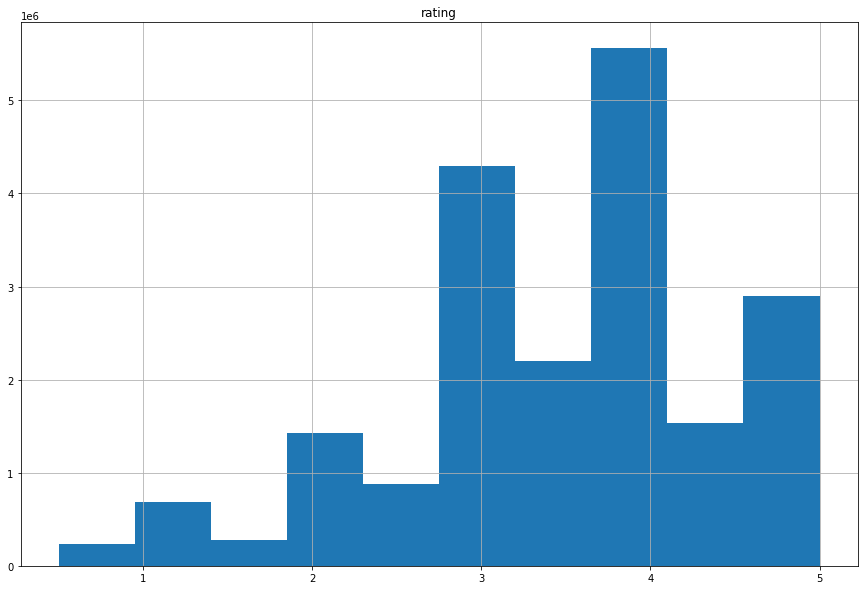

In [49]:
%matplotlib inline

ratings_1.hist(column='rating', figsize=(15,10))

<AxesSubplot:>

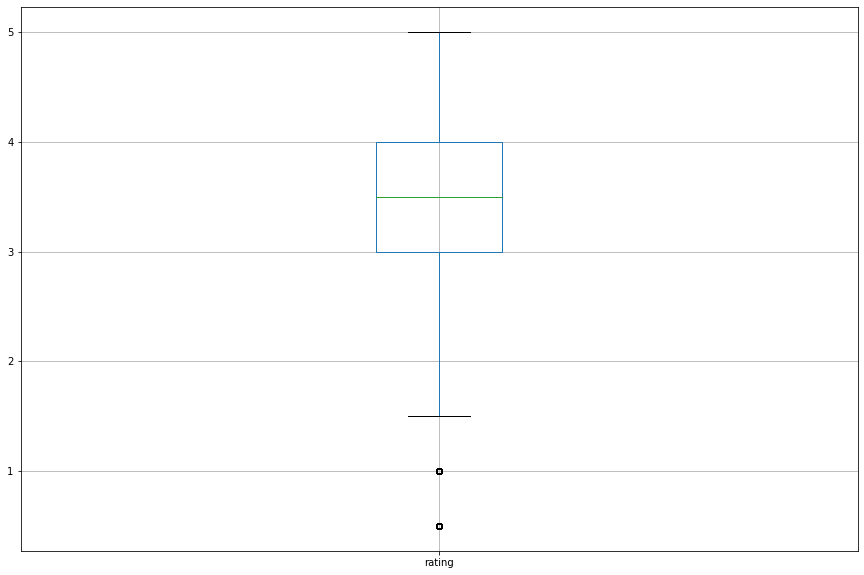

In [50]:
%matplotlib inline

ratings_1.boxplot(column='rating', figsize=(15,10))

In [ ]:
%matplotlib inline

ratings_1.plot(column='rating', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [52]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [53]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [54]:
ratings_1[1000:1010]

,userId,movieId,rating
1000,11,527,4.5
1001,11,531,4.5
1002,11,541,4.5
1003,11,546,5.0
1004,11,551,5.0
1005,11,586,4.0
1006,11,587,4.5
1007,11,588,5.0
1008,11,589,4.5
1009,11,592,4.5


In [55]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

<AxesSubplot:>

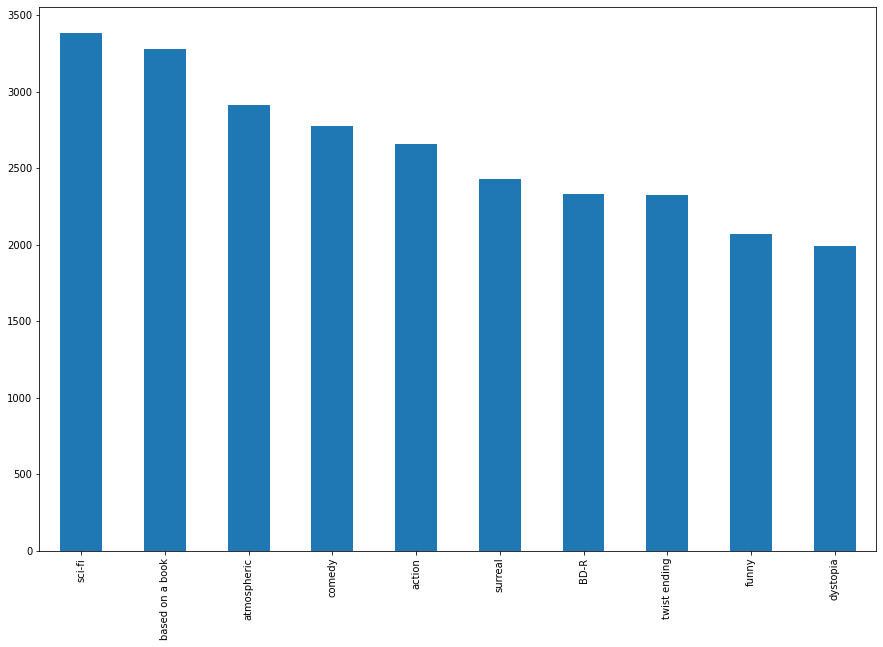

In [16]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [56]:
is_highly_rated = ratings_1['rating'] >= 4.0

ratings_1[is_highly_rated][30:50]

,userId,movieId,rating
68,1,2021,4.0
69,1,2100,4.0
70,1,2118,4.0
71,1,2138,4.0
72,1,2140,4.0
73,1,2143,4.0
74,1,2173,4.0
75,1,2174,4.0
76,1,2193,4.0
79,1,2288,4.0


In [57]:
ratings_1[is_highly_rated].head()

,userId,movieId,rating
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0
10,1,293,4.0


In [58]:
ratings_1[is_highly_rated].tail()

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [59]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
588,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
589,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
590,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
604,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [60]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [82]:
ratings_count = ratings_1[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [63]:
average_rating = ratings_1[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


In [64]:
movie_count = ratings_1[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [74]:
movie_count = ratings_1[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [66]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [67]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [68]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
    <br>Combine aggregation, merging, and filters to get useful analytics </br>
</p>

In [69]:
avg_ratings = ratings_1.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [70]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [71]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [72]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [73]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [83]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">
    <br>Split 'genres' into multiple columns<br> 
</p>

In [84]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [85]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">
    <br>Add a new column for comedy genre flag

<br> </p>

In [86]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [87]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">
    <br>Extract year from title e.g. (1995)

<br> </p>

In [88]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [89]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [92]:
tags = pd.read_csv('./movielens/tag1/tag.csv', sep=',')

In [93]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">
Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [94]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [95]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

ValueError: non convertible value 2009-04-24 18:19:40 with the unit 's'

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">
Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware
</p>

In [96]:

tags['parsed_time'].dtype

KeyError: 'parsed_time'

In [97]:
tags.head(2)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [98]:
greater_than_t = tags['timestamp'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((465564, 4), (12130, 4))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">
Sorting the table using the timestamps
</p>

In [100]:
tags.sort_values(by='timestamp', ascending=True)[:10]

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,2005-12-24 13:00:10
333927,100371,1732,coen brothers,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,2005-12-24 13:02:51
333939,100371,5004,peter sellers,2005-12-24 13:03:19
333922,100371,47,morgan freeman,2005-12-24 13:03:32
333921,100371,47,brad pitt,2005-12-24 13:03:32
333936,100371,4011,brad pitt,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,2005-12-24 13:03:51
333920,100371,32,bruce willis,2005-12-24 13:04:02


<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie Ratings related to the Year of Launch?

In [102]:
average_rating = ratings_1[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [103]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


In [104]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


<AxesSubplot:xlabel='year'>

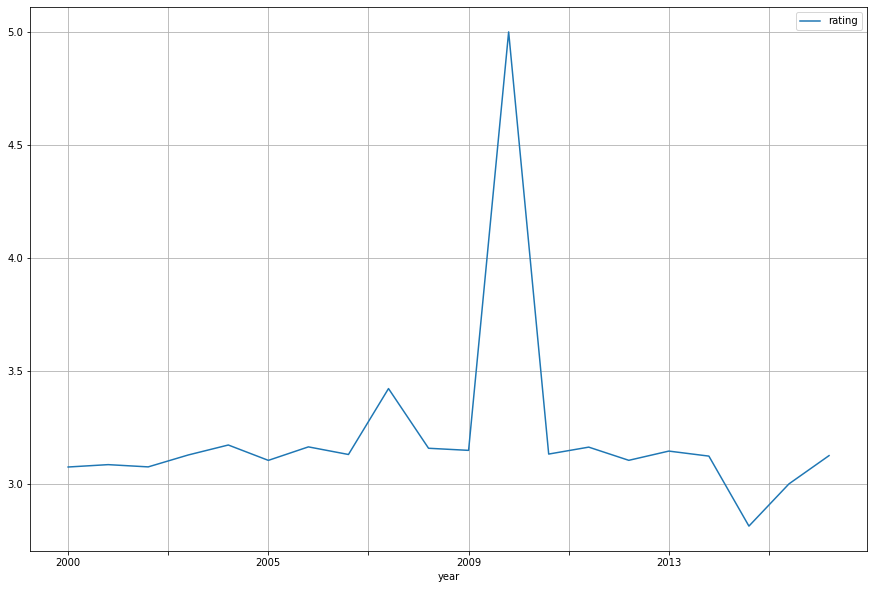

In [105]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the box office movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>